## Processing with aboveground biomass data based on my fieldworks and other authors

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
input_data = './FULL_DB_BIOMASS_OTHER_ALL_AUTHORS.csv'
df = pd.read_csv(input_data)
df.head()

,Groups,Species,Species_ID,Origin,Origin_ID,SI,A_years,H_m,DBH_cm,N_trees,...,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,1,Pine,0,n,0.0,4,50,9.7,14.6,486.0,...,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,1,Pine,0,n,0.0,2,65,20.6,20.6,785.0,...,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,1,Pine,0,n,0.0,2,50,13.6,15.4,1745.0,...,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,1,Pine,0,n,0.0,1,60,23.3,22.2,665.0,...,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,1,Pine,0,n,0.0,3,65,15.6,16.4,955.0,...,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Groups','Species_ID','Origin_ID','SI','A_years','H_m','DBH_cm','RS(P)',          'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha'
'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species_ID','Origin_ID','H_m','DBH_cm', 'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha', 'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,0,0.0,9.7,14.6,9.7,43.9,18.9,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,0,0.0,20.6,20.6,32.2,254.0,113.1,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,0,0.0,13.6,15.4,35.2,190.0,87.8,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,0,0.0,23.3,22.2,29.6,277.7,106.5,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,0,0.0,15.6,16.4,20.4,142.5,67.0,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species_ID         857 non-null    int64  
 1   Origin_ID          856 non-null    float64
 2   H_m                857 non-null    float64
 3   DBH_cm             856 non-null    float64
 4   BA_sq_m_ha         857 non-null    float64
 5   GS_cub_m           857 non-null    float64
 6   ALL_STEM_t_ha      855 non-null    float64
 7   Stem_wood_t_ha     747 non-null    float64
 8   Stem_bark_t_ha     747 non-null    float64
 9   Crown_t_ha         843 non-null    float64
 10  Foliage_t_ha       854 non-null    float64
 11  LN_GS_cub_m        857 non-null    float64
 12  LN_ALL_STEM_t_ha   855 non-null    float64
 13  LN_Stem_wood_t_ha  747 non-null    float64
 14  LN_Stem_bark_t_ha  747 non-null    float64
 15  LN_Crown_t_ha      843 non-null    float64
 16  LN_Foliage_t_ha    854 non

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species_ID"])["LN_Foliage_t_ha", "ALL_STEM_t_ha"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


LN_Foliage_t_ha                                                  \
                     count      mean       std   min    25%    50%     75%   
Species_ID                                                                   
0                    456.0  1.669211  0.508590 -1.61  1.420  1.780  2.0300   
1                      7.0  2.688571  0.372936  2.12  2.405  2.850  2.9800   
2                    120.0  0.701333  0.753190 -1.11  0.305  0.790  1.2650   
3                    115.0  0.901826  0.470374 -0.22  0.590  0.870  1.2300   
4                     66.0  1.210152  0.428082 -0.07  0.960  1.255  1.4700   
5                     90.0  1.310111  0.569079 -0.65  1.005  1.465  1.7375   

                 ALL_STEM_t_ha                                              \
             max         count        mean        std   min     25%    50%   
Species_ID                                                                   
0           2.69         457.0   97.049891  61.854506   1.8  47.500   92.7   
1           3.08           7.0  123.814286  61.879895  46.3  70.650  133.9   
2           2.78         120.0   74.495000  44.523333   5.1  37.275   68.1   
3           2.03         115.0  107.607826  55.589186  11.0  62.700  106.8   
4           2.15          66.0   84.946970  58.875162   8.2  40.750   61.2   
5           1.92          90.0  173.065556  99.100647   5.0  93.075  161.3   

                            
                75%    max  
Species_ID                  
0           135.900  310.7  
1           174.550  196.1  
2           103.075  193.5  
3           145.450  251.6  
4           125.000  245.4  
5           253.375  363.9

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
count,857.000000,856.000000,857.000000,856.000000,857.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000
mean,1.529755,0.279206,16.452275,17.132243,26.329988,229.013069,102.590877,92.779518,12.060107,13.821969,4.749356,5.166919,4.343766,4.246975,2.201232,2.318149,1.364906
std,1.823872,0.448871,7.039954,10.439115,10.629993,144.362106,68.758819,61.992238,9.595428,11.567546,2.826586,0.839680,0.869479,0.854856,0.806766,0.829446,0.672551
min,0.000000,0.000000,1.500000,1.100000,1.000000,2.400000,1.800000,2.000000,0.300000,0.500000,0.200000,0.880000,0.590000,0.690000,-1.200000,-0.690000,-1.610000
25%,0.000000,0.000000,11.200000,9.900000,19.000000,116.000000,47.500000,42.900000,5.950000,6.610000,2.600000,4.750000,3.860000,3.760000,1.780000,1.890000,0.960000
50%,0.000000,0.000000,16.100000,15.500000,26.800000,206.000000,93.500000,84.600000,9.300000,10.820000,4.300000,5.330000,4.540000,4.440000,2.230000,2.380000,1.460000
75%,3.000000,1.000000,21.200000,22.100000,34.500000,320.000000,140.500000,125.500000,15.300000,16.435000,6.367500,5.770000,4.950000,4.830000,2.730000,2.800000,1.850000
max,5.000000,1.000000,38.300000,94.000000,51.500000,735.000000,363.900000,315.200000,65.700000,69.120000,21.730000,6.600000,5.900000,5.750000,4.190000,4.240000,3.080000


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "LN_Foliage_t_ha"
indep_variables = ['Species_ID','Origin_ID','H_m','DBH_cm','BA_sq_m_ha']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     Species_ID  Origin_ID   H_m  DBH_cm  BA_sq_m_ha  GS_cub_m  ALL_STEM_t_ha  \
0             0        0.0   9.7    14.6         9.7      43.9           18.9   
1             0        0.0  20.6    20.6        32.2     254.0          113.1   
2             0        0.0  13.6    15.4        35.2     190.0           87.8   
3             0        0.0  23.3    22.2        29.6     277.7          106.5   
4             0        0.0  15.6    16.4        20.4     142.5           67.0   
..          ...        ...   ...     ...         ...       ...            ...   
852           3        0.0   7.8     4.4         9.2      39.8           17.8   
853           3        0.0  12.7     9.0        20.5     123.6           47.1   
854           3        0.0  12.2     8.1        20.3     141.7           51.9   
855           2        0.0  14.3    12.4        25.1     176.5          100.7   
856           2        0.0  21.1    25.6        21.0     191.6           99.9   

     Stem_wood_t_ha  Stem_b

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha
0,0,0.0,9.7,14.6,9.7
1,0,0.0,20.6,20.6,32.2
2,0,0.0,13.6,15.4,35.2
3,0,0.0,23.3,22.2,29.6
4,0,0.0,15.6,16.4,20.4


In [11]:
# Columns in "y" data collections
y.head()

,LN_Foliage_t_ha
0,0.47
1,1.41
2,1.41
3,1.69
4,1.22


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.6605852667902365, 0.5804501814668741, 0.6297743970020531]
    Mean: 0.624
    Std: 0.033

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.42392251 0.44013473 0.43002032]
    Mean: 0.431
    Std: 0.007

 --------------------
Mean absolute error (MAE): 

    Scores: [0.27465375955272137, 0.30544913000443524, 0.28254527048352107]
    Mean: 0.288
    Std: 0.013

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.6376420855691677                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.030051961019074536                # gamma
print('Gamma: ' + str(p2))

p3 = 0.2640899209518656                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 4            # max_depth
print('Max_depth: ' + str(p4))

p5 = 196         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.7879876518750124                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.6376420855691677
Gamma: 0.030051961019074536
Learning_rate: 0.2640899209518656
Max_depth: 4
N_estimators: 196
Subsample: 0.7879876518750124


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    exp_R_square = r2_score(exp_y_test, exp_y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:0.85561	validation_1-rmse:0.89487
[1]	validation_0-rmse:0.70272	validation_1-rmse:0.75812


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.60835	validation_1-rmse:0.68097
[3]	validation_0-rmse:0.53503	validation_1-rmse:0.62266
[4]	validation_0-rmse:0.47924	validation_1-rmse:0.57342
[5]	validation_0-rmse:0.43904	validation_1-rmse:0.53485
[6]	validation_0-rmse:0.41447	validation_1-rmse:0.51530
[7]	validation_0-rmse:0.39352	validation_1-rmse:0.50158
[8]	validation_0-rmse:0.38444	validation_1-rmse:0.49960
[9]	validation_0-rmse:0.37186	validation_1-rmse:0.49351
[10]	validation_0-rmse:0.36412	validation_1-rmse:0.49404
[11]	validation_0-rmse:0.35707	validation_1-rmse:0.49177
[12]	validation_0-rmse:0.34922	validation_1-rmse:0.48388
[13]	validation_0-rmse:0.34548	validation_1-rmse:0.48409
[14]	validation_0-rmse:0.34248	validation_1-rmse:0.48507
[15]	validation_0-rmse:0.33679	validation_1-rmse:0.47763
[16]	validation_0-rmse:0.33489	validation_1-rmse:0.47695
[17]	validation_0-rmse:0.33100	validation_1-rmse:0.47564
[18]	validation_0-rmse:0.32664	validation_1-rmse:0.46888
[19]	validation_0-rmse:0.31813	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87188	validation_1-rmse:0.88055


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71892	validation_1-rmse:0.73921
[2]	validation_0-rmse:0.62692	validation_1-rmse:0.65524
[3]	validation_0-rmse:0.54783	validation_1-rmse:0.59104
[4]	validation_0-rmse:0.48711	validation_1-rmse:0.53791
[5]	validation_0-rmse:0.44835	validation_1-rmse:0.50330
[6]	validation_0-rmse:0.42284	validation_1-rmse:0.48216
[7]	validation_0-rmse:0.40112	validation_1-rmse:0.47851
[8]	validation_0-rmse:0.39209	validation_1-rmse:0.47736
[9]	validation_0-rmse:0.37986	validation_1-rmse:0.47447
[10]	validation_0-rmse:0.37383	validation_1-rmse:0.47261
[11]	validation_0-rmse:0.36503	validation_1-rmse:0.46576
[12]	validation_0-rmse:0.35729	validation_1-rmse:0.46316
[13]	validation_0-rmse:0.34925	validation_1-rmse:0.46110
[14]	validation_0-rmse:0.34567	validation_1-rmse:0.45950
[15]	validation_0-rmse:0.33816	validation_1-rmse:0.45814
[16]	validation_0-rmse:0.33242	validation_1-rmse:0.45646
[17]	validation_0-rmse:0.32979	validation_1-rmse:0.45780
[18]	validation_0-rmse:0.32513	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.86741	validation_1-rmse:0.87623
[1]	validation_0-rmse:0.71736	validation_1-rmse:0.72644


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62898	validation_1-rmse:0.63383
[3]	validation_0-rmse:0.55309	validation_1-rmse:0.56355
[4]	validation_0-rmse:0.49395	validation_1-rmse:0.50491
[5]	validation_0-rmse:0.45547	validation_1-rmse:0.46956
[6]	validation_0-rmse:0.43005	validation_1-rmse:0.45185
[7]	validation_0-rmse:0.40992	validation_1-rmse:0.44094
[8]	validation_0-rmse:0.40125	validation_1-rmse:0.43823
[9]	validation_0-rmse:0.38890	validation_1-rmse:0.43249
[10]	validation_0-rmse:0.37954	validation_1-rmse:0.43079
[11]	validation_0-rmse:0.37243	validation_1-rmse:0.42717
[12]	validation_0-rmse:0.36417	validation_1-rmse:0.42469
[13]	validation_0-rmse:0.35802	validation_1-rmse:0.42462
[14]	validation_0-rmse:0.35188	validation_1-rmse:0.41850
[15]	validation_0-rmse:0.34923	validation_1-rmse:0.41690
[16]	validation_0-rmse:0.33971	validation_1-rmse:0.41563
[17]	validation_0-rmse:0.33562	validation_1-rmse:0.41320
[18]	validation_0-rmse:0.33083	validation_1-rmse:0.41244
[19]	validation_0-rmse:0.32479	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86809	validation_1-rmse:0.88091


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.72246	validation_1-rmse:0.73582
[2]	validation_0-rmse:0.63598	validation_1-rmse:0.65288
[3]	validation_0-rmse:0.56012	validation_1-rmse:0.57973
[4]	validation_0-rmse:0.50180	validation_1-rmse:0.52056
[5]	validation_0-rmse:0.46414	validation_1-rmse:0.48288
[6]	validation_0-rmse:0.43601	validation_1-rmse:0.45368
[7]	validation_0-rmse:0.41805	validation_1-rmse:0.43747
[8]	validation_0-rmse:0.40778	validation_1-rmse:0.42747
[9]	validation_0-rmse:0.39712	validation_1-rmse:0.41860
[10]	validation_0-rmse:0.39324	validation_1-rmse:0.41163
[11]	validation_0-rmse:0.38226	validation_1-rmse:0.40798
[12]	validation_0-rmse:0.37300	validation_1-rmse:0.40045
[13]	validation_0-rmse:0.36573	validation_1-rmse:0.39556
[14]	validation_0-rmse:0.35965	validation_1-rmse:0.39623
[15]	validation_0-rmse:0.35507	validation_1-rmse:0.39479
[16]	validation_0-rmse:0.35108	validation_1-rmse:0.39506
[17]	validation_0-rmse:0.34884	validation_1-rmse:0.39165
[18]	validation_0-rmse:0.34391	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86577	validation_1-rmse:0.86457
[1]	validation_0-rmse:0.71779	validation_1-rmse:0.71904
[2]	validation_0-rmse:0.63100	validation_1-rmse:0.63178
[3]	validation_0-rmse:0.55800	validation_1-rmse:0.56296
[4]	validation_0-rmse:0.49707	validation_1-rmse:0.50594
[5]	validation_0-rmse:0.45755	validation_1-rmse:0.47801
[6]	validation_0-rmse:0.42941	validation_1-rmse:0.45584
[7]	validation_0-rmse:0.41049	validation_1-rmse:0.43542
[8]	validation_0-rmse:0.40104	validation_1-rmse:0.43133
[9]	validation_0-rmse:0.38675	validation_1-rmse:0.42404
[10]	validation_0-rmse:0.38188	validation_1-rmse:0.42173
[11]	validation_0-rmse:0.37271	validation_1-rmse:0.41961
[12]	validation_0-rmse:0.36368	validation_1-rmse:0.41982
[13]	validation_0-rmse:0.35970	validation_1-rmse:0.41651
[14]	validation_0-rmse:0.35295	validation_1-rmse:0.41769
[15]	validation_0-rmse:0.34655	validation_1-rmse:0.41919
[16]	validation_0-rmse:0.34200	validation_1-rmse:0.41547
[17]	validation_0-rmse:0.33850	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.88158	validation_1-rmse:0.82613
[1]	validation_0-rmse:0.73018	validation_1-rmse:0.68334
[2]	validation_0-rmse:0.64191	validation_1-rmse:0.59473


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.56602	validation_1-rmse:0.52165
[4]	validation_0-rmse:0.50799	validation_1-rmse:0.46666
[5]	validation_0-rmse:0.46420	validation_1-rmse:0.42769
[6]	validation_0-rmse:0.43875	validation_1-rmse:0.40721
[7]	validation_0-rmse:0.42121	validation_1-rmse:0.39396
[8]	validation_0-rmse:0.41309	validation_1-rmse:0.39316
[9]	validation_0-rmse:0.39677	validation_1-rmse:0.38798
[10]	validation_0-rmse:0.39153	validation_1-rmse:0.38603
[11]	validation_0-rmse:0.37859	validation_1-rmse:0.37963
[12]	validation_0-rmse:0.36992	validation_1-rmse:0.37680
[13]	validation_0-rmse:0.36385	validation_1-rmse:0.37895
[14]	validation_0-rmse:0.35926	validation_1-rmse:0.37551
[15]	validation_0-rmse:0.35196	validation_1-rmse:0.37465
[16]	validation_0-rmse:0.34514	validation_1-rmse:0.37110
[17]	validation_0-rmse:0.34360	validation_1-rmse:0.37102
[18]	validation_0-rmse:0.33805	validation_1-rmse:0.37196
[19]	validation_0-rmse:0.33181	validation_1-rmse:0.37009
[20]	validation_0-rmse:0.32760	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86935	validation_1-rmse:0.86937
[1]	validation_0-rmse:0.72260	validation_1-rmse:0.72834
[2]	validation_0-rmse:0.63303	validation_1-rmse:0.64400
[3]	validation_0-rmse:0.56087	validation_1-rmse:0.57806
[4]	validation_0-rmse:0.50515	validation_1-rmse:0.51816
[5]	validation_0-rmse:0.46290	validation_1-rmse:0.47848
[6]	validation_0-rmse:0.43310	validation_1-rmse:0.45710
[7]	validation_0-rmse:0.41289	validation_1-rmse:0.44099
[8]	validation_0-rmse:0.40266	validation_1-rmse:0.43801
[9]	validation_0-rmse:0.38963	validation_1-rmse:0.43095
[10]	validation_0-rmse:0.38596	validation_1-rmse:0.43009
[11]	validation_0-rmse:0.37727	validation_1-rmse:0.42363
[12]	validation_0-rmse:0.37272	validation_1-rmse:0.41568
[13]	validation_0-rmse:0.36783	validation_1-rmse:0.41207
[14]	validation_0-rmse:0.36368	validation_1-rmse:0.41133
[15]	validation_0-rmse:0.35700	validation_1-rmse:0.41818
[16]	validation_0-rmse:0.34891	validation_1-rmse:0.41987
[17]	validation_0-rmse:0.34691	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.84514	validation_1-rmse:0.96563


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.70027	validation_1-rmse:0.81499
[2]	validation_0-rmse:0.61788	validation_1-rmse:0.73244
[3]	validation_0-rmse:0.54310	validation_1-rmse:0.66064
[4]	validation_0-rmse:0.48587	validation_1-rmse:0.60413
[5]	validation_0-rmse:0.44835	validation_1-rmse:0.56338
[6]	validation_0-rmse:0.42274	validation_1-rmse:0.54157
[7]	validation_0-rmse:0.40442	validation_1-rmse:0.51852
[8]	validation_0-rmse:0.39847	validation_1-rmse:0.51790
[9]	validation_0-rmse:0.38342	validation_1-rmse:0.50995
[10]	validation_0-rmse:0.37474	validation_1-rmse:0.51087
[11]	validation_0-rmse:0.36601	validation_1-rmse:0.50180
[12]	validation_0-rmse:0.35811	validation_1-rmse:0.49807
[13]	validation_0-rmse:0.35242	validation_1-rmse:0.49088
[14]	validation_0-rmse:0.34648	validation_1-rmse:0.48685
[15]	validation_0-rmse:0.34134	validation_1-rmse:0.48496
[16]	validation_0-rmse:0.33614	validation_1-rmse:0.48395
[17]	validation_0-rmse:0.33405	validation_1-rmse:0.48104
[18]	validation_0-rmse:0.32770	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86534	validation_1-rmse:0.88707


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71578	validation_1-rmse:0.75781
[2]	validation_0-rmse:0.62549	validation_1-rmse:0.68645
[3]	validation_0-rmse:0.54518	validation_1-rmse:0.62193
[4]	validation_0-rmse:0.48426	validation_1-rmse:0.57678
[5]	validation_0-rmse:0.44304	validation_1-rmse:0.55155
[6]	validation_0-rmse:0.41990	validation_1-rmse:0.53464
[7]	validation_0-rmse:0.39939	validation_1-rmse:0.52745
[8]	validation_0-rmse:0.39040	validation_1-rmse:0.52227
[9]	validation_0-rmse:0.37758	validation_1-rmse:0.51590
[10]	validation_0-rmse:0.36773	validation_1-rmse:0.51746
[11]	validation_0-rmse:0.35909	validation_1-rmse:0.51507
[12]	validation_0-rmse:0.35221	validation_1-rmse:0.51428
[13]	validation_0-rmse:0.34638	validation_1-rmse:0.51255
[14]	validation_0-rmse:0.34067	validation_1-rmse:0.51292
[15]	validation_0-rmse:0.33624	validation_1-rmse:0.51398
[16]	validation_0-rmse:0.33363	validation_1-rmse:0.51474
[17]	validation_0-rmse:0.33074	validation_1-rmse:0.51443
[18]	validation_0-rmse:0.32250	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87828	validation_1-rmse:0.82806
[1]	validation_0-rmse:0.72368	validation_1-rmse:0.68462
[2]	validation_0-rmse:0.62972	validation_1-rmse:0.60128
[3]	validation_0-rmse:0.54997	validation_1-rmse:0.53920
[4]	validation_0-rmse:0.49081	validation_1-rmse:0.49383
[5]	validation_0-rmse:0.44957	validation_1-rmse:0.46250
[6]	validation_0-rmse:0.42550	validation_1-rmse:0.45077
[7]	validation_0-rmse:0.40508	validation_1-rmse:0.44497
[8]	validation_0-rmse:0.39802	validation_1-rmse:0.43926
[9]	validation_0-rmse:0.38639	validation_1-rmse:0.43601
[10]	validation_0-rmse:0.37960	validation_1-rmse:0.43674
[11]	validation_0-rmse:0.36817	validation_1-rmse:0.43323
[12]	validation_0-rmse:0.36174	validation_1-rmse:0.43557
[13]	validation_0-rmse:0.35467	validation_1-rmse:0.43570
[14]	validation_0-rmse:0.35103	validation_1-rmse:0.43804
[15]	validation_0-rmse:0.34814	validation_1-rmse:0.43659
[16]	validation_0-rmse:0.34417	validation_1-rmse:0.43176
[17]	validation_0-rmse:0.33972	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.85097	validation_1-rmse:0.92790
[1]	validation_0-rmse:0.69949	validation_1-rmse:0.79219


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.60578	validation_1-rmse:0.72287
[3]	validation_0-rmse:0.53039	validation_1-rmse:0.66624
[4]	validation_0-rmse:0.46876	validation_1-rmse:0.61587
[5]	validation_0-rmse:0.42484	validation_1-rmse:0.58722
[6]	validation_0-rmse:0.40055	validation_1-rmse:0.57418
[7]	validation_0-rmse:0.38130	validation_1-rmse:0.56574
[8]	validation_0-rmse:0.37203	validation_1-rmse:0.56574
[9]	validation_0-rmse:0.36115	validation_1-rmse:0.55969
[10]	validation_0-rmse:0.35391	validation_1-rmse:0.56008
[11]	validation_0-rmse:0.34671	validation_1-rmse:0.55404
[12]	validation_0-rmse:0.34075	validation_1-rmse:0.55014
[13]	validation_0-rmse:0.33640	validation_1-rmse:0.54762
[14]	validation_0-rmse:0.33175	validation_1-rmse:0.54722
[15]	validation_0-rmse:0.32653	validation_1-rmse:0.54036
[16]	validation_0-rmse:0.32396	validation_1-rmse:0.54733
[17]	validation_0-rmse:0.32077	validation_1-rmse:0.54556
[18]	validation_0-rmse:0.31693	validation_1-rmse:0.54332
[19]	validation_0-rmse:0.30939	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.86903	validation_1-rmse:0.89586
[1]	validation_0-rmse:0.72058	validation_1-rmse:0.74982
[2]	validation_0-rmse:0.63294	validation_1-rmse:0.65883


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.55651	validation_1-rmse:0.58848
[4]	validation_0-rmse:0.49524	validation_1-rmse:0.53174
[5]	validation_0-rmse:0.45394	validation_1-rmse:0.49122
[6]	validation_0-rmse:0.42610	validation_1-rmse:0.46444
[7]	validation_0-rmse:0.40625	validation_1-rmse:0.45334
[8]	validation_0-rmse:0.39258	validation_1-rmse:0.44588
[9]	validation_0-rmse:0.37847	validation_1-rmse:0.43542
[10]	validation_0-rmse:0.37425	validation_1-rmse:0.43254
[11]	validation_0-rmse:0.36359	validation_1-rmse:0.43158
[12]	validation_0-rmse:0.35493	validation_1-rmse:0.42446
[13]	validation_0-rmse:0.34981	validation_1-rmse:0.42045
[14]	validation_0-rmse:0.34165	validation_1-rmse:0.42500
[15]	validation_0-rmse:0.33738	validation_1-rmse:0.42789
[16]	validation_0-rmse:0.33489	validation_1-rmse:0.42712
[17]	validation_0-rmse:0.33105	validation_1-rmse:0.42466
[18]	validation_0-rmse:0.32461	validation_1-rmse:0.42273
[19]	validation_0-rmse:0.32031	validation_1-rmse:0.42236
[20]	validation_0-rmse:0.31371	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.86460	validation_1-rmse:0.89025
[1]	validation_0-rmse:0.71522	validation_1-rmse:0.74821
[2]	validation_0-rmse:0.62031	validation_1-rmse:0.66924


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.54841	validation_1-rmse:0.60456
[4]	validation_0-rmse:0.48927	validation_1-rmse:0.55953
[5]	validation_0-rmse:0.44692	validation_1-rmse:0.52144
[6]	validation_0-rmse:0.42162	validation_1-rmse:0.50823
[7]	validation_0-rmse:0.40124	validation_1-rmse:0.49212
[8]	validation_0-rmse:0.39221	validation_1-rmse:0.48924
[9]	validation_0-rmse:0.38422	validation_1-rmse:0.48488
[10]	validation_0-rmse:0.37711	validation_1-rmse:0.48291
[11]	validation_0-rmse:0.36475	validation_1-rmse:0.48883
[12]	validation_0-rmse:0.35746	validation_1-rmse:0.48542
[13]	validation_0-rmse:0.35259	validation_1-rmse:0.48301
[14]	validation_0-rmse:0.34632	validation_1-rmse:0.48971
[15]	validation_0-rmse:0.34074	validation_1-rmse:0.49122
[16]	validation_0-rmse:0.33704	validation_1-rmse:0.48924
[17]	validation_0-rmse:0.33242	validation_1-rmse:0.48689
[18]	validation_0-rmse:0.32526	validation_1-rmse:0.48366
[19]	validation_0-rmse:0.32124	validation_1-rmse:0.47994
[20]	validation_0-rmse:0.31633	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.86628	validation_1-rmse:0.89148
[1]	validation_0-rmse:0.71751	validation_1-rmse:0.74078
[2]	validation_0-rmse:0.62525	validation_1-rmse:0.64119
[3]	validation_0-rmse:0.54894	validation_1-rmse:0.56561


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.49081	validation_1-rmse:0.50396
[5]	validation_0-rmse:0.45324	validation_1-rmse:0.47064
[6]	validation_0-rmse:0.42828	validation_1-rmse:0.44031
[7]	validation_0-rmse:0.41146	validation_1-rmse:0.42761
[8]	validation_0-rmse:0.40174	validation_1-rmse:0.42092
[9]	validation_0-rmse:0.39027	validation_1-rmse:0.41498
[10]	validation_0-rmse:0.38499	validation_1-rmse:0.41243
[11]	validation_0-rmse:0.37433	validation_1-rmse:0.40181
[12]	validation_0-rmse:0.36605	validation_1-rmse:0.39610
[13]	validation_0-rmse:0.35740	validation_1-rmse:0.39117
[14]	validation_0-rmse:0.35362	validation_1-rmse:0.39218
[15]	validation_0-rmse:0.34948	validation_1-rmse:0.39206
[16]	validation_0-rmse:0.34589	validation_1-rmse:0.39600
[17]	validation_0-rmse:0.34261	validation_1-rmse:0.39522
[18]	validation_0-rmse:0.33562	validation_1-rmse:0.39360
[19]	validation_0-rmse:0.32811	validation_1-rmse:0.39345
[20]	validation_0-rmse:0.32219	validation_1-rmse:0.39430
[21]	validation_0-rmse:0.31676	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.87243	validation_1-rmse:0.86715
[1]	validation_0-rmse:0.72614	validation_1-rmse:0.70694
[2]	validation_0-rmse:0.64042	validation_1-rmse:0.60794
[3]	validation_0-rmse:0.56197	validation_1-rmse:0.52439


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.50158	validation_1-rmse:0.46159
[5]	validation_0-rmse:0.46066	validation_1-rmse:0.42068
[6]	validation_0-rmse:0.43631	validation_1-rmse:0.39545
[7]	validation_0-rmse:0.41683	validation_1-rmse:0.38134
[8]	validation_0-rmse:0.40792	validation_1-rmse:0.37364
[9]	validation_0-rmse:0.39130	validation_1-rmse:0.37012
[10]	validation_0-rmse:0.38657	validation_1-rmse:0.37195
[11]	validation_0-rmse:0.37861	validation_1-rmse:0.37014
[12]	validation_0-rmse:0.36694	validation_1-rmse:0.36456
[13]	validation_0-rmse:0.35994	validation_1-rmse:0.36564
[14]	validation_0-rmse:0.35553	validation_1-rmse:0.36260
[15]	validation_0-rmse:0.34918	validation_1-rmse:0.35955
[16]	validation_0-rmse:0.34445	validation_1-rmse:0.36163
[17]	validation_0-rmse:0.34144	validation_1-rmse:0.35801
[18]	validation_0-rmse:0.33565	validation_1-rmse:0.35907
[19]	validation_0-rmse:0.33118	validation_1-rmse:0.36000
[20]	validation_0-rmse:0.32659	validation_1-rmse:0.36165
[21]	validation_0-rmse:0.32357	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.86834	validation_1-rmse:0.84652
[1]	validation_0-rmse:0.71631	validation_1-rmse:0.69815
[2]	validation_0-rmse:0.62410	validation_1-rmse:0.61464
[3]	validation_0-rmse:0.54845	validation_1-rmse:0.54780


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.48760	validation_1-rmse:0.48989
[5]	validation_0-rmse:0.44533	validation_1-rmse:0.45661
[6]	validation_0-rmse:0.42035	validation_1-rmse:0.43792
[7]	validation_0-rmse:0.40402	validation_1-rmse:0.43203
[8]	validation_0-rmse:0.39271	validation_1-rmse:0.43064
[9]	validation_0-rmse:0.38310	validation_1-rmse:0.42824
[10]	validation_0-rmse:0.37670	validation_1-rmse:0.42822
[11]	validation_0-rmse:0.36768	validation_1-rmse:0.42246
[12]	validation_0-rmse:0.35874	validation_1-rmse:0.41619
[13]	validation_0-rmse:0.34950	validation_1-rmse:0.41622
[14]	validation_0-rmse:0.34674	validation_1-rmse:0.41746
[15]	validation_0-rmse:0.34192	validation_1-rmse:0.41758
[16]	validation_0-rmse:0.33600	validation_1-rmse:0.41919
[17]	validation_0-rmse:0.33147	validation_1-rmse:0.41574
[18]	validation_0-rmse:0.32303	validation_1-rmse:0.42007
[19]	validation_0-rmse:0.31672	validation_1-rmse:0.41751
[20]	validation_0-rmse:0.31299	validation_1-rmse:0.41909
[21]	validation_0-rmse:0.30874	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.88049	validation_1-rmse:0.80466
[1]	validation_0-rmse:0.72786	validation_1-rmse:0.67900


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63778	validation_1-rmse:0.61404
[3]	validation_0-rmse:0.55217	validation_1-rmse:0.54771
[4]	validation_0-rmse:0.49389	validation_1-rmse:0.51769
[5]	validation_0-rmse:0.45069	validation_1-rmse:0.49794
[6]	validation_0-rmse:0.42437	validation_1-rmse:0.49038
[7]	validation_0-rmse:0.40476	validation_1-rmse:0.48626
[8]	validation_0-rmse:0.39549	validation_1-rmse:0.49265
[9]	validation_0-rmse:0.38379	validation_1-rmse:0.49217
[10]	validation_0-rmse:0.37806	validation_1-rmse:0.49341
[11]	validation_0-rmse:0.36946	validation_1-rmse:0.48988
[12]	validation_0-rmse:0.35935	validation_1-rmse:0.48488
[13]	validation_0-rmse:0.35252	validation_1-rmse:0.48140
[14]	validation_0-rmse:0.34783	validation_1-rmse:0.47867
[15]	validation_0-rmse:0.34000	validation_1-rmse:0.47332
[16]	validation_0-rmse:0.33768	validation_1-rmse:0.47247
[17]	validation_0-rmse:0.33264	validation_1-rmse:0.47558
[18]	validation_0-rmse:0.32606	validation_1-rmse:0.47390
[19]	validation_0-rmse:0.31956	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87147	validation_1-rmse:0.85071
[1]	validation_0-rmse:0.72508	validation_1-rmse:0.71227
[2]	validation_0-rmse:0.63356	validation_1-rmse:0.62249
[3]	validation_0-rmse:0.55665	validation_1-rmse:0.55130
[4]	validation_0-rmse:0.49551	validation_1-rmse:0.48928
[5]	validation_0-rmse:0.45388	validation_1-rmse:0.45217
[6]	validation_0-rmse:0.42586	validation_1-rmse:0.43263
[7]	validation_0-rmse:0.40226	validation_1-rmse:0.42455
[8]	validation_0-rmse:0.39299	validation_1-rmse:0.41913
[9]	validation_0-rmse:0.38187	validation_1-rmse:0.41827
[10]	validation_0-rmse:0.37034	validation_1-rmse:0.41542
[11]	validation_0-rmse:0.36137	validation_1-rmse:0.41421
[12]	validation_0-rmse:0.35517	validation_1-rmse:0.40887
[13]	validation_0-rmse:0.34837	validation_1-rmse:0.40604
[14]	validation_0-rmse:0.34330	validation_1-rmse:0.40471
[15]	validation_0-rmse:0.33827	validation_1-rmse:0.40210
[16]	validation_0-rmse:0.33464	validation_1-rmse:0.40235
[17]	validation_0-rmse:0.33189	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87158	validation_1-rmse:0.85762
[1]	validation_0-rmse:0.72071	validation_1-rmse:0.71871
[2]	validation_0-rmse:0.62928	validation_1-rmse:0.63328
[3]	validation_0-rmse:0.54948	validation_1-rmse:0.55689
[4]	validation_0-rmse:0.49226	validation_1-rmse:0.49834
[5]	validation_0-rmse:0.45169	validation_1-rmse:0.46202
[6]	validation_0-rmse:0.42819	validation_1-rmse:0.44172
[7]	validation_0-rmse:0.40741	validation_1-rmse:0.43505
[8]	validation_0-rmse:0.39737	validation_1-rmse:0.43599
[9]	validation_0-rmse:0.38769	validation_1-rmse:0.42800
[10]	validation_0-rmse:0.38266	validation_1-rmse:0.43727
[11]	validation_0-rmse:0.37399	validation_1-rmse:0.43094
[12]	validation_0-rmse:0.36593	validation_1-rmse:0.42315
[13]	validation_0-rmse:0.36004	validation_1-rmse:0.41926
[14]	validation_0-rmse:0.35795	validation_1-rmse:0.41940
[15]	validation_0-rmse:0.35216	validation_1-rmse:0.41661
[16]	validation_0-rmse:0.34415	validation_1-rmse:0.41437
[17]	validation_0-rmse:0.34105	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87076	validation_1-rmse:0.87064
[1]	validation_0-rmse:0.72027	validation_1-rmse:0.72600
[2]	validation_0-rmse:0.63446	validation_1-rmse:0.64677
[3]	validation_0-rmse:0.55744	validation_1-rmse:0.57784
[4]	validation_0-rmse:0.50133	validation_1-rmse:0.52185
[5]	validation_0-rmse:0.46159	validation_1-rmse:0.48188
[6]	validation_0-rmse:0.43962	validation_1-rmse:0.46108
[7]	validation_0-rmse:0.41913	validation_1-rmse:0.44240
[8]	validation_0-rmse:0.40842	validation_1-rmse:0.43568
[9]	validation_0-rmse:0.39534	validation_1-rmse:0.42852
[10]	validation_0-rmse:0.39030	validation_1-rmse:0.43046
[11]	validation_0-rmse:0.38353	validation_1-rmse:0.43187
[12]	validation_0-rmse:0.37612	validation_1-rmse:0.42874
[13]	validation_0-rmse:0.36938	validation_1-rmse:0.42627
[14]	validation_0-rmse:0.36409	validation_1-rmse:0.42358
[15]	validation_0-rmse:0.35969	validation_1-rmse:0.42319
[16]	validation_0-rmse:0.35148	validation_1-rmse:0.42347
[17]	validation_0-rmse:0.34730	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86481	validation_1-rmse:0.88958
[1]	validation_0-rmse:0.71671	validation_1-rmse:0.74572
[2]	validation_0-rmse:0.62869	validation_1-rmse:0.65846
[3]	validation_0-rmse:0.55168	validation_1-rmse:0.59374
[4]	validation_0-rmse:0.49446	validation_1-rmse:0.54160
[5]	validation_0-rmse:0.45495	validation_1-rmse:0.49807
[6]	validation_0-rmse:0.42858	validation_1-rmse:0.47803
[7]	validation_0-rmse:0.41185	validation_1-rmse:0.46791
[8]	validation_0-rmse:0.40161	validation_1-rmse:0.45692
[9]	validation_0-rmse:0.39311	validation_1-rmse:0.45270
[10]	validation_0-rmse:0.38295	validation_1-rmse:0.44746
[11]	validation_0-rmse:0.37474	validation_1-rmse:0.44032
[12]	validation_0-rmse:0.36863	validation_1-rmse:0.43573
[13]	validation_0-rmse:0.36331	validation_1-rmse:0.43701
[14]	validation_0-rmse:0.35961	validation_1-rmse:0.43586
[15]	validation_0-rmse:0.35382	validation_1-rmse:0.43192
[16]	validation_0-rmse:0.35054	validation_1-rmse:0.42990
[17]	validation_0-rmse:0.34617	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86295	validation_1-rmse:0.88518
[1]	validation_0-rmse:0.70971	validation_1-rmse:0.74279


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62047	validation_1-rmse:0.66659
[3]	validation_0-rmse:0.54718	validation_1-rmse:0.60160
[4]	validation_0-rmse:0.48742	validation_1-rmse:0.54315
[5]	validation_0-rmse:0.44797	validation_1-rmse:0.50857
[6]	validation_0-rmse:0.42524	validation_1-rmse:0.48761
[7]	validation_0-rmse:0.40374	validation_1-rmse:0.47243
[8]	validation_0-rmse:0.39133	validation_1-rmse:0.46933
[9]	validation_0-rmse:0.38182	validation_1-rmse:0.46974
[10]	validation_0-rmse:0.37945	validation_1-rmse:0.46923
[11]	validation_0-rmse:0.37045	validation_1-rmse:0.46259
[12]	validation_0-rmse:0.36462	validation_1-rmse:0.45656
[13]	validation_0-rmse:0.35775	validation_1-rmse:0.45541
[14]	validation_0-rmse:0.35456	validation_1-rmse:0.45607
[15]	validation_0-rmse:0.35045	validation_1-rmse:0.44942
[16]	validation_0-rmse:0.34695	validation_1-rmse:0.44756
[17]	validation_0-rmse:0.34365	validation_1-rmse:0.44426
[18]	validation_0-rmse:0.33852	validation_1-rmse:0.43892
[19]	validation_0-rmse:0.33611	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86478	validation_1-rmse:0.86456
[1]	validation_0-rmse:0.71185	validation_1-rmse:0.72558


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62345	validation_1-rmse:0.65328
[3]	validation_0-rmse:0.54708	validation_1-rmse:0.58550
[4]	validation_0-rmse:0.48508	validation_1-rmse:0.53801
[5]	validation_0-rmse:0.44319	validation_1-rmse:0.51211
[6]	validation_0-rmse:0.41814	validation_1-rmse:0.49285
[7]	validation_0-rmse:0.39951	validation_1-rmse:0.47975
[8]	validation_0-rmse:0.39204	validation_1-rmse:0.47888
[9]	validation_0-rmse:0.38134	validation_1-rmse:0.47137
[10]	validation_0-rmse:0.37289	validation_1-rmse:0.47256
[11]	validation_0-rmse:0.36470	validation_1-rmse:0.46908
[12]	validation_0-rmse:0.35798	validation_1-rmse:0.46574
[13]	validation_0-rmse:0.35330	validation_1-rmse:0.46345
[14]	validation_0-rmse:0.34876	validation_1-rmse:0.46366
[15]	validation_0-rmse:0.34135	validation_1-rmse:0.45971
[16]	validation_0-rmse:0.33781	validation_1-rmse:0.45836
[17]	validation_0-rmse:0.33540	validation_1-rmse:0.45565
[18]	validation_0-rmse:0.32977	validation_1-rmse:0.45132
[19]	validation_0-rmse:0.32611	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87022	validation_1-rmse:0.88565
[1]	validation_0-rmse:0.71986	validation_1-rmse:0.72650
[2]	validation_0-rmse:0.63065	validation_1-rmse:0.64813


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.55074	validation_1-rmse:0.56942
[4]	validation_0-rmse:0.49169	validation_1-rmse:0.51551
[5]	validation_0-rmse:0.45127	validation_1-rmse:0.48303
[6]	validation_0-rmse:0.42709	validation_1-rmse:0.46581
[7]	validation_0-rmse:0.40984	validation_1-rmse:0.45088
[8]	validation_0-rmse:0.39987	validation_1-rmse:0.45256
[9]	validation_0-rmse:0.38585	validation_1-rmse:0.44210
[10]	validation_0-rmse:0.37794	validation_1-rmse:0.44267
[11]	validation_0-rmse:0.37109	validation_1-rmse:0.43637
[12]	validation_0-rmse:0.36260	validation_1-rmse:0.43282
[13]	validation_0-rmse:0.35904	validation_1-rmse:0.42887
[14]	validation_0-rmse:0.35147	validation_1-rmse:0.42861
[15]	validation_0-rmse:0.34816	validation_1-rmse:0.42913
[16]	validation_0-rmse:0.34271	validation_1-rmse:0.42888
[17]	validation_0-rmse:0.33759	validation_1-rmse:0.43505
[18]	validation_0-rmse:0.33137	validation_1-rmse:0.43523
[19]	validation_0-rmse:0.32618	validation_1-rmse:0.43674
[20]	validation_0-rmse:0.31961	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87550	validation_1-rmse:0.82478
[1]	validation_0-rmse:0.72301	validation_1-rmse:0.69473
[2]	validation_0-rmse:0.63439	validation_1-rmse:0.61608
[3]	validation_0-rmse:0.55628	validation_1-rmse:0.56002
[4]	validation_0-rmse:0.49791	validation_1-rmse:0.50213
[5]	validation_0-rmse:0.45589	validation_1-rmse:0.47280
[6]	validation_0-rmse:0.43124	validation_1-rmse:0.45122
[7]	validation_0-rmse:0.40661	validation_1-rmse:0.44101
[8]	validation_0-rmse:0.39482	validation_1-rmse:0.43282
[9]	validation_0-rmse:0.38044	validation_1-rmse:0.42982
[10]	validation_0-rmse:0.37555	validation_1-rmse:0.42861
[11]	validation_0-rmse:0.36431	validation_1-rmse:0.42099
[12]	validation_0-rmse:0.35735	validation_1-rmse:0.41790
[13]	validation_0-rmse:0.35181	validation_1-rmse:0.41570
[14]	validation_0-rmse:0.34685	validation_1-rmse:0.41333
[15]	validation_0-rmse:0.34065	validation_1-rmse:0.41356
[16]	validation_0-rmse:0.33550	validation_1-rmse:0.41300
[17]	validation_0-rmse:0.33265	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.86698	validation_1-rmse:0.89874
[1]	validation_0-rmse:0.71923	validation_1-rmse:0.74654
[2]	validation_0-rmse:0.63279	validation_1-rmse:0.66030
[3]	validation_0-rmse:0.55962	validation_1-rmse:0.59186


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.50364	validation_1-rmse:0.52992
[5]	validation_0-rmse:0.46002	validation_1-rmse:0.48549
[6]	validation_0-rmse:0.43530	validation_1-rmse:0.45783
[7]	validation_0-rmse:0.41571	validation_1-rmse:0.44631
[8]	validation_0-rmse:0.40657	validation_1-rmse:0.44260
[9]	validation_0-rmse:0.39109	validation_1-rmse:0.43535
[10]	validation_0-rmse:0.38752	validation_1-rmse:0.43299
[11]	validation_0-rmse:0.37791	validation_1-rmse:0.42137
[12]	validation_0-rmse:0.37007	validation_1-rmse:0.41880
[13]	validation_0-rmse:0.36351	validation_1-rmse:0.41562
[14]	validation_0-rmse:0.35888	validation_1-rmse:0.40913
[15]	validation_0-rmse:0.35276	validation_1-rmse:0.40882
[16]	validation_0-rmse:0.34430	validation_1-rmse:0.40989
[17]	validation_0-rmse:0.34275	validation_1-rmse:0.40854
[18]	validation_0-rmse:0.33808	validation_1-rmse:0.40823
[19]	validation_0-rmse:0.32940	validation_1-rmse:0.40365
[20]	validation_0-rmse:0.32521	validation_1-rmse:0.40237
[21]	validation_0-rmse:0.31990	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86422	validation_1-rmse:0.88539
[1]	validation_0-rmse:0.71781	validation_1-rmse:0.73907
[2]	validation_0-rmse:0.62473	validation_1-rmse:0.65026


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.55244	validation_1-rmse:0.58568
[4]	validation_0-rmse:0.49413	validation_1-rmse:0.52853
[5]	validation_0-rmse:0.45381	validation_1-rmse:0.48783
[6]	validation_0-rmse:0.42915	validation_1-rmse:0.46722
[7]	validation_0-rmse:0.40932	validation_1-rmse:0.45529
[8]	validation_0-rmse:0.40056	validation_1-rmse:0.45314
[9]	validation_0-rmse:0.38885	validation_1-rmse:0.45005
[10]	validation_0-rmse:0.38296	validation_1-rmse:0.44628
[11]	validation_0-rmse:0.37482	validation_1-rmse:0.44164
[12]	validation_0-rmse:0.36596	validation_1-rmse:0.44090
[13]	validation_0-rmse:0.35998	validation_1-rmse:0.43879
[14]	validation_0-rmse:0.35517	validation_1-rmse:0.43724
[15]	validation_0-rmse:0.35085	validation_1-rmse:0.43874
[16]	validation_0-rmse:0.34513	validation_1-rmse:0.44120
[17]	validation_0-rmse:0.34081	validation_1-rmse:0.43944
[18]	validation_0-rmse:0.33706	validation_1-rmse:0.44057
[19]	validation_0-rmse:0.33067	validation_1-rmse:0.43385
[20]	validation_0-rmse:0.32610	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.87410	validation_1-rmse:0.84825
[1]	validation_0-rmse:0.72830	validation_1-rmse:0.69361
[2]	validation_0-rmse:0.64310	validation_1-rmse:0.60563
[3]	validation_0-rmse:0.56637	validation_1-rmse:0.53027


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.50420	validation_1-rmse:0.47387
[5]	validation_0-rmse:0.45938	validation_1-rmse:0.43848
[6]	validation_0-rmse:0.43513	validation_1-rmse:0.42600
[7]	validation_0-rmse:0.41853	validation_1-rmse:0.40794
[8]	validation_0-rmse:0.40787	validation_1-rmse:0.39656
[9]	validation_0-rmse:0.39552	validation_1-rmse:0.38425
[10]	validation_0-rmse:0.38850	validation_1-rmse:0.38461
[11]	validation_0-rmse:0.37710	validation_1-rmse:0.38320
[12]	validation_0-rmse:0.36854	validation_1-rmse:0.37661
[13]	validation_0-rmse:0.36229	validation_1-rmse:0.37479
[14]	validation_0-rmse:0.35788	validation_1-rmse:0.37359
[15]	validation_0-rmse:0.35280	validation_1-rmse:0.37431
[16]	validation_0-rmse:0.34919	validation_1-rmse:0.37252
[17]	validation_0-rmse:0.34549	validation_1-rmse:0.37292
[18]	validation_0-rmse:0.33965	validation_1-rmse:0.37136
[19]	validation_0-rmse:0.33389	validation_1-rmse:0.36883
[20]	validation_0-rmse:0.32928	validation_1-rmse:0.37114
[21]	validation_0-rmse:0.32471	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87076	validation_1-rmse:0.83777
[1]	validation_0-rmse:0.71861	validation_1-rmse:0.71192
[2]	validation_0-rmse:0.62517	validation_1-rmse:0.63373
[3]	validation_0-rmse:0.54908	validation_1-rmse:0.57572
[4]	validation_0-rmse:0.49067	validation_1-rmse:0.53647
[5]	validation_0-rmse:0.44959	validation_1-rmse:0.51023
[6]	validation_0-rmse:0.41926	validation_1-rmse:0.49594
[7]	validation_0-rmse:0.40049	validation_1-rmse:0.48552
[8]	validation_0-rmse:0.39377	validation_1-rmse:0.48359
[9]	validation_0-rmse:0.37893	validation_1-rmse:0.47659
[10]	validation_0-rmse:0.37314	validation_1-rmse:0.47833
[11]	validation_0-rmse:0.36295	validation_1-rmse:0.47630
[12]	validation_0-rmse:0.35415	validation_1-rmse:0.46784
[13]	validation_0-rmse:0.34718	validation_1-rmse:0.46849
[14]	validation_0-rmse:0.34286	validation_1-rmse:0.46981
[15]	validation_0-rmse:0.33876	validation_1-rmse:0.46723
[16]	validation_0-rmse:0.33426	validation_1-rmse:0.46682
[17]	validation_0-rmse:0.33112	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.87485	validation_1-rmse:0.82038
[1]	validation_0-rmse:0.72371	validation_1-rmse:0.67990
[2]	validation_0-rmse:0.62767	validation_1-rmse:0.59111


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.55390	validation_1-rmse:0.52212
[4]	validation_0-rmse:0.49362	validation_1-rmse:0.47798
[5]	validation_0-rmse:0.45662	validation_1-rmse:0.44825
[6]	validation_0-rmse:0.43486	validation_1-rmse:0.43384
[7]	validation_0-rmse:0.41526	validation_1-rmse:0.41717
[8]	validation_0-rmse:0.40435	validation_1-rmse:0.41623
[9]	validation_0-rmse:0.39091	validation_1-rmse:0.41239
[10]	validation_0-rmse:0.38498	validation_1-rmse:0.41698
[11]	validation_0-rmse:0.37323	validation_1-rmse:0.41072
[12]	validation_0-rmse:0.36648	validation_1-rmse:0.40854
[13]	validation_0-rmse:0.36411	validation_1-rmse:0.40825
[14]	validation_0-rmse:0.35733	validation_1-rmse:0.40677
[15]	validation_0-rmse:0.35171	validation_1-rmse:0.40603
[16]	validation_0-rmse:0.34527	validation_1-rmse:0.40415
[17]	validation_0-rmse:0.34398	validation_1-rmse:0.40385
[18]	validation_0-rmse:0.33984	validation_1-rmse:0.39825
[19]	validation_0-rmse:0.33575	validation_1-rmse:0.39504
[20]	validation_0-rmse:0.32974	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86028	validation_1-rmse:0.90608
[1]	validation_0-rmse:0.71475	validation_1-rmse:0.75612
[2]	validation_0-rmse:0.62648	validation_1-rmse:0.67067


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.54694	validation_1-rmse:0.59353
[4]	validation_0-rmse:0.49090	validation_1-rmse:0.53152
[5]	validation_0-rmse:0.45205	validation_1-rmse:0.49813
[6]	validation_0-rmse:0.42764	validation_1-rmse:0.47549
[7]	validation_0-rmse:0.40853	validation_1-rmse:0.46425
[8]	validation_0-rmse:0.39644	validation_1-rmse:0.45899
[9]	validation_0-rmse:0.38470	validation_1-rmse:0.45691
[10]	validation_0-rmse:0.37614	validation_1-rmse:0.45875
[11]	validation_0-rmse:0.36824	validation_1-rmse:0.44958
[12]	validation_0-rmse:0.36074	validation_1-rmse:0.44338
[13]	validation_0-rmse:0.35290	validation_1-rmse:0.44209
[14]	validation_0-rmse:0.35033	validation_1-rmse:0.43904
[15]	validation_0-rmse:0.34545	validation_1-rmse:0.43592
[16]	validation_0-rmse:0.34217	validation_1-rmse:0.43814
[17]	validation_0-rmse:0.33930	validation_1-rmse:0.43533
[18]	validation_0-rmse:0.33273	validation_1-rmse:0.43589
[19]	validation_0-rmse:0.32794	validation_1-rmse:0.43361
[20]	validation_0-rmse:0.32513	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87049	validation_1-rmse:0.83829
[1]	validation_0-rmse:0.71989	validation_1-rmse:0.70109


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62579	validation_1-rmse:0.61795
[3]	validation_0-rmse:0.54851	validation_1-rmse:0.56256
[4]	validation_0-rmse:0.48715	validation_1-rmse:0.51150
[5]	validation_0-rmse:0.44380	validation_1-rmse:0.48097
[6]	validation_0-rmse:0.42001	validation_1-rmse:0.46951
[7]	validation_0-rmse:0.40141	validation_1-rmse:0.46052
[8]	validation_0-rmse:0.39017	validation_1-rmse:0.45363
[9]	validation_0-rmse:0.37871	validation_1-rmse:0.45032
[10]	validation_0-rmse:0.37227	validation_1-rmse:0.45289
[11]	validation_0-rmse:0.36215	validation_1-rmse:0.44566
[12]	validation_0-rmse:0.35590	validation_1-rmse:0.43984
[13]	validation_0-rmse:0.34901	validation_1-rmse:0.44184
[14]	validation_0-rmse:0.34482	validation_1-rmse:0.44430
[15]	validation_0-rmse:0.33731	validation_1-rmse:0.44125
[16]	validation_0-rmse:0.33329	validation_1-rmse:0.43890
[17]	validation_0-rmse:0.32958	validation_1-rmse:0.43607
[18]	validation_0-rmse:0.32266	validation_1-rmse:0.43432
[19]	validation_0-rmse:0.31740	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86955	validation_1-rmse:0.87478
[1]	validation_0-rmse:0.72058	validation_1-rmse:0.73339
[2]	validation_0-rmse:0.62772	validation_1-rmse:0.64766
[3]	validation_0-rmse:0.54939	validation_1-rmse:0.57963
[4]	validation_0-rmse:0.49119	validation_1-rmse:0.52625
[5]	validation_0-rmse:0.45103	validation_1-rmse:0.48909
[6]	validation_0-rmse:0.42794	validation_1-rmse:0.47362
[7]	validation_0-rmse:0.40769	validation_1-rmse:0.46252
[8]	validation_0-rmse:0.39731	validation_1-rmse:0.45740
[9]	validation_0-rmse:0.38689	validation_1-rmse:0.45086
[10]	validation_0-rmse:0.38039	validation_1-rmse:0.44926
[11]	validation_0-rmse:0.37153	validation_1-rmse:0.43915
[12]	validation_0-rmse:0.36193	validation_1-rmse:0.43636
[13]	validation_0-rmse:0.35571	validation_1-rmse:0.43509
[14]	validation_0-rmse:0.35041	validation_1-rmse:0.43234
[15]	validation_0-rmse:0.34572	validation_1-rmse:0.43459
[16]	validation_0-rmse:0.34270	validation_1-rmse:0.43423
[17]	validation_0-rmse:0.33979	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.86174	validation_1-rmse:0.89142
[1]	validation_0-rmse:0.70964	validation_1-rmse:0.75764
[2]	validation_0-rmse:0.61428	validation_1-rmse:0.68244
[3]	validation_0-rmse:0.53869	validation_1-rmse:0.62445


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.48069	validation_1-rmse:0.57643
[5]	validation_0-rmse:0.44056	validation_1-rmse:0.54630
[6]	validation_0-rmse:0.41498	validation_1-rmse:0.52673
[7]	validation_0-rmse:0.39392	validation_1-rmse:0.51915
[8]	validation_0-rmse:0.38621	validation_1-rmse:0.51366
[9]	validation_0-rmse:0.37419	validation_1-rmse:0.50544
[10]	validation_0-rmse:0.36786	validation_1-rmse:0.50373
[11]	validation_0-rmse:0.35768	validation_1-rmse:0.49065
[12]	validation_0-rmse:0.35041	validation_1-rmse:0.48341
[13]	validation_0-rmse:0.34463	validation_1-rmse:0.48099
[14]	validation_0-rmse:0.34119	validation_1-rmse:0.47949
[15]	validation_0-rmse:0.33576	validation_1-rmse:0.48066
[16]	validation_0-rmse:0.33365	validation_1-rmse:0.47968
[17]	validation_0-rmse:0.32917	validation_1-rmse:0.47625
[18]	validation_0-rmse:0.32432	validation_1-rmse:0.47293
[19]	validation_0-rmse:0.32053	validation_1-rmse:0.47195
[20]	validation_0-rmse:0.31457	validation_1-rmse:0.47320
[21]	validation_0-rmse:0.30933	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86024	validation_1-rmse:0.89225
[1]	validation_0-rmse:0.71542	validation_1-rmse:0.74188
[2]	validation_0-rmse:0.62864	validation_1-rmse:0.66114
[3]	validation_0-rmse:0.55439	validation_1-rmse:0.59266
[4]	validation_0-rmse:0.49563	validation_1-rmse:0.53119
[5]	validation_0-rmse:0.45579	validation_1-rmse:0.50281
[6]	validation_0-rmse:0.43141	validation_1-rmse:0.47487
[7]	validation_0-rmse:0.40974	validation_1-rmse:0.45729
[8]	validation_0-rmse:0.40015	validation_1-rmse:0.44767


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.39134	validation_1-rmse:0.43856
[10]	validation_0-rmse:0.38530	validation_1-rmse:0.43444
[11]	validation_0-rmse:0.37784	validation_1-rmse:0.42967
[12]	validation_0-rmse:0.37138	validation_1-rmse:0.41824
[13]	validation_0-rmse:0.36407	validation_1-rmse:0.41370
[14]	validation_0-rmse:0.35993	validation_1-rmse:0.40854
[15]	validation_0-rmse:0.35489	validation_1-rmse:0.40573
[16]	validation_0-rmse:0.34945	validation_1-rmse:0.40559
[17]	validation_0-rmse:0.34628	validation_1-rmse:0.40591
[18]	validation_0-rmse:0.34197	validation_1-rmse:0.40480
[19]	validation_0-rmse:0.33526	validation_1-rmse:0.39907
[20]	validation_0-rmse:0.33288	validation_1-rmse:0.40088
[21]	validation_0-rmse:0.32743	validation_1-rmse:0.39951
[22]	validation_0-rmse:0.31929	validation_1-rmse:0.39565
[23]	validation_0-rmse:0.31703	validation_1-rmse:0.39750
[24]	validation_0-rmse:0.31270	validation_1-rmse:0.39499
[25]	validation_0-rmse:0.30790	validation_1-rmse:0.39503
[26]	validation_0-rmse:0.30545	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85704	validation_1-rmse:0.93056
[1]	validation_0-rmse:0.70943	validation_1-rmse:0.78041
[2]	validation_0-rmse:0.62074	validation_1-rmse:0.69832
[3]	validation_0-rmse:0.54708	validation_1-rmse:0.62991
[4]	validation_0-rmse:0.49304	validation_1-rmse:0.56227
[5]	validation_0-rmse:0.45689	validation_1-rmse:0.52402
[6]	validation_0-rmse:0.43527	validation_1-rmse:0.49939
[7]	validation_0-rmse:0.41475	validation_1-rmse:0.48316
[8]	validation_0-rmse:0.40425	validation_1-rmse:0.47580
[9]	validation_0-rmse:0.39449	validation_1-rmse:0.47546
[10]	validation_0-rmse:0.38598	validation_1-rmse:0.47480
[11]	validation_0-rmse:0.37604	validation_1-rmse:0.46618
[12]	validation_0-rmse:0.36816	validation_1-rmse:0.45592
[13]	validation_0-rmse:0.35709	validation_1-rmse:0.44696
[14]	validation_0-rmse:0.35269	validation_1-rmse:0.44538


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[15]	validation_0-rmse:0.34819	validation_1-rmse:0.44653
[16]	validation_0-rmse:0.34490	validation_1-rmse:0.44616
[17]	validation_0-rmse:0.34126	validation_1-rmse:0.44384
[18]	validation_0-rmse:0.33567	validation_1-rmse:0.43611
[19]	validation_0-rmse:0.33085	validation_1-rmse:0.42900
[20]	validation_0-rmse:0.32583	validation_1-rmse:0.42960
[21]	validation_0-rmse:0.31917	validation_1-rmse:0.42389
[22]	validation_0-rmse:0.31648	validation_1-rmse:0.42578
[23]	validation_0-rmse:0.31325	validation_1-rmse:0.42440
[24]	validation_0-rmse:0.31017	validation_1-rmse:0.42499
[25]	validation_0-rmse:0.30499	validation_1-rmse:0.42492
[26]	validation_0-rmse:0.30157	validation_1-rmse:0.42517
[27]	validation_0-rmse:0.29921	validation_1-rmse:0.42500
[28]	validation_0-rmse:0.29644	validation_1-rmse:0.42248
[29]	validation_0-rmse:0.29190	validation_1-rmse:0.42164
[30]	validation_0-rmse:0.28919	validation_1-rmse:0.42065
[31]	validation_0-rmse:0.28618	validation_1-rmse:0.41761
[32]	validation_0-rmse:0.28309	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85236	validation_1-rmse:0.91514
[1]	validation_0-rmse:0.70625	validation_1-rmse:0.76939
[2]	validation_0-rmse:0.61639	validation_1-rmse:0.67531
[3]	validation_0-rmse:0.53838	validation_1-rmse:0.60555
[4]	validation_0-rmse:0.47909	validation_1-rmse:0.54524
[5]	validation_0-rmse:0.43944	validation_1-rmse:0.50946
[6]	validation_0-rmse:0.41770	validation_1-rmse:0.48863
[7]	validation_0-rmse:0.39975	validation_1-rmse:0.47400


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.38776	validation_1-rmse:0.46858
[9]	validation_0-rmse:0.37842	validation_1-rmse:0.46255
[10]	validation_0-rmse:0.37373	validation_1-rmse:0.46015
[11]	validation_0-rmse:0.36453	validation_1-rmse:0.45502
[12]	validation_0-rmse:0.35796	validation_1-rmse:0.45265
[13]	validation_0-rmse:0.34990	validation_1-rmse:0.45378
[14]	validation_0-rmse:0.34337	validation_1-rmse:0.45401
[15]	validation_0-rmse:0.33635	validation_1-rmse:0.45158
[16]	validation_0-rmse:0.33138	validation_1-rmse:0.45127
[17]	validation_0-rmse:0.32755	validation_1-rmse:0.45245
[18]	validation_0-rmse:0.32082	validation_1-rmse:0.45185
[19]	validation_0-rmse:0.31599	validation_1-rmse:0.44845
[20]	validation_0-rmse:0.31081	validation_1-rmse:0.44508
[21]	validation_0-rmse:0.30671	validation_1-rmse:0.44389
[22]	validation_0-rmse:0.30179	validation_1-rmse:0.44576
[23]	validation_0-rmse:0.29867	validation_1-rmse:0.44625
[24]	validation_0-rmse:0.29620	validation_1-rmse:0.44435
[25]	validation_0-rmse:0.29206	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86177	validation_1-rmse:0.90207
[1]	validation_0-rmse:0.71252	validation_1-rmse:0.76010
[2]	validation_0-rmse:0.62130	validation_1-rmse:0.68026
[3]	validation_0-rmse:0.55015	validation_1-rmse:0.61625
[4]	validation_0-rmse:0.49012	validation_1-rmse:0.56761
[5]	validation_0-rmse:0.44857	validation_1-rmse:0.53688
[6]	validation_0-rmse:0.42211	validation_1-rmse:0.51622
[7]	validation_0-rmse:0.40317	validation_1-rmse:0.50040
[8]	validation_0-rmse:0.39474	validation_1-rmse:0.49611
[9]	validation_0-rmse:0.38107	validation_1-rmse:0.48701
[10]	validation_0-rmse:0.37728	validation_1-rmse:0.48336
[11]	validation_0-rmse:0.36877	validation_1-rmse:0.48012
[12]	validation_0-rmse:0.36247	validation_1-rmse:0.47638
[13]	validation_0-rmse:0.35469	validation_1-rmse:0.47403


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[14]	validation_0-rmse:0.35177	validation_1-rmse:0.47100
[15]	validation_0-rmse:0.34624	validation_1-rmse:0.46327
[16]	validation_0-rmse:0.34185	validation_1-rmse:0.46037
[17]	validation_0-rmse:0.33949	validation_1-rmse:0.46140
[18]	validation_0-rmse:0.33114	validation_1-rmse:0.45849
[19]	validation_0-rmse:0.32428	validation_1-rmse:0.45450
[20]	validation_0-rmse:0.32091	validation_1-rmse:0.45152
[21]	validation_0-rmse:0.31683	validation_1-rmse:0.44994
[22]	validation_0-rmse:0.31208	validation_1-rmse:0.45573
[23]	validation_0-rmse:0.31014	validation_1-rmse:0.45520
[24]	validation_0-rmse:0.30825	validation_1-rmse:0.45639
[25]	validation_0-rmse:0.30664	validation_1-rmse:0.45610
[26]	validation_0-rmse:0.30452	validation_1-rmse:0.45719
[27]	validation_0-rmse:0.30097	validation_1-rmse:0.45374
[28]	validation_0-rmse:0.29615	validation_1-rmse:0.45046
[29]	validation_0-rmse:0.29271	validation_1-rmse:0.44935
[30]	validation_0-rmse:0.29208	validation_1-rmse:0.45108
[31]	validation_0-rmse:0.28979	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86613	validation_1-rmse:0.88869
[1]	validation_0-rmse:0.71523	validation_1-rmse:0.75216
[2]	validation_0-rmse:0.62976	validation_1-rmse:0.66642
[3]	validation_0-rmse:0.55284	validation_1-rmse:0.60088
[4]	validation_0-rmse:0.49255	validation_1-rmse:0.54944
[5]	validation_0-rmse:0.44913	validation_1-rmse:0.51577
[6]	validation_0-rmse:0.42431	validation_1-rmse:0.50327
[7]	validation_0-rmse:0.40533	validation_1-rmse:0.49222
[8]	validation_0-rmse:0.39622	validation_1-rmse:0.49171
[9]	validation_0-rmse:0.38365	validation_1-rmse:0.48613
[10]	validation_0-rmse:0.37812	validation_1-rmse:0.48278


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.37005	validation_1-rmse:0.47869
[12]	validation_0-rmse:0.35985	validation_1-rmse:0.47351
[13]	validation_0-rmse:0.35152	validation_1-rmse:0.47123
[14]	validation_0-rmse:0.34645	validation_1-rmse:0.46790
[15]	validation_0-rmse:0.34129	validation_1-rmse:0.46623
[16]	validation_0-rmse:0.33517	validation_1-rmse:0.46430
[17]	validation_0-rmse:0.33129	validation_1-rmse:0.46295
[18]	validation_0-rmse:0.32685	validation_1-rmse:0.46059
[19]	validation_0-rmse:0.32133	validation_1-rmse:0.46214
[20]	validation_0-rmse:0.31646	validation_1-rmse:0.45307
[21]	validation_0-rmse:0.31238	validation_1-rmse:0.45172
[22]	validation_0-rmse:0.30803	validation_1-rmse:0.44832
[23]	validation_0-rmse:0.30471	validation_1-rmse:0.44349
[24]	validation_0-rmse:0.30069	validation_1-rmse:0.43995
[25]	validation_0-rmse:0.29889	validation_1-rmse:0.43952
[26]	validation_0-rmse:0.29762	validation_1-rmse:0.44042
[27]	validation_0-rmse:0.29478	validation_1-rmse:0.43681
[28]	validation_0-rmse:0.29312	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85895	validation_1-rmse:0.89909
[1]	validation_0-rmse:0.70670	validation_1-rmse:0.76197
[2]	validation_0-rmse:0.61387	validation_1-rmse:0.69358
[3]	validation_0-rmse:0.53756	validation_1-rmse:0.63303
[4]	validation_0-rmse:0.48110	validation_1-rmse:0.58798
[5]	validation_0-rmse:0.44064	validation_1-rmse:0.55650
[6]	validation_0-rmse:0.41409	validation_1-rmse:0.54115
[7]	validation_0-rmse:0.39595	validation_1-rmse:0.52923
[8]	validation_0-rmse:0.38960	validation_1-rmse:0.52692
[9]	validation_0-rmse:0.37792	validation_1-rmse:0.51728
[10]	validation_0-rmse:0.37258	validation_1-rmse:0.51865
[11]	validation_0-rmse:0.36198	validation_1-rmse:0.51028
[12]	validation_0-rmse:0.35260	validation_1-rmse:0.50491
[13]	validation_0-rmse:0.34611	validation_1-rmse:0.50277


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[14]	validation_0-rmse:0.34245	validation_1-rmse:0.50245
[15]	validation_0-rmse:0.34105	validation_1-rmse:0.50245
[16]	validation_0-rmse:0.33603	validation_1-rmse:0.50342
[17]	validation_0-rmse:0.33346	validation_1-rmse:0.50335
[18]	validation_0-rmse:0.32916	validation_1-rmse:0.50032
[19]	validation_0-rmse:0.32339	validation_1-rmse:0.49886
[20]	validation_0-rmse:0.31695	validation_1-rmse:0.49672
[21]	validation_0-rmse:0.31378	validation_1-rmse:0.49683
[22]	validation_0-rmse:0.31166	validation_1-rmse:0.49164
[23]	validation_0-rmse:0.30903	validation_1-rmse:0.49238
[24]	validation_0-rmse:0.30749	validation_1-rmse:0.49113
[25]	validation_0-rmse:0.30298	validation_1-rmse:0.48593
[26]	validation_0-rmse:0.30048	validation_1-rmse:0.48468
[27]	validation_0-rmse:0.29633	validation_1-rmse:0.48512
[28]	validation_0-rmse:0.29137	validation_1-rmse:0.48630
[29]	validation_0-rmse:0.28685	validation_1-rmse:0.48609
[30]	validation_0-rmse:0.28520	validation_1-rmse:0.48761
[31]	validation_0-rmse:0.28268	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86936	validation_1-rmse:0.84881
[1]	validation_0-rmse:0.72136	validation_1-rmse:0.70919
[2]	validation_0-rmse:0.62740	validation_1-rmse:0.62784
[3]	validation_0-rmse:0.55192	validation_1-rmse:0.56533
[4]	validation_0-rmse:0.49104	validation_1-rmse:0.51593
[5]	validation_0-rmse:0.44720	validation_1-rmse:0.47976
[6]	validation_0-rmse:0.41990	validation_1-rmse:0.46476
[7]	validation_0-rmse:0.40089	validation_1-rmse:0.45278
[8]	validation_0-rmse:0.39226	validation_1-rmse:0.44917
[9]	validation_0-rmse:0.37906	validation_1-rmse:0.44452
[10]	validation_0-rmse:0.37223	validation_1-rmse:0.44319
[11]	validation_0-rmse:0.36376	validation_1-rmse:0.44253


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:0.35632	validation_1-rmse:0.44158
[13]	validation_0-rmse:0.34857	validation_1-rmse:0.44245
[14]	validation_0-rmse:0.34404	validation_1-rmse:0.44365
[15]	validation_0-rmse:0.33727	validation_1-rmse:0.43927
[16]	validation_0-rmse:0.33284	validation_1-rmse:0.43451
[17]	validation_0-rmse:0.32941	validation_1-rmse:0.43552
[18]	validation_0-rmse:0.32442	validation_1-rmse:0.43669
[19]	validation_0-rmse:0.31863	validation_1-rmse:0.43286
[20]	validation_0-rmse:0.31513	validation_1-rmse:0.43033
[21]	validation_0-rmse:0.31057	validation_1-rmse:0.43171
[22]	validation_0-rmse:0.30752	validation_1-rmse:0.42944
[23]	validation_0-rmse:0.30419	validation_1-rmse:0.42785
[24]	validation_0-rmse:0.30178	validation_1-rmse:0.42783
[25]	validation_0-rmse:0.29855	validation_1-rmse:0.42329
[26]	validation_0-rmse:0.29497	validation_1-rmse:0.41786
[27]	validation_0-rmse:0.29197	validation_1-rmse:0.41704
[28]	validation_0-rmse:0.28805	validation_1-rmse:0.41878
[29]	validation_0-rmse:0.28606	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85575	validation_1-rmse:0.90613
[1]	validation_0-rmse:0.70614	validation_1-rmse:0.76579
[2]	validation_0-rmse:0.61870	validation_1-rmse:0.68169
[3]	validation_0-rmse:0.54275	validation_1-rmse:0.61458
[4]	validation_0-rmse:0.48889	validation_1-rmse:0.55706
[5]	validation_0-rmse:0.44651	validation_1-rmse:0.51135


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.42243	validation_1-rmse:0.47988
[7]	validation_0-rmse:0.40005	validation_1-rmse:0.47657
[8]	validation_0-rmse:0.38983	validation_1-rmse:0.47053
[9]	validation_0-rmse:0.37892	validation_1-rmse:0.46280
[10]	validation_0-rmse:0.36991	validation_1-rmse:0.46429
[11]	validation_0-rmse:0.36290	validation_1-rmse:0.46236
[12]	validation_0-rmse:0.35570	validation_1-rmse:0.46636
[13]	validation_0-rmse:0.34768	validation_1-rmse:0.45477
[14]	validation_0-rmse:0.34246	validation_1-rmse:0.45266
[15]	validation_0-rmse:0.33632	validation_1-rmse:0.45467
[16]	validation_0-rmse:0.32919	validation_1-rmse:0.44746
[17]	validation_0-rmse:0.32366	validation_1-rmse:0.44133
[18]	validation_0-rmse:0.31879	validation_1-rmse:0.43912
[19]	validation_0-rmse:0.31510	validation_1-rmse:0.43734
[20]	validation_0-rmse:0.30946	validation_1-rmse:0.43929
[21]	validation_0-rmse:0.30331	validation_1-rmse:0.44057
[22]	validation_0-rmse:0.29841	validation_1-rmse:0.44459
[23]	validation_0-rmse:0.29640	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.85872	validation_1-rmse:0.92481
[1]	validation_0-rmse:0.71136	validation_1-rmse:0.78407
[2]	validation_0-rmse:0.62330	validation_1-rmse:0.69395
[3]	validation_0-rmse:0.54773	validation_1-rmse:0.62428
[4]	validation_0-rmse:0.49027	validation_1-rmse:0.56872
[5]	validation_0-rmse:0.44757	validation_1-rmse:0.52591
[6]	validation_0-rmse:0.42261	validation_1-rmse:0.50323
[7]	validation_0-rmse:0.40352	validation_1-rmse:0.49108
[8]	validation_0-rmse:0.39238	validation_1-rmse:0.49139
[9]	validation_0-rmse:0.37886	validation_1-rmse:0.48456
[10]	validation_0-rmse:0.37265	validation_1-rmse:0.48449
[11]	validation_0-rmse:0.36532	validation_1-rmse:0.47826
[12]	validation_0-rmse:0.35890	validation_1-rmse:0.47372
[13]	validation_0-rmse:0.35090	validation_1-rmse:0.46952
[14]	validation_0-rmse:0.34414	validation_1-rmse:0.46557
[15]	validation_0-rmse:0.34049	validation_1-rmse:0.46659
[16]	validation_0-rmse:0.33404	validation_1-rmse:0.46590
[17]	validation_0-rmse:0.33041	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87135	validation_1-rmse:0.86015
[1]	validation_0-rmse:0.72051	validation_1-rmse:0.72208
[2]	validation_0-rmse:0.62701	validation_1-rmse:0.64522
[3]	validation_0-rmse:0.54837	validation_1-rmse:0.58563
[4]	validation_0-rmse:0.48863	validation_1-rmse:0.52642
[5]	validation_0-rmse:0.44902	validation_1-rmse:0.48982


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.42365	validation_1-rmse:0.46607
[7]	validation_0-rmse:0.40318	validation_1-rmse:0.45543
[8]	validation_0-rmse:0.39605	validation_1-rmse:0.45345
[9]	validation_0-rmse:0.38450	validation_1-rmse:0.44505
[10]	validation_0-rmse:0.37557	validation_1-rmse:0.44524
[11]	validation_0-rmse:0.37000	validation_1-rmse:0.43744
[12]	validation_0-rmse:0.36343	validation_1-rmse:0.43203
[13]	validation_0-rmse:0.35911	validation_1-rmse:0.43040
[14]	validation_0-rmse:0.35426	validation_1-rmse:0.42816
[15]	validation_0-rmse:0.34797	validation_1-rmse:0.42871
[16]	validation_0-rmse:0.34585	validation_1-rmse:0.42642
[17]	validation_0-rmse:0.34177	validation_1-rmse:0.42608
[18]	validation_0-rmse:0.33520	validation_1-rmse:0.42215
[19]	validation_0-rmse:0.33102	validation_1-rmse:0.42319
[20]	validation_0-rmse:0.32257	validation_1-rmse:0.42023
[21]	validation_0-rmse:0.31552	validation_1-rmse:0.42283
[22]	validation_0-rmse:0.31365	validation_1-rmse:0.42268
[23]	validation_0-rmse:0.31102	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87942	validation_1-rmse:0.80028
[1]	validation_0-rmse:0.72378	validation_1-rmse:0.66587


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62861	validation_1-rmse:0.59526
[3]	validation_0-rmse:0.54992	validation_1-rmse:0.54092
[4]	validation_0-rmse:0.49002	validation_1-rmse:0.50304
[5]	validation_0-rmse:0.44619	validation_1-rmse:0.48681
[6]	validation_0-rmse:0.42145	validation_1-rmse:0.48311
[7]	validation_0-rmse:0.40010	validation_1-rmse:0.47759
[8]	validation_0-rmse:0.39185	validation_1-rmse:0.48037
[9]	validation_0-rmse:0.37919	validation_1-rmse:0.47149
[10]	validation_0-rmse:0.37240	validation_1-rmse:0.47852
[11]	validation_0-rmse:0.36272	validation_1-rmse:0.47660
[12]	validation_0-rmse:0.35514	validation_1-rmse:0.48118
[13]	validation_0-rmse:0.34607	validation_1-rmse:0.48533
[14]	validation_0-rmse:0.34150	validation_1-rmse:0.48215
[15]	validation_0-rmse:0.33616	validation_1-rmse:0.48281
[16]	validation_0-rmse:0.33244	validation_1-rmse:0.48436
[17]	validation_0-rmse:0.33201	validation_1-rmse:0.48324
[18]	validation_0-rmse:0.32557	validation_1-rmse:0.48279
[19]	validation_0-rmse:0.31970	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62500	validation_1-rmse:0.60397
[3]	validation_0-rmse:0.55150	validation_1-rmse:0.53918
[4]	validation_0-rmse:0.49401	validation_1-rmse:0.48825
[5]	validation_0-rmse:0.45371	validation_1-rmse:0.45789
[6]	validation_0-rmse:0.42898	validation_1-rmse:0.43585
[7]	validation_0-rmse:0.41056	validation_1-rmse:0.43061
[8]	validation_0-rmse:0.40186	validation_1-rmse:0.42829
[9]	validation_0-rmse:0.39065	validation_1-rmse:0.42590
[10]	validation_0-rmse:0.38781	validation_1-rmse:0.42549
[11]	validation_0-rmse:0.37877	validation_1-rmse:0.41752
[12]	validation_0-rmse:0.37163	validation_1-rmse:0.40720
[13]	validation_0-rmse:0.36438	validation_1-rmse:0.40866
[14]	validation_0-rmse:0.36026	validation_1-rmse:0.40883
[15]	validation_0-rmse:0.35085	validation_1-rmse:0.40262
[16]	validation_0-rmse:0.34602	validation_1-rmse:0.40661
[17]	validation_0-rmse:0.34326	validation_1-rmse:0.40510
[18]	validation_0-rmse:0.33846	validation_1-rmse:0.40128
[19]	validation_0-rmse:0.33320	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86193	validation_1-rmse:0.88395
[1]	validation_0-rmse:0.71180	validation_1-rmse:0.74533
[2]	validation_0-rmse:0.62474	validation_1-rmse:0.66974
[3]	validation_0-rmse:0.54706	validation_1-rmse:0.59162
[4]	validation_0-rmse:0.49017	validation_1-rmse:0.54479


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.44930	validation_1-rmse:0.50488
[6]	validation_0-rmse:0.42189	validation_1-rmse:0.47860
[7]	validation_0-rmse:0.40586	validation_1-rmse:0.47044
[8]	validation_0-rmse:0.39571	validation_1-rmse:0.46783
[9]	validation_0-rmse:0.38358	validation_1-rmse:0.46218
[10]	validation_0-rmse:0.37891	validation_1-rmse:0.45820
[11]	validation_0-rmse:0.36980	validation_1-rmse:0.44821
[12]	validation_0-rmse:0.36394	validation_1-rmse:0.44561
[13]	validation_0-rmse:0.35727	validation_1-rmse:0.43997
[14]	validation_0-rmse:0.35043	validation_1-rmse:0.43284
[15]	validation_0-rmse:0.34889	validation_1-rmse:0.43095
[16]	validation_0-rmse:0.34375	validation_1-rmse:0.42716
[17]	validation_0-rmse:0.34149	validation_1-rmse:0.42375
[18]	validation_0-rmse:0.33649	validation_1-rmse:0.42163
[19]	validation_0-rmse:0.33092	validation_1-rmse:0.42030
[20]	validation_0-rmse:0.32555	validation_1-rmse:0.42043
[21]	validation_0-rmse:0.31954	validation_1-rmse:0.41398
[22]	validation_0-rmse:0.31477	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86680	validation_1-rmse:0.86187
[1]	validation_0-rmse:0.71582	validation_1-rmse:0.72698
[2]	validation_0-rmse:0.62067	validation_1-rmse:0.64590
[3]	validation_0-rmse:0.54351	validation_1-rmse:0.58639
[4]	validation_0-rmse:0.48439	validation_1-rmse:0.53678
[5]	validation_0-rmse:0.44029	validation_1-rmse:0.50295
[6]	validation_0-rmse:0.41833	validation_1-rmse:0.48923
[7]	validation_0-rmse:0.39902	validation_1-rmse:0.48050
[8]	validation_0-rmse:0.38856	validation_1-rmse:0.48044
[9]	validation_0-rmse:0.37965	validation_1-rmse:0.48138
[10]	validation_0-rmse:0.37447	validation_1-rmse:0.47442
[11]	validation_0-rmse:0.36444	validation_1-rmse:0.46692
[12]	validation_0-rmse:0.35579	validation_1-rmse:0.45949


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:0.35191	validation_1-rmse:0.45645
[14]	validation_0-rmse:0.34498	validation_1-rmse:0.45280
[15]	validation_0-rmse:0.33889	validation_1-rmse:0.45479
[16]	validation_0-rmse:0.33415	validation_1-rmse:0.45537
[17]	validation_0-rmse:0.33099	validation_1-rmse:0.45268
[18]	validation_0-rmse:0.32341	validation_1-rmse:0.45143
[19]	validation_0-rmse:0.32068	validation_1-rmse:0.44998
[20]	validation_0-rmse:0.31737	validation_1-rmse:0.44705
[21]	validation_0-rmse:0.31532	validation_1-rmse:0.44488
[22]	validation_0-rmse:0.31218	validation_1-rmse:0.44678
[23]	validation_0-rmse:0.30928	validation_1-rmse:0.44775
[24]	validation_0-rmse:0.30591	validation_1-rmse:0.44424
[25]	validation_0-rmse:0.30316	validation_1-rmse:0.44529
[26]	validation_0-rmse:0.30036	validation_1-rmse:0.44294
[27]	validation_0-rmse:0.29799	validation_1-rmse:0.44078
[28]	validation_0-rmse:0.29502	validation_1-rmse:0.44163
[29]	validation_0-rmse:0.29320	validation_1-rmse:0.44041
[30]	validation_0-rmse:0.29187	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.86382	validation_1-rmse:0.90563
[1]	validation_0-rmse:0.71213	validation_1-rmse:0.74728
[2]	validation_0-rmse:0.62283	validation_1-rmse:0.65994
[3]	validation_0-rmse:0.55059	validation_1-rmse:0.58132
[4]	validation_0-rmse:0.48994	validation_1-rmse:0.51943
[5]	validation_0-rmse:0.44913	validation_1-rmse:0.48335
[6]	validation_0-rmse:0.42555	validation_1-rmse:0.46151
[7]	validation_0-rmse:0.40637	validation_1-rmse:0.44725
[8]	validation_0-rmse:0.39757	validation_1-rmse:0.44509
[9]	validation_0-rmse:0.38489	validation_1-rmse:0.44620
[10]	validation_0-rmse:0.37541	validation_1-rmse:0.44594
[11]	validation_0-rmse:0.36603	validation_1-rmse:0.43927
[12]	validation_0-rmse:0.35853	validation_1-rmse:0.43522
[13]	validation_0-rmse:0.35187	validation_1-rmse:0.42949


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[14]	validation_0-rmse:0.34598	validation_1-rmse:0.43165
[15]	validation_0-rmse:0.34050	validation_1-rmse:0.43072
[16]	validation_0-rmse:0.33869	validation_1-rmse:0.42989
[17]	validation_0-rmse:0.33550	validation_1-rmse:0.42677
[18]	validation_0-rmse:0.33145	validation_1-rmse:0.42760
[19]	validation_0-rmse:0.32657	validation_1-rmse:0.42628
[20]	validation_0-rmse:0.31963	validation_1-rmse:0.42314
[21]	validation_0-rmse:0.31595	validation_1-rmse:0.42407
[22]	validation_0-rmse:0.31331	validation_1-rmse:0.42401
[23]	validation_0-rmse:0.31106	validation_1-rmse:0.42433
[24]	validation_0-rmse:0.30548	validation_1-rmse:0.42258
[25]	validation_0-rmse:0.30315	validation_1-rmse:0.42405
[26]	validation_0-rmse:0.29964	validation_1-rmse:0.42337
[27]	validation_0-rmse:0.29374	validation_1-rmse:0.42156
[28]	validation_0-rmse:0.28935	validation_1-rmse:0.42149
[29]	validation_0-rmse:0.28523	validation_1-rmse:0.41828
[30]	validation_0-rmse:0.28271	validation_1-rmse:0.41798
[31]	validation_0-rmse:0.27871	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86079	validation_1-rmse:0.86804
[1]	validation_0-rmse:0.70869	validation_1-rmse:0.73673
[2]	validation_0-rmse:0.61791	validation_1-rmse:0.66071
[3]	validation_0-rmse:0.54652	validation_1-rmse:0.60944
[4]	validation_0-rmse:0.48623	validation_1-rmse:0.56247
[5]	validation_0-rmse:0.44333	validation_1-rmse:0.52983
[6]	validation_0-rmse:0.41953	validation_1-rmse:0.50989


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.40157	validation_1-rmse:0.49895
[8]	validation_0-rmse:0.39011	validation_1-rmse:0.49449
[9]	validation_0-rmse:0.38016	validation_1-rmse:0.49696
[10]	validation_0-rmse:0.37627	validation_1-rmse:0.49631
[11]	validation_0-rmse:0.36877	validation_1-rmse:0.49260
[12]	validation_0-rmse:0.36222	validation_1-rmse:0.48912
[13]	validation_0-rmse:0.35291	validation_1-rmse:0.48756
[14]	validation_0-rmse:0.34754	validation_1-rmse:0.48989
[15]	validation_0-rmse:0.34139	validation_1-rmse:0.48492
[16]	validation_0-rmse:0.33632	validation_1-rmse:0.48709
[17]	validation_0-rmse:0.33384	validation_1-rmse:0.48693
[18]	validation_0-rmse:0.32700	validation_1-rmse:0.48297
[19]	validation_0-rmse:0.32089	validation_1-rmse:0.48523
[20]	validation_0-rmse:0.31790	validation_1-rmse:0.48531
[21]	validation_0-rmse:0.31279	validation_1-rmse:0.48076
[22]	validation_0-rmse:0.30692	validation_1-rmse:0.48028
[23]	validation_0-rmse:0.30521	validation_1-rmse:0.48092
[24]	validation_0-rmse:0.29953	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.86316	validation_1-rmse:0.87659
[1]	validation_0-rmse:0.71536	validation_1-rmse:0.73259
[2]	validation_0-rmse:0.62353	validation_1-rmse:0.65031
[3]	validation_0-rmse:0.54533	validation_1-rmse:0.57745
[4]	validation_0-rmse:0.48724	validation_1-rmse:0.52976
[5]	validation_0-rmse:0.44629	validation_1-rmse:0.49223
[6]	validation_0-rmse:0.42233	validation_1-rmse:0.47886
[7]	validation_0-rmse:0.40078	validation_1-rmse:0.46598
[8]	validation_0-rmse:0.38995	validation_1-rmse:0.46302
[9]	validation_0-rmse:0.37654	validation_1-rmse:0.45541
[10]	validation_0-rmse:0.36753	validation_1-rmse:0.45527
[11]	validation_0-rmse:0.35939	validation_1-rmse:0.44822
[12]	validation_0-rmse:0.35262	validation_1-rmse:0.44526


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:0.34647	validation_1-rmse:0.44535
[14]	validation_0-rmse:0.33956	validation_1-rmse:0.44645
[15]	validation_0-rmse:0.33511	validation_1-rmse:0.44565
[16]	validation_0-rmse:0.33036	validation_1-rmse:0.44412
[17]	validation_0-rmse:0.32440	validation_1-rmse:0.44533
[18]	validation_0-rmse:0.31846	validation_1-rmse:0.44184
[19]	validation_0-rmse:0.31303	validation_1-rmse:0.44384
[20]	validation_0-rmse:0.30812	validation_1-rmse:0.44196
[21]	validation_0-rmse:0.30429	validation_1-rmse:0.43895
[22]	validation_0-rmse:0.30036	validation_1-rmse:0.43656
[23]	validation_0-rmse:0.29745	validation_1-rmse:0.43611
[24]	validation_0-rmse:0.29543	validation_1-rmse:0.43746
[25]	validation_0-rmse:0.29176	validation_1-rmse:0.43726
[26]	validation_0-rmse:0.28927	validation_1-rmse:0.43878
[27]	validation_0-rmse:0.28708	validation_1-rmse:0.43802
[28]	validation_0-rmse:0.28458	validation_1-rmse:0.43763
[29]	validation_0-rmse:0.28209	validation_1-rmse:0.43825
[30]	validation_0-rmse:0.27628	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85633	validation_1-rmse:0.93729
[1]	validation_0-rmse:0.70575	validation_1-rmse:0.79172
[2]	validation_0-rmse:0.61787	validation_1-rmse:0.71233
[3]	validation_0-rmse:0.53774	validation_1-rmse:0.64358
[4]	validation_0-rmse:0.47660	validation_1-rmse:0.59227
[5]	validation_0-rmse:0.43858	validation_1-rmse:0.56811
[6]	validation_0-rmse:0.41253	validation_1-rmse:0.53747


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.39459	validation_1-rmse:0.52728
[8]	validation_0-rmse:0.38353	validation_1-rmse:0.51873
[9]	validation_0-rmse:0.37021	validation_1-rmse:0.51887
[10]	validation_0-rmse:0.36218	validation_1-rmse:0.51853
[11]	validation_0-rmse:0.35434	validation_1-rmse:0.51085
[12]	validation_0-rmse:0.34842	validation_1-rmse:0.50416
[13]	validation_0-rmse:0.34268	validation_1-rmse:0.49990
[14]	validation_0-rmse:0.33862	validation_1-rmse:0.50274
[15]	validation_0-rmse:0.33254	validation_1-rmse:0.50216
[16]	validation_0-rmse:0.32728	validation_1-rmse:0.50272
[17]	validation_0-rmse:0.32211	validation_1-rmse:0.50382
[18]	validation_0-rmse:0.31860	validation_1-rmse:0.49987
[19]	validation_0-rmse:0.31493	validation_1-rmse:0.49976
[20]	validation_0-rmse:0.31200	validation_1-rmse:0.50054
[21]	validation_0-rmse:0.30636	validation_1-rmse:0.50199
[22]	validation_0-rmse:0.30391	validation_1-rmse:0.50175
[23]	validation_0-rmse:0.30221	validation_1-rmse:0.50103
[24]	validation_0-rmse:0.29928	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85641	validation_1-rmse:0.90614
[1]	validation_0-rmse:0.71094	validation_1-rmse:0.75894
[2]	validation_0-rmse:0.62077	validation_1-rmse:0.67061
[3]	validation_0-rmse:0.54520	validation_1-rmse:0.59600


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.48893	validation_1-rmse:0.53609
[5]	validation_0-rmse:0.44584	validation_1-rmse:0.49830
[6]	validation_0-rmse:0.42517	validation_1-rmse:0.47507
[7]	validation_0-rmse:0.40398	validation_1-rmse:0.45938
[8]	validation_0-rmse:0.39410	validation_1-rmse:0.45318
[9]	validation_0-rmse:0.38506	validation_1-rmse:0.44800
[10]	validation_0-rmse:0.37660	validation_1-rmse:0.44835
[11]	validation_0-rmse:0.37029	validation_1-rmse:0.44586
[12]	validation_0-rmse:0.36247	validation_1-rmse:0.43925
[13]	validation_0-rmse:0.35399	validation_1-rmse:0.43413
[14]	validation_0-rmse:0.35070	validation_1-rmse:0.42978
[15]	validation_0-rmse:0.34619	validation_1-rmse:0.42703
[16]	validation_0-rmse:0.34324	validation_1-rmse:0.42069
[17]	validation_0-rmse:0.34053	validation_1-rmse:0.42082
[18]	validation_0-rmse:0.33402	validation_1-rmse:0.42219
[19]	validation_0-rmse:0.33035	validation_1-rmse:0.42203
[20]	validation_0-rmse:0.32652	validation_1-rmse:0.41922
[21]	validation_0-rmse:0.32135	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87055	validation_1-rmse:0.85500
[1]	validation_0-rmse:0.72255	validation_1-rmse:0.72169
[2]	validation_0-rmse:0.63219	validation_1-rmse:0.65160
[3]	validation_0-rmse:0.55509	validation_1-rmse:0.58527
[4]	validation_0-rmse:0.49277	validation_1-rmse:0.53421


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.45014	validation_1-rmse:0.50165
[6]	validation_0-rmse:0.42529	validation_1-rmse:0.48397
[7]	validation_0-rmse:0.40467	validation_1-rmse:0.46952
[8]	validation_0-rmse:0.39573	validation_1-rmse:0.46859
[9]	validation_0-rmse:0.38387	validation_1-rmse:0.46417
[10]	validation_0-rmse:0.37653	validation_1-rmse:0.46383
[11]	validation_0-rmse:0.36615	validation_1-rmse:0.45838
[12]	validation_0-rmse:0.35720	validation_1-rmse:0.45462
[13]	validation_0-rmse:0.34888	validation_1-rmse:0.45275
[14]	validation_0-rmse:0.34205	validation_1-rmse:0.44992
[15]	validation_0-rmse:0.33910	validation_1-rmse:0.45207
[16]	validation_0-rmse:0.33349	validation_1-rmse:0.45188
[17]	validation_0-rmse:0.33087	validation_1-rmse:0.45374
[18]	validation_0-rmse:0.32452	validation_1-rmse:0.45385
[19]	validation_0-rmse:0.32077	validation_1-rmse:0.45188
[20]	validation_0-rmse:0.31593	validation_1-rmse:0.45219
[21]	validation_0-rmse:0.31040	validation_1-rmse:0.45362
[22]	validation_0-rmse:0.30630	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87548	validation_1-rmse:0.86556
[1]	validation_0-rmse:0.72004	validation_1-rmse:0.73306
[2]	validation_0-rmse:0.62539	validation_1-rmse:0.66618
[3]	validation_0-rmse:0.54861	validation_1-rmse:0.60703
[4]	validation_0-rmse:0.49233	validation_1-rmse:0.55299


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.45387	validation_1-rmse:0.51395
[6]	validation_0-rmse:0.43100	validation_1-rmse:0.49187
[7]	validation_0-rmse:0.41284	validation_1-rmse:0.48187
[8]	validation_0-rmse:0.40201	validation_1-rmse:0.48343
[9]	validation_0-rmse:0.39211	validation_1-rmse:0.47741
[10]	validation_0-rmse:0.38354	validation_1-rmse:0.47439
[11]	validation_0-rmse:0.37392	validation_1-rmse:0.46616
[12]	validation_0-rmse:0.36884	validation_1-rmse:0.45327
[13]	validation_0-rmse:0.36371	validation_1-rmse:0.45353
[14]	validation_0-rmse:0.35802	validation_1-rmse:0.44983
[15]	validation_0-rmse:0.35177	validation_1-rmse:0.44445
[16]	validation_0-rmse:0.34771	validation_1-rmse:0.44466
[17]	validation_0-rmse:0.34320	validation_1-rmse:0.44325
[18]	validation_0-rmse:0.33715	validation_1-rmse:0.44102
[19]	validation_0-rmse:0.33190	validation_1-rmse:0.43933
[20]	validation_0-rmse:0.32822	validation_1-rmse:0.43596
[21]	validation_0-rmse:0.32300	validation_1-rmse:0.43745
[22]	validation_0-rmse:0.31931	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87883	validation_1-rmse:0.83633
[1]	validation_0-rmse:0.72669	validation_1-rmse:0.69291
[2]	validation_0-rmse:0.63217	validation_1-rmse:0.60900
[3]	validation_0-rmse:0.55476	validation_1-rmse:0.54639
[4]	validation_0-rmse:0.49699	validation_1-rmse:0.48807


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.45853	validation_1-rmse:0.45268
[6]	validation_0-rmse:0.43396	validation_1-rmse:0.43280
[7]	validation_0-rmse:0.41609	validation_1-rmse:0.41950
[8]	validation_0-rmse:0.40753	validation_1-rmse:0.41748
[9]	validation_0-rmse:0.39180	validation_1-rmse:0.41686
[10]	validation_0-rmse:0.38670	validation_1-rmse:0.41680
[11]	validation_0-rmse:0.37787	validation_1-rmse:0.41263
[12]	validation_0-rmse:0.37261	validation_1-rmse:0.41108
[13]	validation_0-rmse:0.36838	validation_1-rmse:0.40639
[14]	validation_0-rmse:0.36253	validation_1-rmse:0.40830
[15]	validation_0-rmse:0.35678	validation_1-rmse:0.40612
[16]	validation_0-rmse:0.35093	validation_1-rmse:0.40578
[17]	validation_0-rmse:0.34790	validation_1-rmse:0.40251
[18]	validation_0-rmse:0.34264	validation_1-rmse:0.40017
[19]	validation_0-rmse:0.33664	validation_1-rmse:0.39858
[20]	validation_0-rmse:0.33254	validation_1-rmse:0.39811
[21]	validation_0-rmse:0.32899	validation_1-rmse:0.39851
[22]	validation_0-rmse:0.32450	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.85832	validation_1-rmse:0.91345
[1]	validation_0-rmse:0.71622	validation_1-rmse:0.76194
[2]	validation_0-rmse:0.62466	validation_1-rmse:0.67112
[3]	validation_0-rmse:0.54743	validation_1-rmse:0.59870
[4]	validation_0-rmse:0.48839	validation_1-rmse:0.54571
[5]	validation_0-rmse:0.44671	validation_1-rmse:0.51088
[6]	validation_0-rmse:0.42183	validation_1-rmse:0.49149
[7]	validation_0-rmse:0.40397	validation_1-rmse:0.47530
[8]	validation_0-rmse:0.39378	validation_1-rmse:0.46900
[9]	validation_0-rmse:0.38175	validation_1-rmse:0.46172
[10]	validation_0-rmse:0.37930	validation_1-rmse:0.45927
[11]	validation_0-rmse:0.36928	validation_1-rmse:0.45480
[12]	validation_0-rmse:0.36048	validation_1-rmse:0.45484
[13]	validation_0-rmse:0.35460	validation_1-rmse:0.45263
[14]	validation_0-rmse:0.34944	validation_1-rmse:0.45033
[15]	validation_0-rmse:0.34398	validation_1-rmse:0.44554
[16]	validation_0-rmse:0.33817	validation_1-rmse:0.44393
[17]	validation_0-rmse:0.33396	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87564	validation_1-rmse:0.82909


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.72458	validation_1-rmse:0.68835
[2]	validation_0-rmse:0.63452	validation_1-rmse:0.60092
[3]	validation_0-rmse:0.55478	validation_1-rmse:0.53703
[4]	validation_0-rmse:0.49337	validation_1-rmse:0.48389
[5]	validation_0-rmse:0.45313	validation_1-rmse:0.45490
[6]	validation_0-rmse:0.42828	validation_1-rmse:0.44031
[7]	validation_0-rmse:0.40983	validation_1-rmse:0.43047
[8]	validation_0-rmse:0.40034	validation_1-rmse:0.42748
[9]	validation_0-rmse:0.38650	validation_1-rmse:0.42346
[10]	validation_0-rmse:0.37935	validation_1-rmse:0.42184
[11]	validation_0-rmse:0.36913	validation_1-rmse:0.41606
[12]	validation_0-rmse:0.36226	validation_1-rmse:0.41161
[13]	validation_0-rmse:0.35671	validation_1-rmse:0.41333
[14]	validation_0-rmse:0.35046	validation_1-rmse:0.41288
[15]	validation_0-rmse:0.34437	validation_1-rmse:0.41161
[16]	validation_0-rmse:0.33725	validation_1-rmse:0.40870
[17]	validation_0-rmse:0.33300	validation_1-rmse:0.40883
[18]	validation_0-rmse:0.32757	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87341	validation_1-rmse:0.85166
[1]	validation_0-rmse:0.72374	validation_1-rmse:0.70368
[2]	validation_0-rmse:0.63073	validation_1-rmse:0.60822
[3]	validation_0-rmse:0.55145	validation_1-rmse:0.53579
[4]	validation_0-rmse:0.49185	validation_1-rmse:0.48328
[5]	validation_0-rmse:0.45206	validation_1-rmse:0.45197
[6]	validation_0-rmse:0.42706	validation_1-rmse:0.43260
[7]	validation_0-rmse:0.40728	validation_1-rmse:0.42149
[8]	validation_0-rmse:0.39936	validation_1-rmse:0.41908


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.38642	validation_1-rmse:0.41224
[10]	validation_0-rmse:0.37743	validation_1-rmse:0.41054
[11]	validation_0-rmse:0.36769	validation_1-rmse:0.40732
[12]	validation_0-rmse:0.35977	validation_1-rmse:0.40400
[13]	validation_0-rmse:0.35531	validation_1-rmse:0.40273
[14]	validation_0-rmse:0.35044	validation_1-rmse:0.40187
[15]	validation_0-rmse:0.34607	validation_1-rmse:0.39997
[16]	validation_0-rmse:0.34279	validation_1-rmse:0.40025
[17]	validation_0-rmse:0.33813	validation_1-rmse:0.39848
[18]	validation_0-rmse:0.32943	validation_1-rmse:0.39662
[19]	validation_0-rmse:0.32392	validation_1-rmse:0.39837
[20]	validation_0-rmse:0.32101	validation_1-rmse:0.39557
[21]	validation_0-rmse:0.31666	validation_1-rmse:0.39453
[22]	validation_0-rmse:0.31358	validation_1-rmse:0.39431
[23]	validation_0-rmse:0.30966	validation_1-rmse:0.39512
[24]	validation_0-rmse:0.30768	validation_1-rmse:0.39775
[25]	validation_0-rmse:0.30120	validation_1-rmse:0.39564
[26]	validation_0-rmse:0.29718	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85969	validation_1-rmse:0.90697
[1]	validation_0-rmse:0.71769	validation_1-rmse:0.76475
[2]	validation_0-rmse:0.63235	validation_1-rmse:0.66833


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.56049	validation_1-rmse:0.58165
[4]	validation_0-rmse:0.50230	validation_1-rmse:0.51967
[5]	validation_0-rmse:0.45828	validation_1-rmse:0.47928
[6]	validation_0-rmse:0.43289	validation_1-rmse:0.45212
[7]	validation_0-rmse:0.41329	validation_1-rmse:0.43427
[8]	validation_0-rmse:0.40283	validation_1-rmse:0.41867
[9]	validation_0-rmse:0.39179	validation_1-rmse:0.41399
[10]	validation_0-rmse:0.38253	validation_1-rmse:0.41100
[11]	validation_0-rmse:0.37381	validation_1-rmse:0.40457
[12]	validation_0-rmse:0.36633	validation_1-rmse:0.39882
[13]	validation_0-rmse:0.36263	validation_1-rmse:0.39517
[14]	validation_0-rmse:0.35614	validation_1-rmse:0.39465
[15]	validation_0-rmse:0.35154	validation_1-rmse:0.39308
[16]	validation_0-rmse:0.34716	validation_1-rmse:0.39290
[17]	validation_0-rmse:0.34392	validation_1-rmse:0.39302
[18]	validation_0-rmse:0.33837	validation_1-rmse:0.39362
[19]	validation_0-rmse:0.33443	validation_1-rmse:0.39465
[20]	validation_0-rmse:0.33184	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.87566	validation_1-rmse:0.82368
[1]	validation_0-rmse:0.72443	validation_1-rmse:0.68678
[2]	validation_0-rmse:0.63549	validation_1-rmse:0.61379
[3]	validation_0-rmse:0.55797	validation_1-rmse:0.55233
[4]	validation_0-rmse:0.49515	validation_1-rmse:0.50383


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.45244	validation_1-rmse:0.47307
[6]	validation_0-rmse:0.42969	validation_1-rmse:0.45777
[7]	validation_0-rmse:0.40660	validation_1-rmse:0.44841
[8]	validation_0-rmse:0.39681	validation_1-rmse:0.44752
[9]	validation_0-rmse:0.38622	validation_1-rmse:0.44376
[10]	validation_0-rmse:0.37899	validation_1-rmse:0.44313
[11]	validation_0-rmse:0.36948	validation_1-rmse:0.44068
[12]	validation_0-rmse:0.36335	validation_1-rmse:0.43916
[13]	validation_0-rmse:0.35804	validation_1-rmse:0.43854
[14]	validation_0-rmse:0.35159	validation_1-rmse:0.43207
[15]	validation_0-rmse:0.34613	validation_1-rmse:0.43419
[16]	validation_0-rmse:0.34235	validation_1-rmse:0.43005
[17]	validation_0-rmse:0.33911	validation_1-rmse:0.43037
[18]	validation_0-rmse:0.33604	validation_1-rmse:0.42724
[19]	validation_0-rmse:0.32958	validation_1-rmse:0.42682
[20]	validation_0-rmse:0.32475	validation_1-rmse:0.42555
[21]	validation_0-rmse:0.31894	validation_1-rmse:0.42321
[22]	validation_0-rmse:0.31589	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87447	validation_1-rmse:0.80934
[1]	validation_0-rmse:0.72407	validation_1-rmse:0.66720
[2]	validation_0-rmse:0.63329	validation_1-rmse:0.59118
[3]	validation_0-rmse:0.55770	validation_1-rmse:0.53388


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.49726	validation_1-rmse:0.47985
[5]	validation_0-rmse:0.45341	validation_1-rmse:0.44807
[6]	validation_0-rmse:0.42764	validation_1-rmse:0.43110
[7]	validation_0-rmse:0.40671	validation_1-rmse:0.42504
[8]	validation_0-rmse:0.39734	validation_1-rmse:0.42114
[9]	validation_0-rmse:0.38801	validation_1-rmse:0.42238
[10]	validation_0-rmse:0.38210	validation_1-rmse:0.42242
[11]	validation_0-rmse:0.37315	validation_1-rmse:0.41687
[12]	validation_0-rmse:0.36535	validation_1-rmse:0.41652
[13]	validation_0-rmse:0.35950	validation_1-rmse:0.41599
[14]	validation_0-rmse:0.35265	validation_1-rmse:0.41712
[15]	validation_0-rmse:0.34454	validation_1-rmse:0.41499
[16]	validation_0-rmse:0.34026	validation_1-rmse:0.41301
[17]	validation_0-rmse:0.33849	validation_1-rmse:0.41172
[18]	validation_0-rmse:0.32994	validation_1-rmse:0.41036
[19]	validation_0-rmse:0.32726	validation_1-rmse:0.40947
[20]	validation_0-rmse:0.32238	validation_1-rmse:0.40920
[21]	validation_0-rmse:0.31832	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86058	validation_1-rmse:0.92148
[1]	validation_0-rmse:0.70324	validation_1-rmse:0.77231
[2]	validation_0-rmse:0.61399	validation_1-rmse:0.70160
[3]	validation_0-rmse:0.53891	validation_1-rmse:0.62938
[4]	validation_0-rmse:0.48080	validation_1-rmse:0.59061
[5]	validation_0-rmse:0.44019	validation_1-rmse:0.56349
[6]	validation_0-rmse:0.41275	validation_1-rmse:0.54943
[7]	validation_0-rmse:0.39405	validation_1-rmse:0.53141
[8]	validation_0-rmse:0.38335	validation_1-rmse:0.53048
[9]	validation_0-rmse:0.37495	validation_1-rmse:0.52002
[10]	validation_0-rmse:0.36943	validation_1-rmse:0.51780
[11]	validation_0-rmse:0.36123	validation_1-rmse:0.51545
[12]	validation_0-rmse:0.35325	validation_1-rmse:0.51136
[13]	validation_0-rmse:0.34834	validation_1-rmse:0.50783
[14]	validation_0-rmse:0.34328	validation_1-rmse:0.49798
[15]	validation_0-rmse:0.33986	validation_1-rmse:0.49480
[16]	validation_0-rmse:0.33623	validation_1-rmse:0.49041
[17]	validation_0-rmse:0.33302	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86304	validation_1-rmse:0.89340
[1]	validation_0-rmse:0.71954	validation_1-rmse:0.72987
[2]	validation_0-rmse:0.63650	validation_1-rmse:0.63427


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.56218	validation_1-rmse:0.54900
[4]	validation_0-rmse:0.50582	validation_1-rmse:0.49451
[5]	validation_0-rmse:0.46447	validation_1-rmse:0.45431
[6]	validation_0-rmse:0.43860	validation_1-rmse:0.43410
[7]	validation_0-rmse:0.41480	validation_1-rmse:0.41175
[8]	validation_0-rmse:0.40352	validation_1-rmse:0.40425
[9]	validation_0-rmse:0.38872	validation_1-rmse:0.38917
[10]	validation_0-rmse:0.37927	validation_1-rmse:0.38500
[11]	validation_0-rmse:0.36905	validation_1-rmse:0.38111
[12]	validation_0-rmse:0.36093	validation_1-rmse:0.37857
[13]	validation_0-rmse:0.35573	validation_1-rmse:0.37538
[14]	validation_0-rmse:0.35260	validation_1-rmse:0.37108
[15]	validation_0-rmse:0.34742	validation_1-rmse:0.37169
[16]	validation_0-rmse:0.34285	validation_1-rmse:0.37217
[17]	validation_0-rmse:0.33777	validation_1-rmse:0.37139
[18]	validation_0-rmse:0.33251	validation_1-rmse:0.36988
[19]	validation_0-rmse:0.32940	validation_1-rmse:0.37059
[20]	validation_0-rmse:0.32679	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87225	validation_1-rmse:0.84422


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.72706	validation_1-rmse:0.69060
[2]	validation_0-rmse:0.64321	validation_1-rmse:0.60557
[3]	validation_0-rmse:0.56500	validation_1-rmse:0.52949
[4]	validation_0-rmse:0.50717	validation_1-rmse:0.46767
[5]	validation_0-rmse:0.46642	validation_1-rmse:0.42539
[6]	validation_0-rmse:0.43935	validation_1-rmse:0.40220
[7]	validation_0-rmse:0.42065	validation_1-rmse:0.39273
[8]	validation_0-rmse:0.41123	validation_1-rmse:0.38288
[9]	validation_0-rmse:0.39672	validation_1-rmse:0.37710
[10]	validation_0-rmse:0.39092	validation_1-rmse:0.37315
[11]	validation_0-rmse:0.37896	validation_1-rmse:0.37178
[12]	validation_0-rmse:0.37148	validation_1-rmse:0.36572
[13]	validation_0-rmse:0.36555	validation_1-rmse:0.36568
[14]	validation_0-rmse:0.35918	validation_1-rmse:0.36765
[15]	validation_0-rmse:0.35692	validation_1-rmse:0.36622
[16]	validation_0-rmse:0.35222	validation_1-rmse:0.36394
[17]	validation_0-rmse:0.34941	validation_1-rmse:0.35946
[18]	validation_0-rmse:0.34197	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.88576	validation_1-rmse:0.78923
[1]	validation_0-rmse:0.73248	validation_1-rmse:0.63888
[2]	validation_0-rmse:0.64447	validation_1-rmse:0.56438
[3]	validation_0-rmse:0.56593	validation_1-rmse:0.49641
[4]	validation_0-rmse:0.49917	validation_1-rmse:0.45027
[5]	validation_0-rmse:0.45830	validation_1-rmse:0.42476
[6]	validation_0-rmse:0.42929	validation_1-rmse:0.41463


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.40674	validation_1-rmse:0.40834
[8]	validation_0-rmse:0.39836	validation_1-rmse:0.40819
[9]	validation_0-rmse:0.38474	validation_1-rmse:0.40717
[10]	validation_0-rmse:0.37674	validation_1-rmse:0.40770
[11]	validation_0-rmse:0.36805	validation_1-rmse:0.40491
[12]	validation_0-rmse:0.35922	validation_1-rmse:0.40872
[13]	validation_0-rmse:0.35135	validation_1-rmse:0.40518
[14]	validation_0-rmse:0.34761	validation_1-rmse:0.40750
[15]	validation_0-rmse:0.34275	validation_1-rmse:0.40942
[16]	validation_0-rmse:0.33712	validation_1-rmse:0.41183
[17]	validation_0-rmse:0.33249	validation_1-rmse:0.40878
[18]	validation_0-rmse:0.32681	validation_1-rmse:0.40934
[19]	validation_0-rmse:0.32005	validation_1-rmse:0.41306
[20]	validation_0-rmse:0.31688	validation_1-rmse:0.41671
[21]	validation_0-rmse:0.31331	validation_1-rmse:0.41691
[22]	validation_0-rmse:0.31193	validation_1-rmse:0.41655
[23]	validation_0-rmse:0.31019	validation_1-rmse:0.41738
[24]	validation_0-rmse:0.30556	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.87153	validation_1-rmse:0.85967
[1]	validation_0-rmse:0.71901	validation_1-rmse:0.72323
[2]	validation_0-rmse:0.62406	validation_1-rmse:0.64609
[3]	validation_0-rmse:0.55031	validation_1-rmse:0.57880
[4]	validation_0-rmse:0.49216	validation_1-rmse:0.53349


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.45080	validation_1-rmse:0.50205
[6]	validation_0-rmse:0.42422	validation_1-rmse:0.49069
[7]	validation_0-rmse:0.40599	validation_1-rmse:0.47680
[8]	validation_0-rmse:0.39498	validation_1-rmse:0.46695
[9]	validation_0-rmse:0.38129	validation_1-rmse:0.45922
[10]	validation_0-rmse:0.37591	validation_1-rmse:0.45805
[11]	validation_0-rmse:0.36770	validation_1-rmse:0.45206
[12]	validation_0-rmse:0.35983	validation_1-rmse:0.44991
[13]	validation_0-rmse:0.35384	validation_1-rmse:0.45245
[14]	validation_0-rmse:0.34996	validation_1-rmse:0.45245
[15]	validation_0-rmse:0.34698	validation_1-rmse:0.45067
[16]	validation_0-rmse:0.34477	validation_1-rmse:0.45247
[17]	validation_0-rmse:0.34117	validation_1-rmse:0.45408
[18]	validation_0-rmse:0.33809	validation_1-rmse:0.45562
[19]	validation_0-rmse:0.33497	validation_1-rmse:0.45403
[20]	validation_0-rmse:0.33007	validation_1-rmse:0.44621
[21]	validation_0-rmse:0.32507	validation_1-rmse:0.44539
[22]	validation_0-rmse:0.31842	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85812	validation_1-rmse:0.93191


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71052	validation_1-rmse:0.79542
[2]	validation_0-rmse:0.61750	validation_1-rmse:0.70916
[3]	validation_0-rmse:0.54322	validation_1-rmse:0.64021
[4]	validation_0-rmse:0.48697	validation_1-rmse:0.58170
[5]	validation_0-rmse:0.44718	validation_1-rmse:0.54179
[6]	validation_0-rmse:0.41876	validation_1-rmse:0.51410
[7]	validation_0-rmse:0.39817	validation_1-rmse:0.49596
[8]	validation_0-rmse:0.39071	validation_1-rmse:0.48907
[9]	validation_0-rmse:0.37891	validation_1-rmse:0.47988
[10]	validation_0-rmse:0.37373	validation_1-rmse:0.47539
[11]	validation_0-rmse:0.36601	validation_1-rmse:0.47240
[12]	validation_0-rmse:0.35756	validation_1-rmse:0.46593
[13]	validation_0-rmse:0.35314	validation_1-rmse:0.46449
[14]	validation_0-rmse:0.34579	validation_1-rmse:0.46217
[15]	validation_0-rmse:0.34057	validation_1-rmse:0.45749
[16]	validation_0-rmse:0.33631	validation_1-rmse:0.45534
[17]	validation_0-rmse:0.33116	validation_1-rmse:0.45415
[18]	validation_0-rmse:0.32696	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86251	validation_1-rmse:0.87921
[1]	validation_0-rmse:0.70768	validation_1-rmse:0.74812


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.61346	validation_1-rmse:0.67648
[3]	validation_0-rmse:0.53696	validation_1-rmse:0.61290
[4]	validation_0-rmse:0.48077	validation_1-rmse:0.56573
[5]	validation_0-rmse:0.43955	validation_1-rmse:0.53636
[6]	validation_0-rmse:0.41235	validation_1-rmse:0.52237
[7]	validation_0-rmse:0.39098	validation_1-rmse:0.50953
[8]	validation_0-rmse:0.38231	validation_1-rmse:0.50769
[9]	validation_0-rmse:0.37081	validation_1-rmse:0.50314
[10]	validation_0-rmse:0.36154	validation_1-rmse:0.50137
[11]	validation_0-rmse:0.35225	validation_1-rmse:0.49861
[12]	validation_0-rmse:0.34561	validation_1-rmse:0.49328
[13]	validation_0-rmse:0.34086	validation_1-rmse:0.49323
[14]	validation_0-rmse:0.33559	validation_1-rmse:0.49617
[15]	validation_0-rmse:0.32955	validation_1-rmse:0.48956
[16]	validation_0-rmse:0.32346	validation_1-rmse:0.48651
[17]	validation_0-rmse:0.32088	validation_1-rmse:0.48514
[18]	validation_0-rmse:0.31548	validation_1-rmse:0.48524
[19]	validation_0-rmse:0.31239	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.87458	validation_1-rmse:0.82895
[1]	validation_0-rmse:0.72618	validation_1-rmse:0.68469
[2]	validation_0-rmse:0.63715	validation_1-rmse:0.59857
[3]	validation_0-rmse:0.55774	validation_1-rmse:0.53345
[4]	validation_0-rmse:0.49487	validation_1-rmse:0.47955
[5]	validation_0-rmse:0.45046	validation_1-rmse:0.45277
[6]	validation_0-rmse:0.42573	validation_1-rmse:0.43702
[7]	validation_0-rmse:0.40503	validation_1-rmse:0.43175
[8]	validation_0-rmse:0.39529	validation_1-rmse:0.43003
[9]	validation_0-rmse:0.38709	validation_1-rmse:0.42889


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.37954	validation_1-rmse:0.42938
[11]	validation_0-rmse:0.37122	validation_1-rmse:0.42850
[12]	validation_0-rmse:0.36330	validation_1-rmse:0.42743
[13]	validation_0-rmse:0.35963	validation_1-rmse:0.42615
[14]	validation_0-rmse:0.35595	validation_1-rmse:0.42478
[15]	validation_0-rmse:0.35038	validation_1-rmse:0.42495
[16]	validation_0-rmse:0.34570	validation_1-rmse:0.42815
[17]	validation_0-rmse:0.34290	validation_1-rmse:0.42880
[18]	validation_0-rmse:0.33332	validation_1-rmse:0.42810
[19]	validation_0-rmse:0.32682	validation_1-rmse:0.42811
[20]	validation_0-rmse:0.32271	validation_1-rmse:0.42406
[21]	validation_0-rmse:0.31716	validation_1-rmse:0.42248
[22]	validation_0-rmse:0.31353	validation_1-rmse:0.42534
[23]	validation_0-rmse:0.30883	validation_1-rmse:0.42287
[24]	validation_0-rmse:0.30736	validation_1-rmse:0.42088
[25]	validation_0-rmse:0.30342	validation_1-rmse:0.42062
[26]	validation_0-rmse:0.30088	validation_1-rmse:0.42235
[27]	validation_0-rmse:0.29861	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86398	validation_1-rmse:0.87992
[1]	validation_0-rmse:0.71756	validation_1-rmse:0.72512
[2]	validation_0-rmse:0.63007	validation_1-rmse:0.63268
[3]	validation_0-rmse:0.55137	validation_1-rmse:0.54980


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.49509	validation_1-rmse:0.49225
[5]	validation_0-rmse:0.45416	validation_1-rmse:0.45521
[6]	validation_0-rmse:0.43198	validation_1-rmse:0.43665
[7]	validation_0-rmse:0.41277	validation_1-rmse:0.42571
[8]	validation_0-rmse:0.40320	validation_1-rmse:0.41511
[9]	validation_0-rmse:0.39161	validation_1-rmse:0.40741
[10]	validation_0-rmse:0.38464	validation_1-rmse:0.40308
[11]	validation_0-rmse:0.37419	validation_1-rmse:0.39570
[12]	validation_0-rmse:0.36719	validation_1-rmse:0.39317
[13]	validation_0-rmse:0.36076	validation_1-rmse:0.38260
[14]	validation_0-rmse:0.35611	validation_1-rmse:0.38115
[15]	validation_0-rmse:0.34930	validation_1-rmse:0.38124
[16]	validation_0-rmse:0.34702	validation_1-rmse:0.38366
[17]	validation_0-rmse:0.34424	validation_1-rmse:0.38281
[18]	validation_0-rmse:0.33684	validation_1-rmse:0.37998
[19]	validation_0-rmse:0.32955	validation_1-rmse:0.37800
[20]	validation_0-rmse:0.32572	validation_1-rmse:0.38363
[21]	validation_0-rmse:0.32144	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86740	validation_1-rmse:0.85730
[1]	validation_0-rmse:0.70962	validation_1-rmse:0.71972
[2]	validation_0-rmse:0.61580	validation_1-rmse:0.63996


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.54154	validation_1-rmse:0.58109
[4]	validation_0-rmse:0.48286	validation_1-rmse:0.53102
[5]	validation_0-rmse:0.44256	validation_1-rmse:0.49816
[6]	validation_0-rmse:0.41783	validation_1-rmse:0.47235
[7]	validation_0-rmse:0.39975	validation_1-rmse:0.45759
[8]	validation_0-rmse:0.38831	validation_1-rmse:0.45128
[9]	validation_0-rmse:0.37536	validation_1-rmse:0.44468
[10]	validation_0-rmse:0.37084	validation_1-rmse:0.44255
[11]	validation_0-rmse:0.36214	validation_1-rmse:0.43522
[12]	validation_0-rmse:0.35490	validation_1-rmse:0.43442
[13]	validation_0-rmse:0.34895	validation_1-rmse:0.43233
[14]	validation_0-rmse:0.34628	validation_1-rmse:0.43211
[15]	validation_0-rmse:0.34091	validation_1-rmse:0.43008
[16]	validation_0-rmse:0.33612	validation_1-rmse:0.42786
[17]	validation_0-rmse:0.33233	validation_1-rmse:0.42813
[18]	validation_0-rmse:0.32626	validation_1-rmse:0.42619
[19]	validation_0-rmse:0.32146	validation_1-rmse:0.42505
[20]	validation_0-rmse:0.31889	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87322	validation_1-rmse:0.84739
[1]	validation_0-rmse:0.72331	validation_1-rmse:0.69576
[2]	validation_0-rmse:0.63058	validation_1-rmse:0.61610
[3]	validation_0-rmse:0.55263	validation_1-rmse:0.54528
[4]	validation_0-rmse:0.49369	validation_1-rmse:0.48401
[5]	validation_0-rmse:0.45724	validation_1-rmse:0.45338
[6]	validation_0-rmse:0.43253	validation_1-rmse:0.43253
[7]	validation_0-rmse:0.41186	validation_1-rmse:0.42767
[8]	validation_0-rmse:0.40461	validation_1-rmse:0.42452


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.39272	validation_1-rmse:0.42291
[10]	validation_0-rmse:0.38837	validation_1-rmse:0.42485
[11]	validation_0-rmse:0.37910	validation_1-rmse:0.42024
[12]	validation_0-rmse:0.37020	validation_1-rmse:0.41550
[13]	validation_0-rmse:0.36480	validation_1-rmse:0.41316
[14]	validation_0-rmse:0.36111	validation_1-rmse:0.41459
[15]	validation_0-rmse:0.35186	validation_1-rmse:0.41520
[16]	validation_0-rmse:0.34658	validation_1-rmse:0.41406
[17]	validation_0-rmse:0.34210	validation_1-rmse:0.41303
[18]	validation_0-rmse:0.33710	validation_1-rmse:0.41407
[19]	validation_0-rmse:0.33081	validation_1-rmse:0.41928
[20]	validation_0-rmse:0.32527	validation_1-rmse:0.42034
[21]	validation_0-rmse:0.31956	validation_1-rmse:0.41676
[22]	validation_0-rmse:0.31557	validation_1-rmse:0.41519
[23]	validation_0-rmse:0.31252	validation_1-rmse:0.41720
[24]	validation_0-rmse:0.30862	validation_1-rmse:0.41815
[25]	validation_0-rmse:0.30391	validation_1-rmse:0.41858
[26]	validation_0-rmse:0.29718	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87219	validation_1-rmse:0.85239
[1]	validation_0-rmse:0.72194	validation_1-rmse:0.71119
[2]	validation_0-rmse:0.63505	validation_1-rmse:0.62843
[3]	validation_0-rmse:0.56021	validation_1-rmse:0.55789
[4]	validation_0-rmse:0.50070	validation_1-rmse:0.49841
[5]	validation_0-rmse:0.45880	validation_1-rmse:0.45533
[6]	validation_0-rmse:0.42851	validation_1-rmse:0.43414
[7]	validation_0-rmse:0.40499	validation_1-rmse:0.42303


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.39503	validation_1-rmse:0.41345
[9]	validation_0-rmse:0.38055	validation_1-rmse:0.41338
[10]	validation_0-rmse:0.37518	validation_1-rmse:0.41123
[11]	validation_0-rmse:0.36696	validation_1-rmse:0.40635
[12]	validation_0-rmse:0.36033	validation_1-rmse:0.40193
[13]	validation_0-rmse:0.35555	validation_1-rmse:0.39842
[14]	validation_0-rmse:0.35003	validation_1-rmse:0.40095
[15]	validation_0-rmse:0.34529	validation_1-rmse:0.40213
[16]	validation_0-rmse:0.34243	validation_1-rmse:0.40293
[17]	validation_0-rmse:0.33942	validation_1-rmse:0.40248
[18]	validation_0-rmse:0.33409	validation_1-rmse:0.39883
[19]	validation_0-rmse:0.32923	validation_1-rmse:0.40119
[20]	validation_0-rmse:0.32602	validation_1-rmse:0.40311
[21]	validation_0-rmse:0.31988	validation_1-rmse:0.39957
[22]	validation_0-rmse:0.31209	validation_1-rmse:0.40131
[23]	validation_0-rmse:0.30974	validation_1-rmse:0.40037
[24]	validation_0-rmse:0.30654	validation_1-rmse:0.39784
[25]	validation_0-rmse:0.30455	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86868	validation_1-rmse:0.89618
[1]	validation_0-rmse:0.71565	validation_1-rmse:0.74416
[2]	validation_0-rmse:0.62308	validation_1-rmse:0.66464
[3]	validation_0-rmse:0.54247	validation_1-rmse:0.60014
[4]	validation_0-rmse:0.48143	validation_1-rmse:0.55009
[5]	validation_0-rmse:0.44010	validation_1-rmse:0.51627


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.41622	validation_1-rmse:0.49868
[7]	validation_0-rmse:0.39714	validation_1-rmse:0.48779
[8]	validation_0-rmse:0.38676	validation_1-rmse:0.48225
[9]	validation_0-rmse:0.37562	validation_1-rmse:0.47317
[10]	validation_0-rmse:0.36713	validation_1-rmse:0.46847
[11]	validation_0-rmse:0.36000	validation_1-rmse:0.46169
[12]	validation_0-rmse:0.35242	validation_1-rmse:0.45772
[13]	validation_0-rmse:0.34618	validation_1-rmse:0.45500
[14]	validation_0-rmse:0.34054	validation_1-rmse:0.45359
[15]	validation_0-rmse:0.33551	validation_1-rmse:0.45216
[16]	validation_0-rmse:0.33106	validation_1-rmse:0.45521
[17]	validation_0-rmse:0.32942	validation_1-rmse:0.45827
[18]	validation_0-rmse:0.32610	validation_1-rmse:0.45699
[19]	validation_0-rmse:0.32216	validation_1-rmse:0.45949
[20]	validation_0-rmse:0.31539	validation_1-rmse:0.45573
[21]	validation_0-rmse:0.31103	validation_1-rmse:0.45254
[22]	validation_0-rmse:0.30734	validation_1-rmse:0.45255
[23]	validation_0-rmse:0.30420	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87504	validation_1-rmse:0.83478
[1]	validation_0-rmse:0.72792	validation_1-rmse:0.68936


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63507	validation_1-rmse:0.59884
[3]	validation_0-rmse:0.56115	validation_1-rmse:0.53245
[4]	validation_0-rmse:0.50375	validation_1-rmse:0.47604
[5]	validation_0-rmse:0.46260	validation_1-rmse:0.44311
[6]	validation_0-rmse:0.43803	validation_1-rmse:0.41890
[7]	validation_0-rmse:0.41871	validation_1-rmse:0.40549
[8]	validation_0-rmse:0.41232	validation_1-rmse:0.39777
[9]	validation_0-rmse:0.39719	validation_1-rmse:0.38807
[10]	validation_0-rmse:0.39215	validation_1-rmse:0.38734
[11]	validation_0-rmse:0.38388	validation_1-rmse:0.38230
[12]	validation_0-rmse:0.37359	validation_1-rmse:0.37884
[13]	validation_0-rmse:0.36359	validation_1-rmse:0.37596
[14]	validation_0-rmse:0.36012	validation_1-rmse:0.37483
[15]	validation_0-rmse:0.35656	validation_1-rmse:0.37730
[16]	validation_0-rmse:0.35177	validation_1-rmse:0.37611
[17]	validation_0-rmse:0.34678	validation_1-rmse:0.37303
[18]	validation_0-rmse:0.34024	validation_1-rmse:0.36924
[19]	validation_0-rmse:0.33446	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86861	validation_1-rmse:0.87953
[1]	validation_0-rmse:0.71865	validation_1-rmse:0.73086
[2]	validation_0-rmse:0.62470	validation_1-rmse:0.65176
[3]	validation_0-rmse:0.54615	validation_1-rmse:0.58298
[4]	validation_0-rmse:0.48793	validation_1-rmse:0.53731
[5]	validation_0-rmse:0.44751	validation_1-rmse:0.50407
[6]	validation_0-rmse:0.42218	validation_1-rmse:0.48682
[7]	validation_0-rmse:0.40293	validation_1-rmse:0.47904
[8]	validation_0-rmse:0.39270	validation_1-rmse:0.47474


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.38073	validation_1-rmse:0.47099
[10]	validation_0-rmse:0.37306	validation_1-rmse:0.46997
[11]	validation_0-rmse:0.36202	validation_1-rmse:0.46526
[12]	validation_0-rmse:0.35646	validation_1-rmse:0.46282
[13]	validation_0-rmse:0.35190	validation_1-rmse:0.45943
[14]	validation_0-rmse:0.34612	validation_1-rmse:0.46052
[15]	validation_0-rmse:0.34381	validation_1-rmse:0.46009
[16]	validation_0-rmse:0.33681	validation_1-rmse:0.45550
[17]	validation_0-rmse:0.33228	validation_1-rmse:0.45771
[18]	validation_0-rmse:0.32725	validation_1-rmse:0.45300
[19]	validation_0-rmse:0.32241	validation_1-rmse:0.45048
[20]	validation_0-rmse:0.31855	validation_1-rmse:0.45271
[21]	validation_0-rmse:0.31339	validation_1-rmse:0.45564
[22]	validation_0-rmse:0.31002	validation_1-rmse:0.45358
[23]	validation_0-rmse:0.30850	validation_1-rmse:0.45402
[24]	validation_0-rmse:0.30498	validation_1-rmse:0.45226
[25]	validation_0-rmse:0.30084	validation_1-rmse:0.44776
[26]	validation_0-rmse:0.29881	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86669	validation_1-rmse:0.87689
[1]	validation_0-rmse:0.71915	validation_1-rmse:0.73928
[2]	validation_0-rmse:0.62721	validation_1-rmse:0.66156


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.55024	validation_1-rmse:0.58346
[4]	validation_0-rmse:0.49034	validation_1-rmse:0.53688
[5]	validation_0-rmse:0.45003	validation_1-rmse:0.50783
[6]	validation_0-rmse:0.42451	validation_1-rmse:0.49294
[7]	validation_0-rmse:0.40536	validation_1-rmse:0.47105
[8]	validation_0-rmse:0.39171	validation_1-rmse:0.46205
[9]	validation_0-rmse:0.38167	validation_1-rmse:0.45549
[10]	validation_0-rmse:0.37500	validation_1-rmse:0.45589
[11]	validation_0-rmse:0.36516	validation_1-rmse:0.45656
[12]	validation_0-rmse:0.35673	validation_1-rmse:0.45573
[13]	validation_0-rmse:0.35342	validation_1-rmse:0.45373
[14]	validation_0-rmse:0.34785	validation_1-rmse:0.45081
[15]	validation_0-rmse:0.34570	validation_1-rmse:0.45015
[16]	validation_0-rmse:0.34223	validation_1-rmse:0.44796
[17]	validation_0-rmse:0.33665	validation_1-rmse:0.44452
[18]	validation_0-rmse:0.33122	validation_1-rmse:0.44273
[19]	validation_0-rmse:0.32727	validation_1-rmse:0.44153
[20]	validation_0-rmse:0.32373	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86002	validation_1-rmse:0.89470
[1]	validation_0-rmse:0.71492	validation_1-rmse:0.75056
[2]	validation_0-rmse:0.62517	validation_1-rmse:0.66678
[3]	validation_0-rmse:0.54920	validation_1-rmse:0.59043


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.49070	validation_1-rmse:0.52621
[5]	validation_0-rmse:0.45174	validation_1-rmse:0.47959
[6]	validation_0-rmse:0.42834	validation_1-rmse:0.46375
[7]	validation_0-rmse:0.41035	validation_1-rmse:0.44549
[8]	validation_0-rmse:0.39855	validation_1-rmse:0.44409
[9]	validation_0-rmse:0.38791	validation_1-rmse:0.44009
[10]	validation_0-rmse:0.38215	validation_1-rmse:0.43788
[11]	validation_0-rmse:0.37454	validation_1-rmse:0.43420
[12]	validation_0-rmse:0.36817	validation_1-rmse:0.43731
[13]	validation_0-rmse:0.36142	validation_1-rmse:0.43247
[14]	validation_0-rmse:0.35582	validation_1-rmse:0.43224
[15]	validation_0-rmse:0.35116	validation_1-rmse:0.42768
[16]	validation_0-rmse:0.34758	validation_1-rmse:0.42796
[17]	validation_0-rmse:0.34498	validation_1-rmse:0.42932
[18]	validation_0-rmse:0.33710	validation_1-rmse:0.42645
[19]	validation_0-rmse:0.33456	validation_1-rmse:0.43248
[20]	validation_0-rmse:0.33076	validation_1-rmse:0.42553
[21]	validation_0-rmse:0.32564	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86638	validation_1-rmse:0.87605
[1]	validation_0-rmse:0.71432	validation_1-rmse:0.73656
[2]	validation_0-rmse:0.62599	validation_1-rmse:0.66062
[3]	validation_0-rmse:0.55168	validation_1-rmse:0.58897


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.49426	validation_1-rmse:0.53861
[5]	validation_0-rmse:0.45272	validation_1-rmse:0.50497
[6]	validation_0-rmse:0.42792	validation_1-rmse:0.49341
[7]	validation_0-rmse:0.40874	validation_1-rmse:0.48338
[8]	validation_0-rmse:0.40138	validation_1-rmse:0.47838
[9]	validation_0-rmse:0.39172	validation_1-rmse:0.47723
[10]	validation_0-rmse:0.38575	validation_1-rmse:0.47413
[11]	validation_0-rmse:0.37712	validation_1-rmse:0.47403
[12]	validation_0-rmse:0.36859	validation_1-rmse:0.46701
[13]	validation_0-rmse:0.36234	validation_1-rmse:0.46513
[14]	validation_0-rmse:0.35967	validation_1-rmse:0.46573
[15]	validation_0-rmse:0.35361	validation_1-rmse:0.46644
[16]	validation_0-rmse:0.35007	validation_1-rmse:0.46743
[17]	validation_0-rmse:0.34495	validation_1-rmse:0.46291
[18]	validation_0-rmse:0.33762	validation_1-rmse:0.45166
[19]	validation_0-rmse:0.32941	validation_1-rmse:0.44817
[20]	validation_0-rmse:0.32522	validation_1-rmse:0.44714
[21]	validation_0-rmse:0.32039	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.85095	validation_1-rmse:0.94153
[1]	validation_0-rmse:0.70890	validation_1-rmse:0.78275
[2]	validation_0-rmse:0.62712	validation_1-rmse:0.69358
[3]	validation_0-rmse:0.55249	validation_1-rmse:0.61885
[4]	validation_0-rmse:0.49422	validation_1-rmse:0.55156
[5]	validation_0-rmse:0.45279	validation_1-rmse:0.50023
[6]	validation_0-rmse:0.42954	validation_1-rmse:0.47056
[7]	validation_0-rmse:0.40992	validation_1-rmse:0.45666
[8]	validation_0-rmse:0.40461	validation_1-rmse:0.45167
[9]	validation_0-rmse:0.39072	validation_1-rmse:0.43992
[10]	validation_0-rmse:0.38285	validation_1-rmse:0.43699
[11]	validation_0-rmse:0.37256	validation_1-rmse:0.42984
[12]	validation_0-rmse:0.36376	validation_1-rmse:0.42350
[13]	validation_0-rmse:0.35555	validation_1-rmse:0.41715
[14]	validation_0-rmse:0.34800	validation_1-rmse:0.40681
[15]	validation_0-rmse:0.34286	validation_1-rmse:0.40480
[16]	validation_0-rmse:0.33987	validation_1-rmse:0.40132
[17]	validation_0-rmse:0.33730	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86884	validation_1-rmse:0.85942
[1]	validation_0-rmse:0.72003	validation_1-rmse:0.72164
[2]	validation_0-rmse:0.63193	validation_1-rmse:0.63342
[3]	validation_0-rmse:0.55723	validation_1-rmse:0.56222
[4]	validation_0-rmse:0.49712	validation_1-rmse:0.50497
[5]	validation_0-rmse:0.45334	validation_1-rmse:0.46101
[6]	validation_0-rmse:0.42704	validation_1-rmse:0.43702
[7]	validation_0-rmse:0.40829	validation_1-rmse:0.42127
[8]	validation_0-rmse:0.39940	validation_1-rmse:0.41267


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.38927	validation_1-rmse:0.40500
[10]	validation_0-rmse:0.38496	validation_1-rmse:0.40465
[11]	validation_0-rmse:0.37467	validation_1-rmse:0.39463
[12]	validation_0-rmse:0.36923	validation_1-rmse:0.39457
[13]	validation_0-rmse:0.36421	validation_1-rmse:0.39082
[14]	validation_0-rmse:0.36010	validation_1-rmse:0.38885
[15]	validation_0-rmse:0.35417	validation_1-rmse:0.38668
[16]	validation_0-rmse:0.35017	validation_1-rmse:0.38526
[17]	validation_0-rmse:0.34578	validation_1-rmse:0.38347
[18]	validation_0-rmse:0.33943	validation_1-rmse:0.38120
[19]	validation_0-rmse:0.33568	validation_1-rmse:0.38052
[20]	validation_0-rmse:0.33033	validation_1-rmse:0.37907
[21]	validation_0-rmse:0.32431	validation_1-rmse:0.37565
[22]	validation_0-rmse:0.32197	validation_1-rmse:0.37564
[23]	validation_0-rmse:0.31920	validation_1-rmse:0.37650
[24]	validation_0-rmse:0.31542	validation_1-rmse:0.37622
[25]	validation_0-rmse:0.30998	validation_1-rmse:0.37749
[26]	validation_0-rmse:0.30544	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86470	validation_1-rmse:0.86579
[1]	validation_0-rmse:0.71438	validation_1-rmse:0.71511
[2]	validation_0-rmse:0.62706	validation_1-rmse:0.63631
[3]	validation_0-rmse:0.55202	validation_1-rmse:0.56909
[4]	validation_0-rmse:0.49114	validation_1-rmse:0.51633


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.45087	validation_1-rmse:0.47946
[6]	validation_0-rmse:0.42659	validation_1-rmse:0.45929
[7]	validation_0-rmse:0.41221	validation_1-rmse:0.44795
[8]	validation_0-rmse:0.40245	validation_1-rmse:0.44039
[9]	validation_0-rmse:0.38972	validation_1-rmse:0.43040
[10]	validation_0-rmse:0.38456	validation_1-rmse:0.43043
[11]	validation_0-rmse:0.37331	validation_1-rmse:0.42700
[12]	validation_0-rmse:0.36549	validation_1-rmse:0.42608
[13]	validation_0-rmse:0.36004	validation_1-rmse:0.42766
[14]	validation_0-rmse:0.35397	validation_1-rmse:0.43255
[15]	validation_0-rmse:0.35068	validation_1-rmse:0.43343
[16]	validation_0-rmse:0.34376	validation_1-rmse:0.42982
[17]	validation_0-rmse:0.34226	validation_1-rmse:0.42771
[18]	validation_0-rmse:0.33517	validation_1-rmse:0.42281
[19]	validation_0-rmse:0.33274	validation_1-rmse:0.42218
[20]	validation_0-rmse:0.32832	validation_1-rmse:0.41933
[21]	validation_0-rmse:0.32455	validation_1-rmse:0.41880
[22]	validation_0-rmse:0.32038	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87159	validation_1-rmse:0.84829
[1]	validation_0-rmse:0.71903	validation_1-rmse:0.71224
[2]	validation_0-rmse:0.62974	validation_1-rmse:0.63513
[3]	validation_0-rmse:0.55228	validation_1-rmse:0.57906
[4]	validation_0-rmse:0.49287	validation_1-rmse:0.52353
[5]	validation_0-rmse:0.44754	validation_1-rmse:0.48959
[6]	validation_0-rmse:0.42456	validation_1-rmse:0.47720


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.40276	validation_1-rmse:0.46890
[8]	validation_0-rmse:0.39422	validation_1-rmse:0.46296
[9]	validation_0-rmse:0.38096	validation_1-rmse:0.46116
[10]	validation_0-rmse:0.37679	validation_1-rmse:0.45937
[11]	validation_0-rmse:0.36604	validation_1-rmse:0.45363
[12]	validation_0-rmse:0.35809	validation_1-rmse:0.44831
[13]	validation_0-rmse:0.35412	validation_1-rmse:0.44275
[14]	validation_0-rmse:0.34671	validation_1-rmse:0.44035
[15]	validation_0-rmse:0.34515	validation_1-rmse:0.44009
[16]	validation_0-rmse:0.33968	validation_1-rmse:0.43902
[17]	validation_0-rmse:0.33547	validation_1-rmse:0.43753
[18]	validation_0-rmse:0.33086	validation_1-rmse:0.43705
[19]	validation_0-rmse:0.32662	validation_1-rmse:0.43585
[20]	validation_0-rmse:0.32327	validation_1-rmse:0.43840
[21]	validation_0-rmse:0.31793	validation_1-rmse:0.43765
[22]	validation_0-rmse:0.31306	validation_1-rmse:0.43855
[23]	validation_0-rmse:0.31115	validation_1-rmse:0.43768
[24]	validation_0-rmse:0.30747	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87490	validation_1-rmse:0.85166
[1]	validation_0-rmse:0.72582	validation_1-rmse:0.70839
[2]	validation_0-rmse:0.63267	validation_1-rmse:0.62430
[3]	validation_0-rmse:0.55686	validation_1-rmse:0.55616
[4]	validation_0-rmse:0.49663	validation_1-rmse:0.49610
[5]	validation_0-rmse:0.45576	validation_1-rmse:0.46139
[6]	validation_0-rmse:0.42606	validation_1-rmse:0.44058
[7]	validation_0-rmse:0.40737	validation_1-rmse:0.43009
[8]	validation_0-rmse:0.39819	validation_1-rmse:0.42812
[9]	validation_0-rmse:0.38483	validation_1-rmse:0.42354
[10]	validation_0-rmse:0.37532	validation_1-rmse:0.42330
[11]	validation_0-rmse:0.36754	validation_1-rmse:0.42244
[12]	validation_0-rmse:0.35945	validation_1-rmse:0.41712
[13]	validation_0-rmse:0.35070	validation_1-rmse:0.41488
[14]	validation_0-rmse:0.34666	validation_1-rmse:0.41524
[15]	validation_0-rmse:0.34449	validation_1-rmse:0.41407
[16]	validation_0-rmse:0.33918	validation_1-rmse:0.41065
[17]	validation_0-rmse:0.33636	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86827	validation_1-rmse:0.87223
[1]	validation_0-rmse:0.72084	validation_1-rmse:0.72744
[2]	validation_0-rmse:0.63413	validation_1-rmse:0.65041
[3]	validation_0-rmse:0.55051	validation_1-rmse:0.58191
[4]	validation_0-rmse:0.48872	validation_1-rmse:0.53661


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.44679	validation_1-rmse:0.50674
[6]	validation_0-rmse:0.41986	validation_1-rmse:0.49159
[7]	validation_0-rmse:0.40017	validation_1-rmse:0.48683
[8]	validation_0-rmse:0.39175	validation_1-rmse:0.47993
[9]	validation_0-rmse:0.37977	validation_1-rmse:0.47815
[10]	validation_0-rmse:0.37328	validation_1-rmse:0.47539
[11]	validation_0-rmse:0.36603	validation_1-rmse:0.47323
[12]	validation_0-rmse:0.35838	validation_1-rmse:0.47285
[13]	validation_0-rmse:0.35117	validation_1-rmse:0.47290
[14]	validation_0-rmse:0.34650	validation_1-rmse:0.47291
[15]	validation_0-rmse:0.33839	validation_1-rmse:0.46939
[16]	validation_0-rmse:0.33536	validation_1-rmse:0.47033
[17]	validation_0-rmse:0.33096	validation_1-rmse:0.47140
[18]	validation_0-rmse:0.32602	validation_1-rmse:0.47046
[19]	validation_0-rmse:0.32159	validation_1-rmse:0.46790
[20]	validation_0-rmse:0.31467	validation_1-rmse:0.46704
[21]	validation_0-rmse:0.31014	validation_1-rmse:0.46668
[22]	validation_0-rmse:0.30859	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85874	validation_1-rmse:0.91440
[1]	validation_0-rmse:0.70703	validation_1-rmse:0.75687
[2]	validation_0-rmse:0.61895	validation_1-rmse:0.67537
[3]	validation_0-rmse:0.54771	validation_1-rmse:0.60290


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.48666	validation_1-rmse:0.54681
[5]	validation_0-rmse:0.44368	validation_1-rmse:0.51094
[6]	validation_0-rmse:0.41913	validation_1-rmse:0.49298
[7]	validation_0-rmse:0.40014	validation_1-rmse:0.47795
[8]	validation_0-rmse:0.39138	validation_1-rmse:0.47266
[9]	validation_0-rmse:0.38024	validation_1-rmse:0.46350
[10]	validation_0-rmse:0.37698	validation_1-rmse:0.45870
[11]	validation_0-rmse:0.36863	validation_1-rmse:0.45211
[12]	validation_0-rmse:0.36452	validation_1-rmse:0.44904
[13]	validation_0-rmse:0.35772	validation_1-rmse:0.44648
[14]	validation_0-rmse:0.35586	validation_1-rmse:0.44785
[15]	validation_0-rmse:0.34862	validation_1-rmse:0.44509
[16]	validation_0-rmse:0.34181	validation_1-rmse:0.44413
[17]	validation_0-rmse:0.33666	validation_1-rmse:0.44095
[18]	validation_0-rmse:0.33040	validation_1-rmse:0.43882
[19]	validation_0-rmse:0.32352	validation_1-rmse:0.43770
[20]	validation_0-rmse:0.31889	validation_1-rmse:0.43711
[21]	validation_0-rmse:0.31166	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86364	validation_1-rmse:0.90287
[1]	validation_0-rmse:0.71389	validation_1-rmse:0.77366
[2]	validation_0-rmse:0.62291	validation_1-rmse:0.69416
[3]	validation_0-rmse:0.55033	validation_1-rmse:0.63790
[4]	validation_0-rmse:0.49115	validation_1-rmse:0.57687
[5]	validation_0-rmse:0.44727	validation_1-rmse:0.53674


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.42017	validation_1-rmse:0.51063
[7]	validation_0-rmse:0.39647	validation_1-rmse:0.49204
[8]	validation_0-rmse:0.39043	validation_1-rmse:0.48786
[9]	validation_0-rmse:0.37507	validation_1-rmse:0.47627
[10]	validation_0-rmse:0.36769	validation_1-rmse:0.47410
[11]	validation_0-rmse:0.35922	validation_1-rmse:0.46227
[12]	validation_0-rmse:0.35212	validation_1-rmse:0.45284
[13]	validation_0-rmse:0.34510	validation_1-rmse:0.44800
[14]	validation_0-rmse:0.33945	validation_1-rmse:0.44508
[15]	validation_0-rmse:0.33508	validation_1-rmse:0.43783
[16]	validation_0-rmse:0.33143	validation_1-rmse:0.43657
[17]	validation_0-rmse:0.32713	validation_1-rmse:0.43416
[18]	validation_0-rmse:0.31870	validation_1-rmse:0.43316
[19]	validation_0-rmse:0.31115	validation_1-rmse:0.43382
[20]	validation_0-rmse:0.30770	validation_1-rmse:0.43453
[21]	validation_0-rmse:0.30439	validation_1-rmse:0.43019
[22]	validation_0-rmse:0.30226	validation_1-rmse:0.43047
[23]	validation_0-rmse:0.30053	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87408	validation_1-rmse:0.83821
[1]	validation_0-rmse:0.72530	validation_1-rmse:0.70332
[2]	validation_0-rmse:0.63309	validation_1-rmse:0.62409
[3]	validation_0-rmse:0.55135	validation_1-rmse:0.55541
[4]	validation_0-rmse:0.49313	validation_1-rmse:0.50190
[5]	validation_0-rmse:0.45013	validation_1-rmse:0.46440
[6]	validation_0-rmse:0.42790	validation_1-rmse:0.45171
[7]	validation_0-rmse:0.40997	validation_1-rmse:0.44395
[8]	validation_0-rmse:0.39967	validation_1-rmse:0.43991
[9]	validation_0-rmse:0.38643	validation_1-rmse:0.43190


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.38091	validation_1-rmse:0.43257
[11]	validation_0-rmse:0.37151	validation_1-rmse:0.42472
[12]	validation_0-rmse:0.36262	validation_1-rmse:0.42319
[13]	validation_0-rmse:0.35560	validation_1-rmse:0.42442
[14]	validation_0-rmse:0.34932	validation_1-rmse:0.42432
[15]	validation_0-rmse:0.34333	validation_1-rmse:0.42236
[16]	validation_0-rmse:0.33752	validation_1-rmse:0.41969
[17]	validation_0-rmse:0.33212	validation_1-rmse:0.41814
[18]	validation_0-rmse:0.32483	validation_1-rmse:0.41680
[19]	validation_0-rmse:0.32152	validation_1-rmse:0.41593
[20]	validation_0-rmse:0.31948	validation_1-rmse:0.41706
[21]	validation_0-rmse:0.31533	validation_1-rmse:0.41667
[22]	validation_0-rmse:0.31253	validation_1-rmse:0.41585
[23]	validation_0-rmse:0.31046	validation_1-rmse:0.41526
[24]	validation_0-rmse:0.30461	validation_1-rmse:0.41444
[25]	validation_0-rmse:0.29974	validation_1-rmse:0.41512
[26]	validation_0-rmse:0.29721	validation_1-rmse:0.41468
[27]	validation_0-rmse:0.29262	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86019	validation_1-rmse:0.90517
[1]	validation_0-rmse:0.71486	validation_1-rmse:0.75696
[2]	validation_0-rmse:0.62425	validation_1-rmse:0.67324
[3]	validation_0-rmse:0.54758	validation_1-rmse:0.59686


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.48701	validation_1-rmse:0.54156
[5]	validation_0-rmse:0.44665	validation_1-rmse:0.50615
[6]	validation_0-rmse:0.42141	validation_1-rmse:0.48170
[7]	validation_0-rmse:0.40181	validation_1-rmse:0.45929
[8]	validation_0-rmse:0.39091	validation_1-rmse:0.45298
[9]	validation_0-rmse:0.38072	validation_1-rmse:0.44494
[10]	validation_0-rmse:0.37723	validation_1-rmse:0.44112
[11]	validation_0-rmse:0.36941	validation_1-rmse:0.43551
[12]	validation_0-rmse:0.36524	validation_1-rmse:0.43307
[13]	validation_0-rmse:0.35987	validation_1-rmse:0.43398
[14]	validation_0-rmse:0.35584	validation_1-rmse:0.43285
[15]	validation_0-rmse:0.35040	validation_1-rmse:0.43341
[16]	validation_0-rmse:0.33986	validation_1-rmse:0.42892
[17]	validation_0-rmse:0.33488	validation_1-rmse:0.42811
[18]	validation_0-rmse:0.33211	validation_1-rmse:0.42557
[19]	validation_0-rmse:0.32530	validation_1-rmse:0.42104
[20]	validation_0-rmse:0.32185	validation_1-rmse:0.42064
[21]	validation_0-rmse:0.31813	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86885	validation_1-rmse:0.83565
[1]	validation_0-rmse:0.71186	validation_1-rmse:0.70701
[2]	validation_0-rmse:0.61842	validation_1-rmse:0.63529


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.54307	validation_1-rmse:0.58073
[4]	validation_0-rmse:0.48217	validation_1-rmse:0.53628
[5]	validation_0-rmse:0.44134	validation_1-rmse:0.51534
[6]	validation_0-rmse:0.41533	validation_1-rmse:0.49641
[7]	validation_0-rmse:0.39795	validation_1-rmse:0.48473
[8]	validation_0-rmse:0.38802	validation_1-rmse:0.48185
[9]	validation_0-rmse:0.37410	validation_1-rmse:0.48004
[10]	validation_0-rmse:0.36464	validation_1-rmse:0.47727
[11]	validation_0-rmse:0.35436	validation_1-rmse:0.47082
[12]	validation_0-rmse:0.34615	validation_1-rmse:0.46660
[13]	validation_0-rmse:0.33996	validation_1-rmse:0.46296
[14]	validation_0-rmse:0.33643	validation_1-rmse:0.46252
[15]	validation_0-rmse:0.33417	validation_1-rmse:0.46358
[16]	validation_0-rmse:0.33151	validation_1-rmse:0.46350
[17]	validation_0-rmse:0.32831	validation_1-rmse:0.46038
[18]	validation_0-rmse:0.32293	validation_1-rmse:0.45698
[19]	validation_0-rmse:0.31824	validation_1-rmse:0.45307
[20]	validation_0-rmse:0.31513	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87088	validation_1-rmse:0.85949
[1]	validation_0-rmse:0.72018	validation_1-rmse:0.74642
[2]	validation_0-rmse:0.62532	validation_1-rmse:0.67571
[3]	validation_0-rmse:0.54471	validation_1-rmse:0.61899
[4]	validation_0-rmse:0.48730	validation_1-rmse:0.56183


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.44683	validation_1-rmse:0.53075
[6]	validation_0-rmse:0.42271	validation_1-rmse:0.50748
[7]	validation_0-rmse:0.40547	validation_1-rmse:0.50465
[8]	validation_0-rmse:0.39562	validation_1-rmse:0.50857
[9]	validation_0-rmse:0.38406	validation_1-rmse:0.50002
[10]	validation_0-rmse:0.37663	validation_1-rmse:0.49931
[11]	validation_0-rmse:0.36789	validation_1-rmse:0.48969
[12]	validation_0-rmse:0.36136	validation_1-rmse:0.47862
[13]	validation_0-rmse:0.35604	validation_1-rmse:0.47705
[14]	validation_0-rmse:0.35115	validation_1-rmse:0.47823
[15]	validation_0-rmse:0.34377	validation_1-rmse:0.47756
[16]	validation_0-rmse:0.33763	validation_1-rmse:0.47667
[17]	validation_0-rmse:0.33332	validation_1-rmse:0.47485
[18]	validation_0-rmse:0.32802	validation_1-rmse:0.47484
[19]	validation_0-rmse:0.32445	validation_1-rmse:0.47652
[20]	validation_0-rmse:0.31873	validation_1-rmse:0.47229
[21]	validation_0-rmse:0.31366	validation_1-rmse:0.47254
[22]	validation_0-rmse:0.30902	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86775	validation_1-rmse:0.88442
[1]	validation_0-rmse:0.71590	validation_1-rmse:0.74146


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62417	validation_1-rmse:0.65475
[3]	validation_0-rmse:0.55131	validation_1-rmse:0.58562
[4]	validation_0-rmse:0.49294	validation_1-rmse:0.52935
[5]	validation_0-rmse:0.45318	validation_1-rmse:0.49128
[6]	validation_0-rmse:0.42735	validation_1-rmse:0.47379
[7]	validation_0-rmse:0.40753	validation_1-rmse:0.45912
[8]	validation_0-rmse:0.39777	validation_1-rmse:0.45559
[9]	validation_0-rmse:0.38729	validation_1-rmse:0.45331
[10]	validation_0-rmse:0.38000	validation_1-rmse:0.45102
[11]	validation_0-rmse:0.36793	validation_1-rmse:0.44962
[12]	validation_0-rmse:0.36425	validation_1-rmse:0.45056
[13]	validation_0-rmse:0.35867	validation_1-rmse:0.44835
[14]	validation_0-rmse:0.35313	validation_1-rmse:0.44632
[15]	validation_0-rmse:0.34582	validation_1-rmse:0.44651
[16]	validation_0-rmse:0.34008	validation_1-rmse:0.44269
[17]	validation_0-rmse:0.33539	validation_1-rmse:0.44451
[18]	validation_0-rmse:0.32948	validation_1-rmse:0.44269
[19]	validation_0-rmse:0.32198	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86977	validation_1-rmse:0.84785
[1]	validation_0-rmse:0.71949	validation_1-rmse:0.71650
[2]	validation_0-rmse:0.62370	validation_1-rmse:0.64289
[3]	validation_0-rmse:0.54491	validation_1-rmse:0.58746
[4]	validation_0-rmse:0.48625	validation_1-rmse:0.54570
[5]	validation_0-rmse:0.44206	validation_1-rmse:0.51804
[6]	validation_0-rmse:0.41912	validation_1-rmse:0.50770
[7]	validation_0-rmse:0.39649	validation_1-rmse:0.50002
[8]	validation_0-rmse:0.38720	validation_1-rmse:0.50316
[9]	validation_0-rmse:0.37556	validation_1-rmse:0.50643
[10]	validation_0-rmse:0.36735	validation_1-rmse:0.50462


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.35809	validation_1-rmse:0.49990
[12]	validation_0-rmse:0.35126	validation_1-rmse:0.49777
[13]	validation_0-rmse:0.34573	validation_1-rmse:0.49835
[14]	validation_0-rmse:0.33978	validation_1-rmse:0.50073
[15]	validation_0-rmse:0.33552	validation_1-rmse:0.49678
[16]	validation_0-rmse:0.33008	validation_1-rmse:0.49868
[17]	validation_0-rmse:0.32711	validation_1-rmse:0.49903
[18]	validation_0-rmse:0.32009	validation_1-rmse:0.49612
[19]	validation_0-rmse:0.31462	validation_1-rmse:0.49311
[20]	validation_0-rmse:0.31073	validation_1-rmse:0.49285
[21]	validation_0-rmse:0.30799	validation_1-rmse:0.49272
[22]	validation_0-rmse:0.30238	validation_1-rmse:0.49413
[23]	validation_0-rmse:0.29838	validation_1-rmse:0.49175
[24]	validation_0-rmse:0.29374	validation_1-rmse:0.48989
[25]	validation_0-rmse:0.28914	validation_1-rmse:0.48782
[26]	validation_0-rmse:0.28677	validation_1-rmse:0.48724
[27]	validation_0-rmse:0.28526	validation_1-rmse:0.48628
[28]	validation_0-rmse:0.28188	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86977	validation_1-rmse:0.86390
[1]	validation_0-rmse:0.71826	validation_1-rmse:0.71201
[2]	validation_0-rmse:0.62892	validation_1-rmse:0.62555
[3]	validation_0-rmse:0.55338	validation_1-rmse:0.54961


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.49946	validation_1-rmse:0.50081
[5]	validation_0-rmse:0.46252	validation_1-rmse:0.46563
[6]	validation_0-rmse:0.43633	validation_1-rmse:0.44399
[7]	validation_0-rmse:0.41671	validation_1-rmse:0.42884
[8]	validation_0-rmse:0.40764	validation_1-rmse:0.42538
[9]	validation_0-rmse:0.39528	validation_1-rmse:0.41804
[10]	validation_0-rmse:0.38595	validation_1-rmse:0.41507
[11]	validation_0-rmse:0.37558	validation_1-rmse:0.40974
[12]	validation_0-rmse:0.36762	validation_1-rmse:0.40296
[13]	validation_0-rmse:0.36290	validation_1-rmse:0.40265
[14]	validation_0-rmse:0.35857	validation_1-rmse:0.40311
[15]	validation_0-rmse:0.35388	validation_1-rmse:0.39800
[16]	validation_0-rmse:0.34744	validation_1-rmse:0.39539
[17]	validation_0-rmse:0.34454	validation_1-rmse:0.39555
[18]	validation_0-rmse:0.33760	validation_1-rmse:0.39330
[19]	validation_0-rmse:0.33143	validation_1-rmse:0.39387
[20]	validation_0-rmse:0.32865	validation_1-rmse:0.39240
[21]	validation_0-rmse:0.32477	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86931	validation_1-rmse:0.82789
[1]	validation_0-rmse:0.71700	validation_1-rmse:0.69350


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62437	validation_1-rmse:0.61567
[3]	validation_0-rmse:0.54965	validation_1-rmse:0.55916
[4]	validation_0-rmse:0.48782	validation_1-rmse:0.51145
[5]	validation_0-rmse:0.44703	validation_1-rmse:0.48325
[6]	validation_0-rmse:0.42128	validation_1-rmse:0.46653
[7]	validation_0-rmse:0.40118	validation_1-rmse:0.45854
[8]	validation_0-rmse:0.39034	validation_1-rmse:0.46534
[9]	validation_0-rmse:0.38041	validation_1-rmse:0.46418
[10]	validation_0-rmse:0.37561	validation_1-rmse:0.45998
[11]	validation_0-rmse:0.36774	validation_1-rmse:0.44993
[12]	validation_0-rmse:0.36091	validation_1-rmse:0.44603
[13]	validation_0-rmse:0.35683	validation_1-rmse:0.44209
[14]	validation_0-rmse:0.35350	validation_1-rmse:0.44100
[15]	validation_0-rmse:0.35117	validation_1-rmse:0.43908
[16]	validation_0-rmse:0.34742	validation_1-rmse:0.43634
[17]	validation_0-rmse:0.34336	validation_1-rmse:0.43302
[18]	validation_0-rmse:0.33993	validation_1-rmse:0.43148
[19]	validation_0-rmse:0.33259	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86824	validation_1-rmse:0.88288
[1]	validation_0-rmse:0.71893	validation_1-rmse:0.73671
[2]	validation_0-rmse:0.62699	validation_1-rmse:0.64611


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.54730	validation_1-rmse:0.56923
[4]	validation_0-rmse:0.48832	validation_1-rmse:0.51980
[5]	validation_0-rmse:0.44730	validation_1-rmse:0.49247
[6]	validation_0-rmse:0.42290	validation_1-rmse:0.47051
[7]	validation_0-rmse:0.40403	validation_1-rmse:0.45134
[8]	validation_0-rmse:0.39489	validation_1-rmse:0.44635
[9]	validation_0-rmse:0.38297	validation_1-rmse:0.44480
[10]	validation_0-rmse:0.37757	validation_1-rmse:0.44887
[11]	validation_0-rmse:0.36626	validation_1-rmse:0.44472
[12]	validation_0-rmse:0.35926	validation_1-rmse:0.44555
[13]	validation_0-rmse:0.35521	validation_1-rmse:0.44530
[14]	validation_0-rmse:0.34899	validation_1-rmse:0.44571
[15]	validation_0-rmse:0.34632	validation_1-rmse:0.44322
[16]	validation_0-rmse:0.33764	validation_1-rmse:0.43760
[17]	validation_0-rmse:0.33231	validation_1-rmse:0.44075
[18]	validation_0-rmse:0.32919	validation_1-rmse:0.44290
[19]	validation_0-rmse:0.32500	validation_1-rmse:0.44245
[20]	validation_0-rmse:0.31890	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87079	validation_1-rmse:0.87155
[1]	validation_0-rmse:0.71917	validation_1-rmse:0.73821


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62387	validation_1-rmse:0.65396
[3]	validation_0-rmse:0.54533	validation_1-rmse:0.58746
[4]	validation_0-rmse:0.48559	validation_1-rmse:0.53368
[5]	validation_0-rmse:0.44396	validation_1-rmse:0.49981
[6]	validation_0-rmse:0.41926	validation_1-rmse:0.48172
[7]	validation_0-rmse:0.40039	validation_1-rmse:0.46800
[8]	validation_0-rmse:0.39108	validation_1-rmse:0.46543
[9]	validation_0-rmse:0.38002	validation_1-rmse:0.46046
[10]	validation_0-rmse:0.37079	validation_1-rmse:0.46181
[11]	validation_0-rmse:0.36585	validation_1-rmse:0.45899
[12]	validation_0-rmse:0.35890	validation_1-rmse:0.45286
[13]	validation_0-rmse:0.35220	validation_1-rmse:0.44951
[14]	validation_0-rmse:0.34516	validation_1-rmse:0.44811
[15]	validation_0-rmse:0.34391	validation_1-rmse:0.44823
[16]	validation_0-rmse:0.33965	validation_1-rmse:0.44431
[17]	validation_0-rmse:0.33658	validation_1-rmse:0.44445
[18]	validation_0-rmse:0.33226	validation_1-rmse:0.44045
[19]	validation_0-rmse:0.32738	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86333	validation_1-rmse:0.89747
[1]	validation_0-rmse:0.71448	validation_1-rmse:0.75563
[2]	validation_0-rmse:0.62675	validation_1-rmse:0.67534


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.54878	validation_1-rmse:0.61362
[4]	validation_0-rmse:0.48421	validation_1-rmse:0.56694
[5]	validation_0-rmse:0.44167	validation_1-rmse:0.54212
[6]	validation_0-rmse:0.41669	validation_1-rmse:0.53034
[7]	validation_0-rmse:0.39402	validation_1-rmse:0.52680
[8]	validation_0-rmse:0.38310	validation_1-rmse:0.52539
[9]	validation_0-rmse:0.37267	validation_1-rmse:0.52045
[10]	validation_0-rmse:0.36345	validation_1-rmse:0.51454
[11]	validation_0-rmse:0.35479	validation_1-rmse:0.51283
[12]	validation_0-rmse:0.34492	validation_1-rmse:0.51205
[13]	validation_0-rmse:0.33777	validation_1-rmse:0.51302
[14]	validation_0-rmse:0.33343	validation_1-rmse:0.51315
[15]	validation_0-rmse:0.32820	validation_1-rmse:0.50767
[16]	validation_0-rmse:0.32333	validation_1-rmse:0.50546
[17]	validation_0-rmse:0.31979	validation_1-rmse:0.50397
[18]	validation_0-rmse:0.31249	validation_1-rmse:0.49051
[19]	validation_0-rmse:0.30872	validation_1-rmse:0.48688
[20]	validation_0-rmse:0.30376	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87209	validation_1-rmse:0.83259
[1]	validation_0-rmse:0.72134	validation_1-rmse:0.69757
[2]	validation_0-rmse:0.62356	validation_1-rmse:0.61634
[3]	validation_0-rmse:0.54240	validation_1-rmse:0.55196


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.48102	validation_1-rmse:0.51045
[5]	validation_0-rmse:0.44184	validation_1-rmse:0.48849
[6]	validation_0-rmse:0.41466	validation_1-rmse:0.47215
[7]	validation_0-rmse:0.39509	validation_1-rmse:0.46116
[8]	validation_0-rmse:0.38634	validation_1-rmse:0.45926
[9]	validation_0-rmse:0.37583	validation_1-rmse:0.44940
[10]	validation_0-rmse:0.36844	validation_1-rmse:0.45216
[11]	validation_0-rmse:0.35661	validation_1-rmse:0.44785
[12]	validation_0-rmse:0.34763	validation_1-rmse:0.44603
[13]	validation_0-rmse:0.34310	validation_1-rmse:0.44351
[14]	validation_0-rmse:0.33922	validation_1-rmse:0.44427
[15]	validation_0-rmse:0.33627	validation_1-rmse:0.44080
[16]	validation_0-rmse:0.33428	validation_1-rmse:0.44051
[17]	validation_0-rmse:0.33059	validation_1-rmse:0.44282
[18]	validation_0-rmse:0.32630	validation_1-rmse:0.44112
[19]	validation_0-rmse:0.32316	validation_1-rmse:0.43773
[20]	validation_0-rmse:0.31926	validation_1-rmse:0.43701
[21]	validation_0-rmse:0.31465	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86183	validation_1-rmse:0.89324
[1]	validation_0-rmse:0.71057	validation_1-rmse:0.76209
[2]	validation_0-rmse:0.62096	validation_1-rmse:0.68543
[3]	validation_0-rmse:0.54101	validation_1-rmse:0.62411
[4]	validation_0-rmse:0.48294	validation_1-rmse:0.57974
[5]	validation_0-rmse:0.43979	validation_1-rmse:0.55475
[6]	validation_0-rmse:0.41282	validation_1-rmse:0.53630
[7]	validation_0-rmse:0.39272	validation_1-rmse:0.52728
[8]	validation_0-rmse:0.38394	validation_1-rmse:0.52037
[9]	validation_0-rmse:0.37008	validation_1-rmse:0.51782
[10]	validation_0-rmse:0.36628	validation_1-rmse:0.51453
[11]	validation_0-rmse:0.35666	validation_1-rmse:0.50448
[12]	validation_0-rmse:0.34918	validation_1-rmse:0.49372
[13]	validation_0-rmse:0.34338	validation_1-rmse:0.49493
[14]	validation_0-rmse:0.34031	validation_1-rmse:0.49408
[15]	validation_0-rmse:0.33752	validation_1-rmse:0.49159
[16]	validation_0-rmse:0.33201	validation_1-rmse:0.48091
[17]	validation_0-rmse:0.32840	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86511	validation_1-rmse:0.86518
[1]	validation_0-rmse:0.71610	validation_1-rmse:0.73331


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62266	validation_1-rmse:0.65410
[3]	validation_0-rmse:0.54706	validation_1-rmse:0.58595
[4]	validation_0-rmse:0.48585	validation_1-rmse:0.53294
[5]	validation_0-rmse:0.44678	validation_1-rmse:0.50983
[6]	validation_0-rmse:0.42230	validation_1-rmse:0.49055
[7]	validation_0-rmse:0.40270	validation_1-rmse:0.47524
[8]	validation_0-rmse:0.39366	validation_1-rmse:0.46793
[9]	validation_0-rmse:0.37806	validation_1-rmse:0.45535
[10]	validation_0-rmse:0.36907	validation_1-rmse:0.45549
[11]	validation_0-rmse:0.35804	validation_1-rmse:0.45362
[12]	validation_0-rmse:0.35044	validation_1-rmse:0.45226
[13]	validation_0-rmse:0.34608	validation_1-rmse:0.45259
[14]	validation_0-rmse:0.34115	validation_1-rmse:0.44966
[15]	validation_0-rmse:0.33961	validation_1-rmse:0.44917
[16]	validation_0-rmse:0.33248	validation_1-rmse:0.44951
[17]	validation_0-rmse:0.32827	validation_1-rmse:0.45358
[18]	validation_0-rmse:0.32284	validation_1-rmse:0.45215
[19]	validation_0-rmse:0.31721	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86785	validation_1-rmse:0.88002
[1]	validation_0-rmse:0.71741	validation_1-rmse:0.73801
[2]	validation_0-rmse:0.62603	validation_1-rmse:0.66528
[3]	validation_0-rmse:0.54937	validation_1-rmse:0.59894
[4]	validation_0-rmse:0.48859	validation_1-rmse:0.54410
[5]	validation_0-rmse:0.44786	validation_1-rmse:0.51160
[6]	validation_0-rmse:0.42041	validation_1-rmse:0.49018
[7]	validation_0-rmse:0.39938	validation_1-rmse:0.47618
[8]	validation_0-rmse:0.38912	validation_1-rmse:0.47583
[9]	validation_0-rmse:0.37808	validation_1-rmse:0.47597


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.37326	validation_1-rmse:0.47680
[11]	validation_0-rmse:0.36444	validation_1-rmse:0.47208
[12]	validation_0-rmse:0.35881	validation_1-rmse:0.46955
[13]	validation_0-rmse:0.35071	validation_1-rmse:0.46876
[14]	validation_0-rmse:0.34458	validation_1-rmse:0.46792
[15]	validation_0-rmse:0.33952	validation_1-rmse:0.46821
[16]	validation_0-rmse:0.33601	validation_1-rmse:0.46541
[17]	validation_0-rmse:0.33077	validation_1-rmse:0.46663
[18]	validation_0-rmse:0.32421	validation_1-rmse:0.46143
[19]	validation_0-rmse:0.32031	validation_1-rmse:0.46078
[20]	validation_0-rmse:0.31588	validation_1-rmse:0.45894
[21]	validation_0-rmse:0.31246	validation_1-rmse:0.45750
[22]	validation_0-rmse:0.30837	validation_1-rmse:0.45900
[23]	validation_0-rmse:0.30474	validation_1-rmse:0.45963
[24]	validation_0-rmse:0.30083	validation_1-rmse:0.45730
[25]	validation_0-rmse:0.29825	validation_1-rmse:0.45562
[26]	validation_0-rmse:0.29655	validation_1-rmse:0.45385
[27]	validation_0-rmse:0.29211	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87618	validation_1-rmse:0.84284
[1]	validation_0-rmse:0.72407	validation_1-rmse:0.69639
[2]	validation_0-rmse:0.63532	validation_1-rmse:0.61730
[3]	validation_0-rmse:0.55334	validation_1-rmse:0.54678
[4]	validation_0-rmse:0.49676	validation_1-rmse:0.49253
[5]	validation_0-rmse:0.45794	validation_1-rmse:0.45550
[6]	validation_0-rmse:0.43848	validation_1-rmse:0.44059
[7]	validation_0-rmse:0.42209	validation_1-rmse:0.43168
[8]	validation_0-rmse:0.41162	validation_1-rmse:0.43083


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.39859	validation_1-rmse:0.42970
[10]	validation_0-rmse:0.39235	validation_1-rmse:0.43024
[11]	validation_0-rmse:0.38401	validation_1-rmse:0.42625
[12]	validation_0-rmse:0.37358	validation_1-rmse:0.41892
[13]	validation_0-rmse:0.36997	validation_1-rmse:0.42086
[14]	validation_0-rmse:0.36450	validation_1-rmse:0.41695
[15]	validation_0-rmse:0.35658	validation_1-rmse:0.40911
[16]	validation_0-rmse:0.35331	validation_1-rmse:0.41095
[17]	validation_0-rmse:0.35092	validation_1-rmse:0.40903
[18]	validation_0-rmse:0.34395	validation_1-rmse:0.40643
[19]	validation_0-rmse:0.33980	validation_1-rmse:0.40175
[20]	validation_0-rmse:0.33340	validation_1-rmse:0.40410
[21]	validation_0-rmse:0.32711	validation_1-rmse:0.40382
[22]	validation_0-rmse:0.32321	validation_1-rmse:0.40212
[23]	validation_0-rmse:0.31880	validation_1-rmse:0.40144
[24]	validation_0-rmse:0.31537	validation_1-rmse:0.40244
[25]	validation_0-rmse:0.31267	validation_1-rmse:0.40242
[26]	validation_0-rmse:0.30826	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87124	validation_1-rmse:0.85820
[1]	validation_0-rmse:0.72317	validation_1-rmse:0.70327
[2]	validation_0-rmse:0.63637	validation_1-rmse:0.61785
[3]	validation_0-rmse:0.55879	validation_1-rmse:0.54064
[4]	validation_0-rmse:0.50135	validation_1-rmse:0.48396
[5]	validation_0-rmse:0.46058	validation_1-rmse:0.44361
[6]	validation_0-rmse:0.43703	validation_1-rmse:0.42463


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.41638	validation_1-rmse:0.40508
[8]	validation_0-rmse:0.40362	validation_1-rmse:0.40187
[9]	validation_0-rmse:0.39334	validation_1-rmse:0.39911
[10]	validation_0-rmse:0.38519	validation_1-rmse:0.39723
[11]	validation_0-rmse:0.37540	validation_1-rmse:0.38950
[12]	validation_0-rmse:0.36616	validation_1-rmse:0.38481
[13]	validation_0-rmse:0.35931	validation_1-rmse:0.37756
[14]	validation_0-rmse:0.35595	validation_1-rmse:0.37830
[15]	validation_0-rmse:0.34991	validation_1-rmse:0.37782
[16]	validation_0-rmse:0.34500	validation_1-rmse:0.37753
[17]	validation_0-rmse:0.34210	validation_1-rmse:0.37716
[18]	validation_0-rmse:0.33488	validation_1-rmse:0.37446
[19]	validation_0-rmse:0.32833	validation_1-rmse:0.37219
[20]	validation_0-rmse:0.32326	validation_1-rmse:0.37140
[21]	validation_0-rmse:0.32129	validation_1-rmse:0.37215
[22]	validation_0-rmse:0.31745	validation_1-rmse:0.37079
[23]	validation_0-rmse:0.31391	validation_1-rmse:0.36688
[24]	validation_0-rmse:0.31092	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.88545	validation_1-rmse:0.80903


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.73092	validation_1-rmse:0.66057
[2]	validation_0-rmse:0.64057	validation_1-rmse:0.57840
[3]	validation_0-rmse:0.56309	validation_1-rmse:0.50996
[4]	validation_0-rmse:0.50132	validation_1-rmse:0.45719
[5]	validation_0-rmse:0.45986	validation_1-rmse:0.42399
[6]	validation_0-rmse:0.43455	validation_1-rmse:0.41014
[7]	validation_0-rmse:0.41460	validation_1-rmse:0.39767
[8]	validation_0-rmse:0.40406	validation_1-rmse:0.39422
[9]	validation_0-rmse:0.38862	validation_1-rmse:0.38943
[10]	validation_0-rmse:0.38159	validation_1-rmse:0.38212
[11]	validation_0-rmse:0.37491	validation_1-rmse:0.37866
[12]	validation_0-rmse:0.36889	validation_1-rmse:0.37771
[13]	validation_0-rmse:0.36044	validation_1-rmse:0.37542
[14]	validation_0-rmse:0.35371	validation_1-rmse:0.37185
[15]	validation_0-rmse:0.35018	validation_1-rmse:0.37136
[16]	validation_0-rmse:0.34431	validation_1-rmse:0.36872
[17]	validation_0-rmse:0.34120	validation_1-rmse:0.36738
[18]	validation_0-rmse:0.33672	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.87862	validation_1-rmse:0.83641
[1]	validation_0-rmse:0.72814	validation_1-rmse:0.69208
[2]	validation_0-rmse:0.63914	validation_1-rmse:0.61098
[3]	validation_0-rmse:0.56476	validation_1-rmse:0.54042
[4]	validation_0-rmse:0.50670	validation_1-rmse:0.48813
[5]	validation_0-rmse:0.46571	validation_1-rmse:0.45590
[6]	validation_0-rmse:0.43849	validation_1-rmse:0.43727
[7]	validation_0-rmse:0.41556	validation_1-rmse:0.42847
[8]	validation_0-rmse:0.40733	validation_1-rmse:0.42625
[9]	validation_0-rmse:0.39143	validation_1-rmse:0.42299
[10]	validation_0-rmse:0.38504	validation_1-rmse:0.41954


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.37584	validation_1-rmse:0.41146
[12]	validation_0-rmse:0.36520	validation_1-rmse:0.40794
[13]	validation_0-rmse:0.35803	validation_1-rmse:0.40953
[14]	validation_0-rmse:0.35368	validation_1-rmse:0.40796
[15]	validation_0-rmse:0.35089	validation_1-rmse:0.40501
[16]	validation_0-rmse:0.34554	validation_1-rmse:0.40450
[17]	validation_0-rmse:0.34173	validation_1-rmse:0.40343
[18]	validation_0-rmse:0.33411	validation_1-rmse:0.40486
[19]	validation_0-rmse:0.33100	validation_1-rmse:0.40305
[20]	validation_0-rmse:0.32709	validation_1-rmse:0.40406
[21]	validation_0-rmse:0.32162	validation_1-rmse:0.40303
[22]	validation_0-rmse:0.31631	validation_1-rmse:0.40489
[23]	validation_0-rmse:0.31285	validation_1-rmse:0.40224
[24]	validation_0-rmse:0.30825	validation_1-rmse:0.40328
[25]	validation_0-rmse:0.30616	validation_1-rmse:0.40342
[26]	validation_0-rmse:0.30248	validation_1-rmse:0.40315
[27]	validation_0-rmse:0.29878	validation_1-rmse:0.40263
[28]	validation_0-rmse:0.29594	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86852	validation_1-rmse:0.87638
[1]	validation_0-rmse:0.71580	validation_1-rmse:0.73694
[2]	validation_0-rmse:0.62835	validation_1-rmse:0.65392


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.55283	validation_1-rmse:0.57728
[4]	validation_0-rmse:0.49353	validation_1-rmse:0.51089
[5]	validation_0-rmse:0.45319	validation_1-rmse:0.46665
[6]	validation_0-rmse:0.42653	validation_1-rmse:0.44047
[7]	validation_0-rmse:0.40654	validation_1-rmse:0.42978
[8]	validation_0-rmse:0.39715	validation_1-rmse:0.42440
[9]	validation_0-rmse:0.38049	validation_1-rmse:0.41901
[10]	validation_0-rmse:0.37361	validation_1-rmse:0.41394
[11]	validation_0-rmse:0.36721	validation_1-rmse:0.40652
[12]	validation_0-rmse:0.36081	validation_1-rmse:0.40064
[13]	validation_0-rmse:0.35365	validation_1-rmse:0.39539
[14]	validation_0-rmse:0.34861	validation_1-rmse:0.39482
[15]	validation_0-rmse:0.34275	validation_1-rmse:0.39494
[16]	validation_0-rmse:0.33730	validation_1-rmse:0.39387
[17]	validation_0-rmse:0.33446	validation_1-rmse:0.39171
[18]	validation_0-rmse:0.33095	validation_1-rmse:0.38813
[19]	validation_0-rmse:0.32612	validation_1-rmse:0.38828
[20]	validation_0-rmse:0.32254	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.88139	validation_1-rmse:0.80045
[1]	validation_0-rmse:0.72936	validation_1-rmse:0.68212
[2]	validation_0-rmse:0.63528	validation_1-rmse:0.60943
[3]	validation_0-rmse:0.55697	validation_1-rmse:0.55008
[4]	validation_0-rmse:0.49796	validation_1-rmse:0.49643
[5]	validation_0-rmse:0.45531	validation_1-rmse:0.46191
[6]	validation_0-rmse:0.42936	validation_1-rmse:0.43883
[7]	validation_0-rmse:0.40528	validation_1-rmse:0.42939
[8]	validation_0-rmse:0.39692	validation_1-rmse:0.42670
[9]	validation_0-rmse:0.38488	validation_1-rmse:0.42147
[10]	validation_0-rmse:0.37749	validation_1-rmse:0.42360
[11]	validation_0-rmse:0.37005	validation_1-rmse:0.41781
[12]	validation_0-rmse:0.36478	validation_1-rmse:0.41321
[13]	validation_0-rmse:0.35995	validation_1-rmse:0.41268
[14]	validation_0-rmse:0.35423	validation_1-rmse:0.41174
[15]	validation_0-rmse:0.34706	validation_1-rmse:0.40653
[16]	validation_0-rmse:0.34342	validation_1-rmse:0.40269
[17]	validation_0-rmse:0.33958	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87594	validation_1-rmse:0.85157
[1]	validation_0-rmse:0.72501	validation_1-rmse:0.70616
[2]	validation_0-rmse:0.63296	validation_1-rmse:0.61577
[3]	validation_0-rmse:0.55606	validation_1-rmse:0.54510
[4]	validation_0-rmse:0.49772	validation_1-rmse:0.49212
[5]	validation_0-rmse:0.45730	validation_1-rmse:0.46494
[6]	validation_0-rmse:0.43218	validation_1-rmse:0.44369
[7]	validation_0-rmse:0.40912	validation_1-rmse:0.43103
[8]	validation_0-rmse:0.39895	validation_1-rmse:0.42989
[9]	validation_0-rmse:0.38272	validation_1-rmse:0.42538
[10]	validation_0-rmse:0.37780	validation_1-rmse:0.42839
[11]	validation_0-rmse:0.36773	validation_1-rmse:0.42147
[12]	validation_0-rmse:0.35974	validation_1-rmse:0.42020
[13]	validation_0-rmse:0.35262	validation_1-rmse:0.41728
[14]	validation_0-rmse:0.34970	validation_1-rmse:0.41368
[15]	validation_0-rmse:0.34331	validation_1-rmse:0.41751
[16]	validation_0-rmse:0.33882	validation_1-rmse:0.41416
[17]	validation_0-rmse:0.33512	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85808	validation_1-rmse:0.92641
[1]	validation_0-rmse:0.70804	validation_1-rmse:0.78965


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.61766	validation_1-rmse:0.70265
[3]	validation_0-rmse:0.54019	validation_1-rmse:0.64383
[4]	validation_0-rmse:0.48111	validation_1-rmse:0.58415
[5]	validation_0-rmse:0.43947	validation_1-rmse:0.55108
[6]	validation_0-rmse:0.41592	validation_1-rmse:0.52967
[7]	validation_0-rmse:0.39602	validation_1-rmse:0.51458
[8]	validation_0-rmse:0.38666	validation_1-rmse:0.51276
[9]	validation_0-rmse:0.37420	validation_1-rmse:0.50732
[10]	validation_0-rmse:0.36932	validation_1-rmse:0.50593
[11]	validation_0-rmse:0.36032	validation_1-rmse:0.49124
[12]	validation_0-rmse:0.35316	validation_1-rmse:0.48381
[13]	validation_0-rmse:0.34720	validation_1-rmse:0.48010
[14]	validation_0-rmse:0.34297	validation_1-rmse:0.47845
[15]	validation_0-rmse:0.33652	validation_1-rmse:0.47740
[16]	validation_0-rmse:0.33282	validation_1-rmse:0.47493
[17]	validation_0-rmse:0.32897	validation_1-rmse:0.47263
[18]	validation_0-rmse:0.32479	validation_1-rmse:0.47008
[19]	validation_0-rmse:0.31791	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86647	validation_1-rmse:0.88063
[1]	validation_0-rmse:0.71722	validation_1-rmse:0.73929
[2]	validation_0-rmse:0.62677	validation_1-rmse:0.64745
[3]	validation_0-rmse:0.54891	validation_1-rmse:0.57204
[4]	validation_0-rmse:0.48920	validation_1-rmse:0.52023
[5]	validation_0-rmse:0.44560	validation_1-rmse:0.48667
[6]	validation_0-rmse:0.42089	validation_1-rmse:0.47376
[7]	validation_0-rmse:0.39885	validation_1-rmse:0.45868
[8]	validation_0-rmse:0.38800	validation_1-rmse:0.45534
[9]	validation_0-rmse:0.37496	validation_1-rmse:0.44680
[10]	validation_0-rmse:0.36973	validation_1-rmse:0.44458
[11]	validation_0-rmse:0.35885	validation_1-rmse:0.44362
[12]	validation_0-rmse:0.35240	validation_1-rmse:0.44170
[13]	validation_0-rmse:0.34617	validation_1-rmse:0.43966
[14]	validation_0-rmse:0.34120	validation_1-rmse:0.44093
[15]	validation_0-rmse:0.33357	validation_1-rmse:0.43194
[16]	validation_0-rmse:0.32872	validation_1-rmse:0.43282
[17]	validation_0-rmse:0.32718	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86085	validation_1-rmse:0.87724
[1]	validation_0-rmse:0.70976	validation_1-rmse:0.73873
[2]	validation_0-rmse:0.62139	validation_1-rmse:0.65834
[3]	validation_0-rmse:0.54594	validation_1-rmse:0.59858
[4]	validation_0-rmse:0.48678	validation_1-rmse:0.54266
[5]	validation_0-rmse:0.44483	validation_1-rmse:0.50718
[6]	validation_0-rmse:0.42133	validation_1-rmse:0.49220
[7]	validation_0-rmse:0.40605	validation_1-rmse:0.48169
[8]	validation_0-rmse:0.39581	validation_1-rmse:0.47926
[9]	validation_0-rmse:0.38418	validation_1-rmse:0.47377
[10]	validation_0-rmse:0.37760	validation_1-rmse:0.47097
[11]	validation_0-rmse:0.36767	validation_1-rmse:0.46354
[12]	validation_0-rmse:0.35826	validation_1-rmse:0.45565
[13]	validation_0-rmse:0.35459	validation_1-rmse:0.45223
[14]	validation_0-rmse:0.35206	validation_1-rmse:0.45176
[15]	validation_0-rmse:0.34768	validation_1-rmse:0.45121
[16]	validation_0-rmse:0.34320	validation_1-rmse:0.44418
[17]	validation_0-rmse:0.33983	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86962	validation_1-rmse:0.88888
[1]	validation_0-rmse:0.72627	validation_1-rmse:0.74696


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63558	validation_1-rmse:0.65467
[3]	validation_0-rmse:0.56228	validation_1-rmse:0.57904
[4]	validation_0-rmse:0.49944	validation_1-rmse:0.51735
[5]	validation_0-rmse:0.45831	validation_1-rmse:0.48029
[6]	validation_0-rmse:0.43126	validation_1-rmse:0.45665
[7]	validation_0-rmse:0.41497	validation_1-rmse:0.44146
[8]	validation_0-rmse:0.40288	validation_1-rmse:0.43465
[9]	validation_0-rmse:0.38782	validation_1-rmse:0.42571
[10]	validation_0-rmse:0.38227	validation_1-rmse:0.42439
[11]	validation_0-rmse:0.37057	validation_1-rmse:0.41535
[12]	validation_0-rmse:0.36153	validation_1-rmse:0.41122
[13]	validation_0-rmse:0.35186	validation_1-rmse:0.40970
[14]	validation_0-rmse:0.34911	validation_1-rmse:0.40984
[15]	validation_0-rmse:0.34446	validation_1-rmse:0.41059
[16]	validation_0-rmse:0.33868	validation_1-rmse:0.41599
[17]	validation_0-rmse:0.33502	validation_1-rmse:0.41614
[18]	validation_0-rmse:0.33183	validation_1-rmse:0.41436
[19]	validation_0-rmse:0.32646	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87005	validation_1-rmse:0.84446
[1]	validation_0-rmse:0.72476	validation_1-rmse:0.70520
[2]	validation_0-rmse:0.63508	validation_1-rmse:0.62722
[3]	validation_0-rmse:0.55713	validation_1-rmse:0.55704
[4]	validation_0-rmse:0.49964	validation_1-rmse:0.50440


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.46243	validation_1-rmse:0.47011
[6]	validation_0-rmse:0.43972	validation_1-rmse:0.44945
[7]	validation_0-rmse:0.41583	validation_1-rmse:0.43386
[8]	validation_0-rmse:0.40576	validation_1-rmse:0.43080
[9]	validation_0-rmse:0.39240	validation_1-rmse:0.41995
[10]	validation_0-rmse:0.38638	validation_1-rmse:0.41767
[11]	validation_0-rmse:0.37743	validation_1-rmse:0.41488
[12]	validation_0-rmse:0.36972	validation_1-rmse:0.41676
[13]	validation_0-rmse:0.36211	validation_1-rmse:0.41468
[14]	validation_0-rmse:0.35757	validation_1-rmse:0.41390
[15]	validation_0-rmse:0.35314	validation_1-rmse:0.41624
[16]	validation_0-rmse:0.35011	validation_1-rmse:0.41315
[17]	validation_0-rmse:0.34690	validation_1-rmse:0.41518
[18]	validation_0-rmse:0.33608	validation_1-rmse:0.41406
[19]	validation_0-rmse:0.33053	validation_1-rmse:0.41100
[20]	validation_0-rmse:0.32634	validation_1-rmse:0.41252
[21]	validation_0-rmse:0.32113	validation_1-rmse:0.40873
[22]	validation_0-rmse:0.31594	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87748	validation_1-rmse:0.83030
[1]	validation_0-rmse:0.72552	validation_1-rmse:0.68392


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.64077	validation_1-rmse:0.60533
[3]	validation_0-rmse:0.56036	validation_1-rmse:0.53830
[4]	validation_0-rmse:0.50375	validation_1-rmse:0.49114
[5]	validation_0-rmse:0.45769	validation_1-rmse:0.45214
[6]	validation_0-rmse:0.43505	validation_1-rmse:0.43477
[7]	validation_0-rmse:0.41246	validation_1-rmse:0.42376
[8]	validation_0-rmse:0.40070	validation_1-rmse:0.42165
[9]	validation_0-rmse:0.38884	validation_1-rmse:0.41341
[10]	validation_0-rmse:0.38094	validation_1-rmse:0.41002
[11]	validation_0-rmse:0.37408	validation_1-rmse:0.40665
[12]	validation_0-rmse:0.36451	validation_1-rmse:0.40349
[13]	validation_0-rmse:0.36019	validation_1-rmse:0.40473
[14]	validation_0-rmse:0.35513	validation_1-rmse:0.40294
[15]	validation_0-rmse:0.34970	validation_1-rmse:0.40392
[16]	validation_0-rmse:0.34287	validation_1-rmse:0.40300
[17]	validation_0-rmse:0.33757	validation_1-rmse:0.40055
[18]	validation_0-rmse:0.33044	validation_1-rmse:0.39727
[19]	validation_0-rmse:0.32675	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87447	validation_1-rmse:0.85886


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.72282	validation_1-rmse:0.72346
[2]	validation_0-rmse:0.63239	validation_1-rmse:0.64005
[3]	validation_0-rmse:0.55131	validation_1-rmse:0.57557
[4]	validation_0-rmse:0.49167	validation_1-rmse:0.52760
[5]	validation_0-rmse:0.44852	validation_1-rmse:0.49065
[6]	validation_0-rmse:0.42166	validation_1-rmse:0.46961
[7]	validation_0-rmse:0.40229	validation_1-rmse:0.46371
[8]	validation_0-rmse:0.39089	validation_1-rmse:0.46185
[9]	validation_0-rmse:0.37898	validation_1-rmse:0.45492
[10]	validation_0-rmse:0.37270	validation_1-rmse:0.45354
[11]	validation_0-rmse:0.36273	validation_1-rmse:0.45157
[12]	validation_0-rmse:0.35590	validation_1-rmse:0.44893
[13]	validation_0-rmse:0.34982	validation_1-rmse:0.44697
[14]	validation_0-rmse:0.34428	validation_1-rmse:0.44845
[15]	validation_0-rmse:0.33922	validation_1-rmse:0.44856
[16]	validation_0-rmse:0.33456	validation_1-rmse:0.44477
[17]	validation_0-rmse:0.33168	validation_1-rmse:0.44371
[18]	validation_0-rmse:0.32405	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86601	validation_1-rmse:0.88224


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71772	validation_1-rmse:0.73658
[2]	validation_0-rmse:0.62936	validation_1-rmse:0.63958
[3]	validation_0-rmse:0.55449	validation_1-rmse:0.56310
[4]	validation_0-rmse:0.49364	validation_1-rmse:0.50187
[5]	validation_0-rmse:0.45377	validation_1-rmse:0.46400
[6]	validation_0-rmse:0.43102	validation_1-rmse:0.44426
[7]	validation_0-rmse:0.41235	validation_1-rmse:0.43005
[8]	validation_0-rmse:0.40103	validation_1-rmse:0.42701
[9]	validation_0-rmse:0.39177	validation_1-rmse:0.42147
[10]	validation_0-rmse:0.38384	validation_1-rmse:0.41609
[11]	validation_0-rmse:0.37365	validation_1-rmse:0.40764
[12]	validation_0-rmse:0.36778	validation_1-rmse:0.40602
[13]	validation_0-rmse:0.36213	validation_1-rmse:0.40172
[14]	validation_0-rmse:0.35816	validation_1-rmse:0.40283
[15]	validation_0-rmse:0.35347	validation_1-rmse:0.40638
[16]	validation_0-rmse:0.34965	validation_1-rmse:0.40828
[17]	validation_0-rmse:0.34747	validation_1-rmse:0.41176
[18]	validation_0-rmse:0.34260	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86301	validation_1-rmse:0.88733
[1]	validation_0-rmse:0.71330	validation_1-rmse:0.74071
[2]	validation_0-rmse:0.62502	validation_1-rmse:0.65517
[3]	validation_0-rmse:0.54606	validation_1-rmse:0.57889
[4]	validation_0-rmse:0.48689	validation_1-rmse:0.51581
[5]	validation_0-rmse:0.44929	validation_1-rmse:0.47582
[6]	validation_0-rmse:0.42653	validation_1-rmse:0.45568
[7]	validation_0-rmse:0.40979	validation_1-rmse:0.44529
[8]	validation_0-rmse:0.40022	validation_1-rmse:0.44661
[9]	validation_0-rmse:0.38573	validation_1-rmse:0.44359
[10]	validation_0-rmse:0.37633	validation_1-rmse:0.44601
[11]	validation_0-rmse:0.36849	validation_1-rmse:0.43673
[12]	validation_0-rmse:0.36118	validation_1-rmse:0.43179
[13]	validation_0-rmse:0.35515	validation_1-rmse:0.42177
[14]	validation_0-rmse:0.34995	validation_1-rmse:0.42558
[15]	validation_0-rmse:0.34560	validation_1-rmse:0.41873
[16]	validation_0-rmse:0.34295	validation_1-rmse:0.41553
[17]	validation_0-rmse:0.34015	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.86442	validation_1-rmse:0.88139
[1]	validation_0-rmse:0.71228	validation_1-rmse:0.75414
[2]	validation_0-rmse:0.61875	validation_1-rmse:0.67031
[3]	validation_0-rmse:0.54370	validation_1-rmse:0.61241
[4]	validation_0-rmse:0.48588	validation_1-rmse:0.55240
[5]	validation_0-rmse:0.44845	validation_1-rmse:0.52283
[6]	validation_0-rmse:0.42099	validation_1-rmse:0.49522


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.40127	validation_1-rmse:0.48145
[8]	validation_0-rmse:0.39167	validation_1-rmse:0.47803
[9]	validation_0-rmse:0.37624	validation_1-rmse:0.46962
[10]	validation_0-rmse:0.37047	validation_1-rmse:0.46707
[11]	validation_0-rmse:0.36155	validation_1-rmse:0.45465
[12]	validation_0-rmse:0.35386	validation_1-rmse:0.45454
[13]	validation_0-rmse:0.34816	validation_1-rmse:0.45478
[14]	validation_0-rmse:0.34259	validation_1-rmse:0.45179
[15]	validation_0-rmse:0.34059	validation_1-rmse:0.45284
[16]	validation_0-rmse:0.33427	validation_1-rmse:0.44907
[17]	validation_0-rmse:0.32991	validation_1-rmse:0.44096
[18]	validation_0-rmse:0.32597	validation_1-rmse:0.43522
[19]	validation_0-rmse:0.32149	validation_1-rmse:0.43535
[20]	validation_0-rmse:0.31450	validation_1-rmse:0.43430
[21]	validation_0-rmse:0.31030	validation_1-rmse:0.43303
[22]	validation_0-rmse:0.30652	validation_1-rmse:0.43316
[23]	validation_0-rmse:0.30290	validation_1-rmse:0.42792
[24]	validation_0-rmse:0.29819	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85575	validation_1-rmse:0.92794
[1]	validation_0-rmse:0.70772	validation_1-rmse:0.78086


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.61716	validation_1-rmse:0.69904
[3]	validation_0-rmse:0.53961	validation_1-rmse:0.62472
[4]	validation_0-rmse:0.48267	validation_1-rmse:0.57664
[5]	validation_0-rmse:0.44108	validation_1-rmse:0.54514
[6]	validation_0-rmse:0.41539	validation_1-rmse:0.52892
[7]	validation_0-rmse:0.39728	validation_1-rmse:0.51387
[8]	validation_0-rmse:0.38954	validation_1-rmse:0.50527
[9]	validation_0-rmse:0.37738	validation_1-rmse:0.49571
[10]	validation_0-rmse:0.37185	validation_1-rmse:0.49334
[11]	validation_0-rmse:0.36403	validation_1-rmse:0.48727
[12]	validation_0-rmse:0.35519	validation_1-rmse:0.48502
[13]	validation_0-rmse:0.34838	validation_1-rmse:0.47710
[14]	validation_0-rmse:0.34325	validation_1-rmse:0.47150
[15]	validation_0-rmse:0.33763	validation_1-rmse:0.47145
[16]	validation_0-rmse:0.33286	validation_1-rmse:0.46384
[17]	validation_0-rmse:0.32746	validation_1-rmse:0.45993
[18]	validation_0-rmse:0.32265	validation_1-rmse:0.45213
[19]	validation_0-rmse:0.32074	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87379	validation_1-rmse:0.84995
[1]	validation_0-rmse:0.72664	validation_1-rmse:0.71196


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63873	validation_1-rmse:0.62388
[3]	validation_0-rmse:0.56416	validation_1-rmse:0.55486
[4]	validation_0-rmse:0.50697	validation_1-rmse:0.49987
[5]	validation_0-rmse:0.46596	validation_1-rmse:0.46534
[6]	validation_0-rmse:0.43408	validation_1-rmse:0.43859
[7]	validation_0-rmse:0.41358	validation_1-rmse:0.42867
[8]	validation_0-rmse:0.40449	validation_1-rmse:0.42251
[9]	validation_0-rmse:0.38829	validation_1-rmse:0.41107
[10]	validation_0-rmse:0.38198	validation_1-rmse:0.40805
[11]	validation_0-rmse:0.37208	validation_1-rmse:0.40247
[12]	validation_0-rmse:0.36444	validation_1-rmse:0.39938
[13]	validation_0-rmse:0.35363	validation_1-rmse:0.39761
[14]	validation_0-rmse:0.34773	validation_1-rmse:0.39808
[15]	validation_0-rmse:0.34264	validation_1-rmse:0.39758
[16]	validation_0-rmse:0.33591	validation_1-rmse:0.39674
[17]	validation_0-rmse:0.33179	validation_1-rmse:0.39295
[18]	validation_0-rmse:0.32608	validation_1-rmse:0.39286
[19]	validation_0-rmse:0.32201	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86075	validation_1-rmse:0.91038
[1]	validation_0-rmse:0.71511	validation_1-rmse:0.76011


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62899	validation_1-rmse:0.67034
[3]	validation_0-rmse:0.55368	validation_1-rmse:0.59747
[4]	validation_0-rmse:0.49866	validation_1-rmse:0.53097
[5]	validation_0-rmse:0.45796	validation_1-rmse:0.49125
[6]	validation_0-rmse:0.43371	validation_1-rmse:0.46522
[7]	validation_0-rmse:0.41654	validation_1-rmse:0.45520
[8]	validation_0-rmse:0.40573	validation_1-rmse:0.45193
[9]	validation_0-rmse:0.39019	validation_1-rmse:0.44247
[10]	validation_0-rmse:0.38447	validation_1-rmse:0.44172
[11]	validation_0-rmse:0.37421	validation_1-rmse:0.43436
[12]	validation_0-rmse:0.36808	validation_1-rmse:0.42985
[13]	validation_0-rmse:0.36314	validation_1-rmse:0.42605
[14]	validation_0-rmse:0.35959	validation_1-rmse:0.42625
[15]	validation_0-rmse:0.35370	validation_1-rmse:0.42385
[16]	validation_0-rmse:0.35137	validation_1-rmse:0.42333
[17]	validation_0-rmse:0.34562	validation_1-rmse:0.42171
[18]	validation_0-rmse:0.33970	validation_1-rmse:0.42012
[19]	validation_0-rmse:0.33295	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86412	validation_1-rmse:0.87159
[1]	validation_0-rmse:0.70958	validation_1-rmse:0.73261
[2]	validation_0-rmse:0.62308	validation_1-rmse:0.65743
[3]	validation_0-rmse:0.54422	validation_1-rmse:0.60340
[4]	validation_0-rmse:0.48120	validation_1-rmse:0.55490
[5]	validation_0-rmse:0.43897	validation_1-rmse:0.52648
[6]	validation_0-rmse:0.41388	validation_1-rmse:0.50946
[7]	validation_0-rmse:0.39648	validation_1-rmse:0.50331
[8]	validation_0-rmse:0.38634	validation_1-rmse:0.49992
[9]	validation_0-rmse:0.37350	validation_1-rmse:0.49886
[10]	validation_0-rmse:0.36792	validation_1-rmse:0.50119
[11]	validation_0-rmse:0.35873	validation_1-rmse:0.50269
[12]	validation_0-rmse:0.35355	validation_1-rmse:0.49789
[13]	validation_0-rmse:0.34748	validation_1-rmse:0.49470
[14]	validation_0-rmse:0.34353	validation_1-rmse:0.49388
[15]	validation_0-rmse:0.33667	validation_1-rmse:0.48999
[16]	validation_0-rmse:0.33419	validation_1-rmse:0.48843
[17]	validation_0-rmse:0.33054	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.85924	validation_1-rmse:0.85578
[1]	validation_0-rmse:0.71425	validation_1-rmse:0.70788
[2]	validation_0-rmse:0.62896	validation_1-rmse:0.61914
[3]	validation_0-rmse:0.54930	validation_1-rmse:0.54747
[4]	validation_0-rmse:0.49501	validation_1-rmse:0.48619
[5]	validation_0-rmse:0.45460	validation_1-rmse:0.44959
[6]	validation_0-rmse:0.43192	validation_1-rmse:0.42619
[7]	validation_0-rmse:0.41211	validation_1-rmse:0.40865
[8]	validation_0-rmse:0.40346	validation_1-rmse:0.41165
[9]	validation_0-rmse:0.39321	validation_1-rmse:0.40864
[10]	validation_0-rmse:0.38484	validation_1-rmse:0.40763
[11]	validation_0-rmse:0.37668	validation_1-rmse:0.39779
[12]	validation_0-rmse:0.36788	validation_1-rmse:0.39076
[13]	validation_0-rmse:0.36202	validation_1-rmse:0.38603
[14]	validation_0-rmse:0.35573	validation_1-rmse:0.38678
[15]	validation_0-rmse:0.35204	validation_1-rmse:0.38828
[16]	validation_0-rmse:0.34563	validation_1-rmse:0.38328
[17]	validation_0-rmse:0.34318	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86419	validation_1-rmse:0.88113


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71423	validation_1-rmse:0.74696
[2]	validation_0-rmse:0.62285	validation_1-rmse:0.65884
[3]	validation_0-rmse:0.54912	validation_1-rmse:0.59260
[4]	validation_0-rmse:0.49283	validation_1-rmse:0.53712
[5]	validation_0-rmse:0.45049	validation_1-rmse:0.49728
[6]	validation_0-rmse:0.42660	validation_1-rmse:0.47164
[7]	validation_0-rmse:0.40744	validation_1-rmse:0.46183
[8]	validation_0-rmse:0.39690	validation_1-rmse:0.45468
[9]	validation_0-rmse:0.38610	validation_1-rmse:0.44570
[10]	validation_0-rmse:0.37965	validation_1-rmse:0.44199
[11]	validation_0-rmse:0.37452	validation_1-rmse:0.44152
[12]	validation_0-rmse:0.36677	validation_1-rmse:0.43359
[13]	validation_0-rmse:0.36445	validation_1-rmse:0.43144
[14]	validation_0-rmse:0.35877	validation_1-rmse:0.43527
[15]	validation_0-rmse:0.35405	validation_1-rmse:0.43312
[16]	validation_0-rmse:0.34982	validation_1-rmse:0.42893
[17]	validation_0-rmse:0.34662	validation_1-rmse:0.42874
[18]	validation_0-rmse:0.34115	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.87252	validation_1-rmse:0.83512
[1]	validation_0-rmse:0.72231	validation_1-rmse:0.69720


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62648	validation_1-rmse:0.61193
[3]	validation_0-rmse:0.54893	validation_1-rmse:0.54467
[4]	validation_0-rmse:0.49488	validation_1-rmse:0.49315
[5]	validation_0-rmse:0.45799	validation_1-rmse:0.45633
[6]	validation_0-rmse:0.43479	validation_1-rmse:0.43089
[7]	validation_0-rmse:0.41788	validation_1-rmse:0.41463
[8]	validation_0-rmse:0.41031	validation_1-rmse:0.41299
[9]	validation_0-rmse:0.40027	validation_1-rmse:0.41228
[10]	validation_0-rmse:0.39169	validation_1-rmse:0.41014
[11]	validation_0-rmse:0.38233	validation_1-rmse:0.40501
[12]	validation_0-rmse:0.37586	validation_1-rmse:0.40060
[13]	validation_0-rmse:0.37116	validation_1-rmse:0.39980
[14]	validation_0-rmse:0.36657	validation_1-rmse:0.39826
[15]	validation_0-rmse:0.36239	validation_1-rmse:0.40068
[16]	validation_0-rmse:0.35766	validation_1-rmse:0.39573
[17]	validation_0-rmse:0.35276	validation_1-rmse:0.39026
[18]	validation_0-rmse:0.34834	validation_1-rmse:0.38893
[19]	validation_0-rmse:0.34319	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.85585	validation_1-rmse:0.89725


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.70656	validation_1-rmse:0.75968
[2]	validation_0-rmse:0.61583	validation_1-rmse:0.68481
[3]	validation_0-rmse:0.54022	validation_1-rmse:0.62414
[4]	validation_0-rmse:0.48221	validation_1-rmse:0.57379
[5]	validation_0-rmse:0.44028	validation_1-rmse:0.53761
[6]	validation_0-rmse:0.41624	validation_1-rmse:0.51683
[7]	validation_0-rmse:0.39939	validation_1-rmse:0.50425
[8]	validation_0-rmse:0.39267	validation_1-rmse:0.50201
[9]	validation_0-rmse:0.38021	validation_1-rmse:0.49665
[10]	validation_0-rmse:0.37164	validation_1-rmse:0.49838
[11]	validation_0-rmse:0.36618	validation_1-rmse:0.49601
[12]	validation_0-rmse:0.35868	validation_1-rmse:0.48946
[13]	validation_0-rmse:0.35079	validation_1-rmse:0.48668
[14]	validation_0-rmse:0.34552	validation_1-rmse:0.48297
[15]	validation_0-rmse:0.33977	validation_1-rmse:0.47722
[16]	validation_0-rmse:0.33199	validation_1-rmse:0.47225
[17]	validation_0-rmse:0.33034	validation_1-rmse:0.47257
[18]	validation_0-rmse:0.32159	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87396	validation_1-rmse:0.85264


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.72578	validation_1-rmse:0.71998
[2]	validation_0-rmse:0.63256	validation_1-rmse:0.64389
[3]	validation_0-rmse:0.55277	validation_1-rmse:0.58410
[4]	validation_0-rmse:0.49176	validation_1-rmse:0.53979
[5]	validation_0-rmse:0.44818	validation_1-rmse:0.51241
[6]	validation_0-rmse:0.42165	validation_1-rmse:0.50187
[7]	validation_0-rmse:0.40191	validation_1-rmse:0.49706
[8]	validation_0-rmse:0.39278	validation_1-rmse:0.49187
[9]	validation_0-rmse:0.37932	validation_1-rmse:0.48572
[10]	validation_0-rmse:0.37649	validation_1-rmse:0.48648
[11]	validation_0-rmse:0.36594	validation_1-rmse:0.48248
[12]	validation_0-rmse:0.35750	validation_1-rmse:0.48118
[13]	validation_0-rmse:0.35175	validation_1-rmse:0.48002
[14]	validation_0-rmse:0.34776	validation_1-rmse:0.48086
[15]	validation_0-rmse:0.34412	validation_1-rmse:0.48044
[16]	validation_0-rmse:0.33935	validation_1-rmse:0.48164
[17]	validation_0-rmse:0.33748	validation_1-rmse:0.48101
[18]	validation_0-rmse:0.33565	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86875	validation_1-rmse:0.85770
[1]	validation_0-rmse:0.72025	validation_1-rmse:0.72804
[2]	validation_0-rmse:0.62648	validation_1-rmse:0.64531
[3]	validation_0-rmse:0.54851	validation_1-rmse:0.58692
[4]	validation_0-rmse:0.48746	validation_1-rmse:0.54070
[5]	validation_0-rmse:0.44741	validation_1-rmse:0.51047
[6]	validation_0-rmse:0.42362	validation_1-rmse:0.49385
[7]	validation_0-rmse:0.40477	validation_1-rmse:0.48525
[8]	validation_0-rmse:0.39798	validation_1-rmse:0.48497
[9]	validation_0-rmse:0.38691	validation_1-rmse:0.47881
[10]	validation_0-rmse:0.38286	validation_1-rmse:0.48036
[11]	validation_0-rmse:0.37448	validation_1-rmse:0.46716
[12]	validation_0-rmse:0.36716	validation_1-rmse:0.46332
[13]	validation_0-rmse:0.36179	validation_1-rmse:0.46506
[14]	validation_0-rmse:0.35968	validation_1-rmse:0.46321
[15]	validation_0-rmse:0.35620	validation_1-rmse:0.46537
[16]	validation_0-rmse:0.35114	validation_1-rmse:0.46639
[17]	validation_0-rmse:0.34875	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87101	validation_1-rmse:0.86184
[1]	validation_0-rmse:0.72464	validation_1-rmse:0.72374
[2]	validation_0-rmse:0.63527	validation_1-rmse:0.63813
[3]	validation_0-rmse:0.55721	validation_1-rmse:0.56821
[4]	validation_0-rmse:0.49611	validation_1-rmse:0.51507


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.45508	validation_1-rmse:0.47566
[6]	validation_0-rmse:0.42830	validation_1-rmse:0.45671
[7]	validation_0-rmse:0.40903	validation_1-rmse:0.44140
[8]	validation_0-rmse:0.39965	validation_1-rmse:0.43785
[9]	validation_0-rmse:0.38826	validation_1-rmse:0.43374
[10]	validation_0-rmse:0.38379	validation_1-rmse:0.43144
[11]	validation_0-rmse:0.37299	validation_1-rmse:0.42742
[12]	validation_0-rmse:0.36504	validation_1-rmse:0.42321
[13]	validation_0-rmse:0.35675	validation_1-rmse:0.42411
[14]	validation_0-rmse:0.35003	validation_1-rmse:0.42949
[15]	validation_0-rmse:0.34555	validation_1-rmse:0.42964
[16]	validation_0-rmse:0.34368	validation_1-rmse:0.42915
[17]	validation_0-rmse:0.34073	validation_1-rmse:0.42792
[18]	validation_0-rmse:0.33706	validation_1-rmse:0.43014
[19]	validation_0-rmse:0.33210	validation_1-rmse:0.42578
[20]	validation_0-rmse:0.32742	validation_1-rmse:0.42479
[21]	validation_0-rmse:0.32336	validation_1-rmse:0.42143
[22]	validation_0-rmse:0.31797	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86133	validation_1-rmse:0.90363


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71237	validation_1-rmse:0.75984
[2]	validation_0-rmse:0.62436	validation_1-rmse:0.68067
[3]	validation_0-rmse:0.55048	validation_1-rmse:0.61206
[4]	validation_0-rmse:0.48777	validation_1-rmse:0.55345
[5]	validation_0-rmse:0.44825	validation_1-rmse:0.52343
[6]	validation_0-rmse:0.41953	validation_1-rmse:0.49859
[7]	validation_0-rmse:0.40411	validation_1-rmse:0.48953
[8]	validation_0-rmse:0.39531	validation_1-rmse:0.48759
[9]	validation_0-rmse:0.38386	validation_1-rmse:0.48202
[10]	validation_0-rmse:0.37334	validation_1-rmse:0.47714
[11]	validation_0-rmse:0.36326	validation_1-rmse:0.47131
[12]	validation_0-rmse:0.35611	validation_1-rmse:0.46846
[13]	validation_0-rmse:0.35056	validation_1-rmse:0.46586
[14]	validation_0-rmse:0.34768	validation_1-rmse:0.46511
[15]	validation_0-rmse:0.34128	validation_1-rmse:0.45957
[16]	validation_0-rmse:0.33532	validation_1-rmse:0.45449
[17]	validation_0-rmse:0.33261	validation_1-rmse:0.45390
[18]	validation_0-rmse:0.32835	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86135	validation_1-rmse:0.89728
[1]	validation_0-rmse:0.71520	validation_1-rmse:0.75256
[2]	validation_0-rmse:0.62549	validation_1-rmse:0.66135
[3]	validation_0-rmse:0.55298	validation_1-rmse:0.60037
[4]	validation_0-rmse:0.49484	validation_1-rmse:0.55205
[5]	validation_0-rmse:0.45444	validation_1-rmse:0.51995
[6]	validation_0-rmse:0.42814	validation_1-rmse:0.50197
[7]	validation_0-rmse:0.41104	validation_1-rmse:0.48937
[8]	validation_0-rmse:0.40105	validation_1-rmse:0.48196
[9]	validation_0-rmse:0.38912	validation_1-rmse:0.47190
[10]	validation_0-rmse:0.38451	validation_1-rmse:0.46750
[11]	validation_0-rmse:0.37536	validation_1-rmse:0.46117
[12]	validation_0-rmse:0.36895	validation_1-rmse:0.45947
[13]	validation_0-rmse:0.36320	validation_1-rmse:0.45549
[14]	validation_0-rmse:0.35823	validation_1-rmse:0.45441
[15]	validation_0-rmse:0.35310	validation_1-rmse:0.45380
[16]	validation_0-rmse:0.34778	validation_1-rmse:0.45106
[17]	validation_0-rmse:0.34287	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87746	validation_1-rmse:0.84203


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.72556	validation_1-rmse:0.70166
[2]	validation_0-rmse:0.63583	validation_1-rmse:0.61706
[3]	validation_0-rmse:0.55662	validation_1-rmse:0.55080
[4]	validation_0-rmse:0.49681	validation_1-rmse:0.48865
[5]	validation_0-rmse:0.45705	validation_1-rmse:0.45589
[6]	validation_0-rmse:0.43295	validation_1-rmse:0.43302
[7]	validation_0-rmse:0.41792	validation_1-rmse:0.42214
[8]	validation_0-rmse:0.41082	validation_1-rmse:0.41937
[9]	validation_0-rmse:0.40069	validation_1-rmse:0.41456
[10]	validation_0-rmse:0.39074	validation_1-rmse:0.41258
[11]	validation_0-rmse:0.37841	validation_1-rmse:0.40465
[12]	validation_0-rmse:0.36842	validation_1-rmse:0.39805
[13]	validation_0-rmse:0.35997	validation_1-rmse:0.39747
[14]	validation_0-rmse:0.35443	validation_1-rmse:0.39758
[15]	validation_0-rmse:0.34840	validation_1-rmse:0.39268
[16]	validation_0-rmse:0.34365	validation_1-rmse:0.39158
[17]	validation_0-rmse:0.33868	validation_1-rmse:0.39059
[18]	validation_0-rmse:0.33336	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.86709	validation_1-rmse:0.88433
[1]	validation_0-rmse:0.71752	validation_1-rmse:0.75425
[2]	validation_0-rmse:0.62348	validation_1-rmse:0.66682
[3]	validation_0-rmse:0.54687	validation_1-rmse:0.59320
[4]	validation_0-rmse:0.48604	validation_1-rmse:0.53767
[5]	validation_0-rmse:0.44573	validation_1-rmse:0.50800


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.42237	validation_1-rmse:0.49082
[7]	validation_0-rmse:0.40310	validation_1-rmse:0.47778
[8]	validation_0-rmse:0.39280	validation_1-rmse:0.47367
[9]	validation_0-rmse:0.38157	validation_1-rmse:0.46666
[10]	validation_0-rmse:0.37433	validation_1-rmse:0.46376
[11]	validation_0-rmse:0.36688	validation_1-rmse:0.45907
[12]	validation_0-rmse:0.35770	validation_1-rmse:0.45848
[13]	validation_0-rmse:0.35084	validation_1-rmse:0.45491
[14]	validation_0-rmse:0.34570	validation_1-rmse:0.45911
[15]	validation_0-rmse:0.34172	validation_1-rmse:0.46120
[16]	validation_0-rmse:0.33880	validation_1-rmse:0.45964
[17]	validation_0-rmse:0.33558	validation_1-rmse:0.45802
[18]	validation_0-rmse:0.32844	validation_1-rmse:0.45344
[19]	validation_0-rmse:0.32419	validation_1-rmse:0.45421
[20]	validation_0-rmse:0.32133	validation_1-rmse:0.45369
[21]	validation_0-rmse:0.31618	validation_1-rmse:0.44767
[22]	validation_0-rmse:0.31372	validation_1-rmse:0.44945
[23]	validation_0-rmse:0.31118	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86856	validation_1-rmse:0.85911
[1]	validation_0-rmse:0.72073	validation_1-rmse:0.71587
[2]	validation_0-rmse:0.62836	validation_1-rmse:0.62525
[3]	validation_0-rmse:0.55280	validation_1-rmse:0.55417
[4]	validation_0-rmse:0.49489	validation_1-rmse:0.49245


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.45702	validation_1-rmse:0.44789
[6]	validation_0-rmse:0.43384	validation_1-rmse:0.42483
[7]	validation_0-rmse:0.41283	validation_1-rmse:0.41420
[8]	validation_0-rmse:0.40292	validation_1-rmse:0.41163
[9]	validation_0-rmse:0.39314	validation_1-rmse:0.40633
[10]	validation_0-rmse:0.38566	validation_1-rmse:0.40419
[11]	validation_0-rmse:0.37812	validation_1-rmse:0.39776
[12]	validation_0-rmse:0.37076	validation_1-rmse:0.39617
[13]	validation_0-rmse:0.36502	validation_1-rmse:0.39055
[14]	validation_0-rmse:0.36211	validation_1-rmse:0.38923
[15]	validation_0-rmse:0.35595	validation_1-rmse:0.38816
[16]	validation_0-rmse:0.35236	validation_1-rmse:0.38864
[17]	validation_0-rmse:0.34830	validation_1-rmse:0.38773
[18]	validation_0-rmse:0.33941	validation_1-rmse:0.38514
[19]	validation_0-rmse:0.33475	validation_1-rmse:0.38334
[20]	validation_0-rmse:0.32939	validation_1-rmse:0.38122
[21]	validation_0-rmse:0.32574	validation_1-rmse:0.38034
[22]	validation_0-rmse:0.32333	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86027	validation_1-rmse:0.90090
[1]	validation_0-rmse:0.71320	validation_1-rmse:0.76926


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62309	validation_1-rmse:0.69905
[3]	validation_0-rmse:0.54308	validation_1-rmse:0.63196
[4]	validation_0-rmse:0.48420	validation_1-rmse:0.57919
[5]	validation_0-rmse:0.44075	validation_1-rmse:0.54102
[6]	validation_0-rmse:0.41542	validation_1-rmse:0.51742
[7]	validation_0-rmse:0.39370	validation_1-rmse:0.50216
[8]	validation_0-rmse:0.38104	validation_1-rmse:0.49924
[9]	validation_0-rmse:0.37222	validation_1-rmse:0.49379
[10]	validation_0-rmse:0.36608	validation_1-rmse:0.49299
[11]	validation_0-rmse:0.35828	validation_1-rmse:0.48512
[12]	validation_0-rmse:0.35177	validation_1-rmse:0.48196
[13]	validation_0-rmse:0.34536	validation_1-rmse:0.48126
[14]	validation_0-rmse:0.34201	validation_1-rmse:0.48072
[15]	validation_0-rmse:0.33612	validation_1-rmse:0.47939
[16]	validation_0-rmse:0.33348	validation_1-rmse:0.47975
[17]	validation_0-rmse:0.32856	validation_1-rmse:0.47975
[18]	validation_0-rmse:0.32286	validation_1-rmse:0.47475
[19]	validation_0-rmse:0.31685	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86684	validation_1-rmse:0.87402


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71553	validation_1-rmse:0.72712
[2]	validation_0-rmse:0.62725	validation_1-rmse:0.64889
[3]	validation_0-rmse:0.55355	validation_1-rmse:0.57753
[4]	validation_0-rmse:0.49749	validation_1-rmse:0.50677
[5]	validation_0-rmse:0.45768	validation_1-rmse:0.46542
[6]	validation_0-rmse:0.42960	validation_1-rmse:0.44185
[7]	validation_0-rmse:0.41162	validation_1-rmse:0.43126
[8]	validation_0-rmse:0.40196	validation_1-rmse:0.42535
[9]	validation_0-rmse:0.38951	validation_1-rmse:0.42024
[10]	validation_0-rmse:0.38171	validation_1-rmse:0.42061
[11]	validation_0-rmse:0.37288	validation_1-rmse:0.41616
[12]	validation_0-rmse:0.36740	validation_1-rmse:0.41251
[13]	validation_0-rmse:0.35955	validation_1-rmse:0.40571
[14]	validation_0-rmse:0.35265	validation_1-rmse:0.40609
[15]	validation_0-rmse:0.34827	validation_1-rmse:0.40615
[16]	validation_0-rmse:0.34232	validation_1-rmse:0.40659
[17]	validation_0-rmse:0.33606	validation_1-rmse:0.40045
[18]	validation_0-rmse:0.33165	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86384	validation_1-rmse:0.87358
[1]	validation_0-rmse:0.71073	validation_1-rmse:0.73221


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62526	validation_1-rmse:0.65910
[3]	validation_0-rmse:0.54518	validation_1-rmse:0.58952
[4]	validation_0-rmse:0.48465	validation_1-rmse:0.54498
[5]	validation_0-rmse:0.44415	validation_1-rmse:0.51149
[6]	validation_0-rmse:0.41441	validation_1-rmse:0.50083
[7]	validation_0-rmse:0.39769	validation_1-rmse:0.48908
[8]	validation_0-rmse:0.38622	validation_1-rmse:0.48771
[9]	validation_0-rmse:0.37348	validation_1-rmse:0.48231
[10]	validation_0-rmse:0.36723	validation_1-rmse:0.48319
[11]	validation_0-rmse:0.35839	validation_1-rmse:0.47766
[12]	validation_0-rmse:0.35153	validation_1-rmse:0.47288
[13]	validation_0-rmse:0.34537	validation_1-rmse:0.47274
[14]	validation_0-rmse:0.34212	validation_1-rmse:0.47054
[15]	validation_0-rmse:0.33550	validation_1-rmse:0.47017
[16]	validation_0-rmse:0.33049	validation_1-rmse:0.47438
[17]	validation_0-rmse:0.32551	validation_1-rmse:0.47043
[18]	validation_0-rmse:0.32055	validation_1-rmse:0.46940
[19]	validation_0-rmse:0.31799	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86379	validation_1-rmse:0.90028
[1]	validation_0-rmse:0.71912	validation_1-rmse:0.75294
[2]	validation_0-rmse:0.63143	validation_1-rmse:0.67404
[3]	validation_0-rmse:0.55645	validation_1-rmse:0.60186
[4]	validation_0-rmse:0.49589	validation_1-rmse:0.54167


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.45207	validation_1-rmse:0.49571
[6]	validation_0-rmse:0.42803	validation_1-rmse:0.47165
[7]	validation_0-rmse:0.40871	validation_1-rmse:0.45431
[8]	validation_0-rmse:0.39806	validation_1-rmse:0.44708
[9]	validation_0-rmse:0.38740	validation_1-rmse:0.43898
[10]	validation_0-rmse:0.38122	validation_1-rmse:0.43624
[11]	validation_0-rmse:0.37113	validation_1-rmse:0.42871
[12]	validation_0-rmse:0.36314	validation_1-rmse:0.42594
[13]	validation_0-rmse:0.35914	validation_1-rmse:0.42251
[14]	validation_0-rmse:0.35233	validation_1-rmse:0.41181
[15]	validation_0-rmse:0.34668	validation_1-rmse:0.40720
[16]	validation_0-rmse:0.34067	validation_1-rmse:0.40220
[17]	validation_0-rmse:0.33766	validation_1-rmse:0.40167
[18]	validation_0-rmse:0.33199	validation_1-rmse:0.39978
[19]	validation_0-rmse:0.32895	validation_1-rmse:0.39904
[20]	validation_0-rmse:0.32587	validation_1-rmse:0.39978
[21]	validation_0-rmse:0.32003	validation_1-rmse:0.39925
[22]	validation_0-rmse:0.31428	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86105	validation_1-rmse:0.85604
[1]	validation_0-rmse:0.71073	validation_1-rmse:0.70210
[2]	validation_0-rmse:0.62465	validation_1-rmse:0.62239
[3]	validation_0-rmse:0.54727	validation_1-rmse:0.55701
[4]	validation_0-rmse:0.48909	validation_1-rmse:0.50557


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.45049	validation_1-rmse:0.47482
[6]	validation_0-rmse:0.42458	validation_1-rmse:0.45882
[7]	validation_0-rmse:0.40271	validation_1-rmse:0.45216
[8]	validation_0-rmse:0.39305	validation_1-rmse:0.45291
[9]	validation_0-rmse:0.38219	validation_1-rmse:0.45562
[10]	validation_0-rmse:0.37653	validation_1-rmse:0.45435
[11]	validation_0-rmse:0.36541	validation_1-rmse:0.45272
[12]	validation_0-rmse:0.36032	validation_1-rmse:0.45209
[13]	validation_0-rmse:0.35297	validation_1-rmse:0.45054
[14]	validation_0-rmse:0.34764	validation_1-rmse:0.44867
[15]	validation_0-rmse:0.34284	validation_1-rmse:0.44719
[16]	validation_0-rmse:0.33780	validation_1-rmse:0.44732
[17]	validation_0-rmse:0.33314	validation_1-rmse:0.44387
[18]	validation_0-rmse:0.32749	validation_1-rmse:0.44343
[19]	validation_0-rmse:0.32493	validation_1-rmse:0.44064
[20]	validation_0-rmse:0.32198	validation_1-rmse:0.44475
[21]	validation_0-rmse:0.31524	validation_1-rmse:0.44677
[22]	validation_0-rmse:0.31288	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86940	validation_1-rmse:0.87267
[1]	validation_0-rmse:0.71640	validation_1-rmse:0.73552
[2]	validation_0-rmse:0.62251	validation_1-rmse:0.64719
[3]	validation_0-rmse:0.54840	validation_1-rmse:0.58732
[4]	validation_0-rmse:0.48802	validation_1-rmse:0.53019


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.44652	validation_1-rmse:0.49803
[6]	validation_0-rmse:0.42047	validation_1-rmse:0.47681
[7]	validation_0-rmse:0.39743	validation_1-rmse:0.46490
[8]	validation_0-rmse:0.38715	validation_1-rmse:0.46444
[9]	validation_0-rmse:0.37308	validation_1-rmse:0.46208
[10]	validation_0-rmse:0.36695	validation_1-rmse:0.46061
[11]	validation_0-rmse:0.35794	validation_1-rmse:0.45282
[12]	validation_0-rmse:0.34957	validation_1-rmse:0.44544
[13]	validation_0-rmse:0.34337	validation_1-rmse:0.44132
[14]	validation_0-rmse:0.33786	validation_1-rmse:0.43742
[15]	validation_0-rmse:0.33417	validation_1-rmse:0.43791
[16]	validation_0-rmse:0.32940	validation_1-rmse:0.43527
[17]	validation_0-rmse:0.32486	validation_1-rmse:0.43369
[18]	validation_0-rmse:0.32188	validation_1-rmse:0.43343
[19]	validation_0-rmse:0.31944	validation_1-rmse:0.43331
[20]	validation_0-rmse:0.31479	validation_1-rmse:0.43693
[21]	validation_0-rmse:0.31216	validation_1-rmse:0.43646
[22]	validation_0-rmse:0.30697	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86371	validation_1-rmse:0.88133


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71041	validation_1-rmse:0.74348
[2]	validation_0-rmse:0.61848	validation_1-rmse:0.66947
[3]	validation_0-rmse:0.54344	validation_1-rmse:0.60642
[4]	validation_0-rmse:0.48534	validation_1-rmse:0.55662
[5]	validation_0-rmse:0.44148	validation_1-rmse:0.52623
[6]	validation_0-rmse:0.41819	validation_1-rmse:0.50939
[7]	validation_0-rmse:0.39893	validation_1-rmse:0.49861
[8]	validation_0-rmse:0.38860	validation_1-rmse:0.49498
[9]	validation_0-rmse:0.37677	validation_1-rmse:0.49244
[10]	validation_0-rmse:0.36990	validation_1-rmse:0.49156
[11]	validation_0-rmse:0.36309	validation_1-rmse:0.49211
[12]	validation_0-rmse:0.35549	validation_1-rmse:0.49009
[13]	validation_0-rmse:0.34694	validation_1-rmse:0.48337
[14]	validation_0-rmse:0.34294	validation_1-rmse:0.48620
[15]	validation_0-rmse:0.33541	validation_1-rmse:0.48168
[16]	validation_0-rmse:0.33216	validation_1-rmse:0.48068
[17]	validation_0-rmse:0.32708	validation_1-rmse:0.47439
[18]	validation_0-rmse:0.32349	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85922	validation_1-rmse:0.90506


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.70881	validation_1-rmse:0.75347
[2]	validation_0-rmse:0.62493	validation_1-rmse:0.66984
[3]	validation_0-rmse:0.54868	validation_1-rmse:0.59001
[4]	validation_0-rmse:0.49073	validation_1-rmse:0.52968
[5]	validation_0-rmse:0.45064	validation_1-rmse:0.49029
[6]	validation_0-rmse:0.42618	validation_1-rmse:0.46628
[7]	validation_0-rmse:0.40809	validation_1-rmse:0.45120
[8]	validation_0-rmse:0.39792	validation_1-rmse:0.44785
[9]	validation_0-rmse:0.38428	validation_1-rmse:0.43655
[10]	validation_0-rmse:0.37706	validation_1-rmse:0.43471
[11]	validation_0-rmse:0.36600	validation_1-rmse:0.42463
[12]	validation_0-rmse:0.35641	validation_1-rmse:0.42302
[13]	validation_0-rmse:0.35090	validation_1-rmse:0.42061
[14]	validation_0-rmse:0.34491	validation_1-rmse:0.42353
[15]	validation_0-rmse:0.34146	validation_1-rmse:0.42035
[16]	validation_0-rmse:0.33721	validation_1-rmse:0.42200
[17]	validation_0-rmse:0.33427	validation_1-rmse:0.42281
[18]	validation_0-rmse:0.32835	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85616	validation_1-rmse:0.92320
[1]	validation_0-rmse:0.71000	validation_1-rmse:0.78181


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.61479	validation_1-rmse:0.70267
[3]	validation_0-rmse:0.54347	validation_1-rmse:0.63622
[4]	validation_0-rmse:0.48691	validation_1-rmse:0.58648
[5]	validation_0-rmse:0.44466	validation_1-rmse:0.55228
[6]	validation_0-rmse:0.42330	validation_1-rmse:0.53320
[7]	validation_0-rmse:0.40706	validation_1-rmse:0.52615
[8]	validation_0-rmse:0.39920	validation_1-rmse:0.51979
[9]	validation_0-rmse:0.38892	validation_1-rmse:0.50923
[10]	validation_0-rmse:0.37912	validation_1-rmse:0.50045
[11]	validation_0-rmse:0.37224	validation_1-rmse:0.49767
[12]	validation_0-rmse:0.36459	validation_1-rmse:0.50086
[13]	validation_0-rmse:0.35914	validation_1-rmse:0.49677
[14]	validation_0-rmse:0.35586	validation_1-rmse:0.49194
[15]	validation_0-rmse:0.35107	validation_1-rmse:0.48687
[16]	validation_0-rmse:0.34617	validation_1-rmse:0.48406
[17]	validation_0-rmse:0.34235	validation_1-rmse:0.48555
[18]	validation_0-rmse:0.33587	validation_1-rmse:0.48655
[19]	validation_0-rmse:0.32904	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86368	validation_1-rmse:0.87776
[1]	validation_0-rmse:0.71103	validation_1-rmse:0.72447


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62267	validation_1-rmse:0.63686
[3]	validation_0-rmse:0.54670	validation_1-rmse:0.56193
[4]	validation_0-rmse:0.49067	validation_1-rmse:0.50193
[5]	validation_0-rmse:0.45529	validation_1-rmse:0.46337
[6]	validation_0-rmse:0.43152	validation_1-rmse:0.43809
[7]	validation_0-rmse:0.41000	validation_1-rmse:0.42631
[8]	validation_0-rmse:0.40195	validation_1-rmse:0.41895
[9]	validation_0-rmse:0.39106	validation_1-rmse:0.41660
[10]	validation_0-rmse:0.38357	validation_1-rmse:0.41539
[11]	validation_0-rmse:0.37368	validation_1-rmse:0.40650
[12]	validation_0-rmse:0.36387	validation_1-rmse:0.40142
[13]	validation_0-rmse:0.35745	validation_1-rmse:0.39841
[14]	validation_0-rmse:0.35255	validation_1-rmse:0.39788
[15]	validation_0-rmse:0.34842	validation_1-rmse:0.39668
[16]	validation_0-rmse:0.34237	validation_1-rmse:0.39496
[17]	validation_0-rmse:0.33933	validation_1-rmse:0.39430
[18]	validation_0-rmse:0.33254	validation_1-rmse:0.39111
[19]	validation_0-rmse:0.32657	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85482	validation_1-rmse:0.92930
[1]	validation_0-rmse:0.70990	validation_1-rmse:0.78432


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.61935	validation_1-rmse:0.69324
[3]	validation_0-rmse:0.54209	validation_1-rmse:0.62074
[4]	validation_0-rmse:0.48596	validation_1-rmse:0.55738
[5]	validation_0-rmse:0.44810	validation_1-rmse:0.51290
[6]	validation_0-rmse:0.42165	validation_1-rmse:0.48782
[7]	validation_0-rmse:0.40091	validation_1-rmse:0.47890
[8]	validation_0-rmse:0.39092	validation_1-rmse:0.47240
[9]	validation_0-rmse:0.37785	validation_1-rmse:0.45640
[10]	validation_0-rmse:0.36971	validation_1-rmse:0.45346
[11]	validation_0-rmse:0.36120	validation_1-rmse:0.44852
[12]	validation_0-rmse:0.35311	validation_1-rmse:0.44505
[13]	validation_0-rmse:0.34782	validation_1-rmse:0.44560
[14]	validation_0-rmse:0.33932	validation_1-rmse:0.44427
[15]	validation_0-rmse:0.33537	validation_1-rmse:0.44747
[16]	validation_0-rmse:0.33066	validation_1-rmse:0.44292
[17]	validation_0-rmse:0.32770	validation_1-rmse:0.44012
[18]	validation_0-rmse:0.32298	validation_1-rmse:0.43709
[19]	validation_0-rmse:0.31810	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86944	validation_1-rmse:0.86878
[1]	validation_0-rmse:0.71270	validation_1-rmse:0.74088
[2]	validation_0-rmse:0.61844	validation_1-rmse:0.66330
[3]	validation_0-rmse:0.53904	validation_1-rmse:0.60618
[4]	validation_0-rmse:0.47972	validation_1-rmse:0.56778
[5]	validation_0-rmse:0.43802	validation_1-rmse:0.54127
[6]	validation_0-rmse:0.41433	validation_1-rmse:0.52827
[7]	validation_0-rmse:0.39351	validation_1-rmse:0.52175
[8]	validation_0-rmse:0.38033	validation_1-rmse:0.51651
[9]	validation_0-rmse:0.37056	validation_1-rmse:0.51396
[10]	validation_0-rmse:0.36405	validation_1-rmse:0.51149
[11]	validation_0-rmse:0.35779	validation_1-rmse:0.50905
[12]	validation_0-rmse:0.34947	validation_1-rmse:0.50881
[13]	validation_0-rmse:0.34438	validation_1-rmse:0.50328
[14]	validation_0-rmse:0.34014	validation_1-rmse:0.50856
[15]	validation_0-rmse:0.33554	validation_1-rmse:0.50177
[16]	validation_0-rmse:0.33257	validation_1-rmse:0.49811
[17]	validation_0-rmse:0.32658	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.86683	validation_1-rmse:0.87443
[1]	validation_0-rmse:0.71870	validation_1-rmse:0.72001
[2]	validation_0-rmse:0.63170	validation_1-rmse:0.64013
[3]	validation_0-rmse:0.55823	validation_1-rmse:0.58231


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.49769	validation_1-rmse:0.53163
[5]	validation_0-rmse:0.45090	validation_1-rmse:0.49304
[6]	validation_0-rmse:0.42551	validation_1-rmse:0.47927
[7]	validation_0-rmse:0.40567	validation_1-rmse:0.46512
[8]	validation_0-rmse:0.39613	validation_1-rmse:0.46026
[9]	validation_0-rmse:0.38191	validation_1-rmse:0.45620
[10]	validation_0-rmse:0.37483	validation_1-rmse:0.45289
[11]	validation_0-rmse:0.36583	validation_1-rmse:0.45280
[12]	validation_0-rmse:0.35647	validation_1-rmse:0.44946
[13]	validation_0-rmse:0.35443	validation_1-rmse:0.44981
[14]	validation_0-rmse:0.34830	validation_1-rmse:0.44917
[15]	validation_0-rmse:0.34344	validation_1-rmse:0.44945
[16]	validation_0-rmse:0.33923	validation_1-rmse:0.45159
[17]	validation_0-rmse:0.33466	validation_1-rmse:0.45092
[18]	validation_0-rmse:0.32830	validation_1-rmse:0.44934
[19]	validation_0-rmse:0.32426	validation_1-rmse:0.44686
[20]	validation_0-rmse:0.32028	validation_1-rmse:0.44746
[21]	validation_0-rmse:0.31691	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86727	validation_1-rmse:0.86984
[1]	validation_0-rmse:0.72108	validation_1-rmse:0.73518
[2]	validation_0-rmse:0.63038	validation_1-rmse:0.65242
[3]	validation_0-rmse:0.55348	validation_1-rmse:0.57850
[4]	validation_0-rmse:0.49292	validation_1-rmse:0.52047
[5]	validation_0-rmse:0.45167	validation_1-rmse:0.48498
[6]	validation_0-rmse:0.42643	validation_1-rmse:0.46027
[7]	validation_0-rmse:0.40618	validation_1-rmse:0.44366
[8]	validation_0-rmse:0.39458	validation_1-rmse:0.43928
[9]	validation_0-rmse:0.38217	validation_1-rmse:0.42846
[10]	validation_0-rmse:0.37536	validation_1-rmse:0.42899
[11]	validation_0-rmse:0.36330	validation_1-rmse:0.42391
[12]	validation_0-rmse:0.35677	validation_1-rmse:0.42066
[13]	validation_0-rmse:0.35049	validation_1-rmse:0.41993
[14]	validation_0-rmse:0.34693	validation_1-rmse:0.42191
[15]	validation_0-rmse:0.34092	validation_1-rmse:0.42085
[16]	validation_0-rmse:0.33868	validation_1-rmse:0.42062
[17]	validation_0-rmse:0.33379	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.85432	validation_1-rmse:0.93216
[1]	validation_0-rmse:0.70352	validation_1-rmse:0.79348
[2]	validation_0-rmse:0.61010	validation_1-rmse:0.71733
[3]	validation_0-rmse:0.53743	validation_1-rmse:0.65547


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.47888	validation_1-rmse:0.60351
[5]	validation_0-rmse:0.43762	validation_1-rmse:0.57021
[6]	validation_0-rmse:0.41208	validation_1-rmse:0.54785
[7]	validation_0-rmse:0.39252	validation_1-rmse:0.52854
[8]	validation_0-rmse:0.38387	validation_1-rmse:0.52868
[9]	validation_0-rmse:0.37438	validation_1-rmse:0.51868
[10]	validation_0-rmse:0.36927	validation_1-rmse:0.52119
[11]	validation_0-rmse:0.36109	validation_1-rmse:0.51119
[12]	validation_0-rmse:0.35407	validation_1-rmse:0.50081
[13]	validation_0-rmse:0.34554	validation_1-rmse:0.48945
[14]	validation_0-rmse:0.34034	validation_1-rmse:0.48454
[15]	validation_0-rmse:0.33415	validation_1-rmse:0.49051
[16]	validation_0-rmse:0.32981	validation_1-rmse:0.49618
[17]	validation_0-rmse:0.32599	validation_1-rmse:0.49726
[18]	validation_0-rmse:0.31879	validation_1-rmse:0.49227
[19]	validation_0-rmse:0.31435	validation_1-rmse:0.49219
[20]	validation_0-rmse:0.30965	validation_1-rmse:0.48775
[21]	validation_0-rmse:0.30528	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87240	validation_1-rmse:0.87581


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71703	validation_1-rmse:0.73380
[2]	validation_0-rmse:0.62681	validation_1-rmse:0.65974
[3]	validation_0-rmse:0.55002	validation_1-rmse:0.59468
[4]	validation_0-rmse:0.49316	validation_1-rmse:0.53922
[5]	validation_0-rmse:0.45205	validation_1-rmse:0.49909
[6]	validation_0-rmse:0.42600	validation_1-rmse:0.47723
[7]	validation_0-rmse:0.40733	validation_1-rmse:0.46916
[8]	validation_0-rmse:0.40092	validation_1-rmse:0.46693
[9]	validation_0-rmse:0.38712	validation_1-rmse:0.46299
[10]	validation_0-rmse:0.37636	validation_1-rmse:0.46142
[11]	validation_0-rmse:0.36607	validation_1-rmse:0.46057
[12]	validation_0-rmse:0.35581	validation_1-rmse:0.45859
[13]	validation_0-rmse:0.34979	validation_1-rmse:0.45848
[14]	validation_0-rmse:0.34423	validation_1-rmse:0.45672
[15]	validation_0-rmse:0.34157	validation_1-rmse:0.45537
[16]	validation_0-rmse:0.33768	validation_1-rmse:0.45886
[17]	validation_0-rmse:0.33407	validation_1-rmse:0.45718
[18]	validation_0-rmse:0.32728	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87391	validation_1-rmse:0.84990


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.72219	validation_1-rmse:0.70958
[2]	validation_0-rmse:0.62820	validation_1-rmse:0.63842
[3]	validation_0-rmse:0.55148	validation_1-rmse:0.57509
[4]	validation_0-rmse:0.49160	validation_1-rmse:0.53443
[5]	validation_0-rmse:0.45020	validation_1-rmse:0.50516
[6]	validation_0-rmse:0.42450	validation_1-rmse:0.49267
[7]	validation_0-rmse:0.40791	validation_1-rmse:0.48449
[8]	validation_0-rmse:0.40236	validation_1-rmse:0.48294
[9]	validation_0-rmse:0.39106	validation_1-rmse:0.47538
[10]	validation_0-rmse:0.38487	validation_1-rmse:0.47714
[11]	validation_0-rmse:0.37408	validation_1-rmse:0.47501
[12]	validation_0-rmse:0.36593	validation_1-rmse:0.47136
[13]	validation_0-rmse:0.35967	validation_1-rmse:0.47619
[14]	validation_0-rmse:0.35257	validation_1-rmse:0.47633
[15]	validation_0-rmse:0.34678	validation_1-rmse:0.47511
[16]	validation_0-rmse:0.34152	validation_1-rmse:0.47261
[17]	validation_0-rmse:0.33463	validation_1-rmse:0.46712
[18]	validation_0-rmse:0.32594	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86792	validation_1-rmse:0.85834
[1]	validation_0-rmse:0.71720	validation_1-rmse:0.71980
[2]	validation_0-rmse:0.62761	validation_1-rmse:0.63539
[3]	validation_0-rmse:0.55036	validation_1-rmse:0.57752
[4]	validation_0-rmse:0.48991	validation_1-rmse:0.52417
[5]	validation_0-rmse:0.44853	validation_1-rmse:0.49078
[6]	validation_0-rmse:0.42464	validation_1-rmse:0.47581
[7]	validation_0-rmse:0.40483	validation_1-rmse:0.46758
[8]	validation_0-rmse:0.39384	validation_1-rmse:0.46893
[9]	validation_0-rmse:0.38129	validation_1-rmse:0.46550
[10]	validation_0-rmse:0.37096	validation_1-rmse:0.46546
[11]	validation_0-rmse:0.36550	validation_1-rmse:0.46640
[12]	validation_0-rmse:0.35749	validation_1-rmse:0.46956
[13]	validation_0-rmse:0.34725	validation_1-rmse:0.47424
[14]	validation_0-rmse:0.34443	validation_1-rmse:0.47592
[15]	validation_0-rmse:0.34236	validation_1-rmse:0.47805
[16]	validation_0-rmse:0.33661	validation_1-rmse:0.47624
[17]	validation_0-rmse:0.33193	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86002	validation_1-rmse:0.87916
[1]	validation_0-rmse:0.70883	validation_1-rmse:0.74259
[2]	validation_0-rmse:0.61411	validation_1-rmse:0.66677
[3]	validation_0-rmse:0.53907	validation_1-rmse:0.60947
[4]	validation_0-rmse:0.47798	validation_1-rmse:0.55785
[5]	validation_0-rmse:0.43641	validation_1-rmse:0.52381


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.41229	validation_1-rmse:0.50628
[7]	validation_0-rmse:0.39383	validation_1-rmse:0.49937
[8]	validation_0-rmse:0.38354	validation_1-rmse:0.49940
[9]	validation_0-rmse:0.37258	validation_1-rmse:0.49784
[10]	validation_0-rmse:0.36337	validation_1-rmse:0.49702
[11]	validation_0-rmse:0.35415	validation_1-rmse:0.49490
[12]	validation_0-rmse:0.34560	validation_1-rmse:0.49505
[13]	validation_0-rmse:0.33940	validation_1-rmse:0.48788
[14]	validation_0-rmse:0.33599	validation_1-rmse:0.48635
[15]	validation_0-rmse:0.33294	validation_1-rmse:0.48288
[16]	validation_0-rmse:0.33048	validation_1-rmse:0.48136
[17]	validation_0-rmse:0.32569	validation_1-rmse:0.48125
[18]	validation_0-rmse:0.32312	validation_1-rmse:0.48194
[19]	validation_0-rmse:0.32040	validation_1-rmse:0.47999
[20]	validation_0-rmse:0.31582	validation_1-rmse:0.47574
[21]	validation_0-rmse:0.31049	validation_1-rmse:0.47365
[22]	validation_0-rmse:0.30748	validation_1-rmse:0.47259
[23]	validation_0-rmse:0.30424	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87190	validation_1-rmse:0.86444
[1]	validation_0-rmse:0.72047	validation_1-rmse:0.72444
[2]	validation_0-rmse:0.62388	validation_1-rmse:0.64182
[3]	validation_0-rmse:0.55330	validation_1-rmse:0.58039
[4]	validation_0-rmse:0.49098	validation_1-rmse:0.54201
[5]	validation_0-rmse:0.44833	validation_1-rmse:0.51427
[6]	validation_0-rmse:0.42109	validation_1-rmse:0.50473
[7]	validation_0-rmse:0.39838	validation_1-rmse:0.49126
[8]	validation_0-rmse:0.38689	validation_1-rmse:0.49072
[9]	validation_0-rmse:0.37422	validation_1-rmse:0.48302
[10]	validation_0-rmse:0.36763	validation_1-rmse:0.48195
[11]	validation_0-rmse:0.35728	validation_1-rmse:0.48271
[12]	validation_0-rmse:0.34836	validation_1-rmse:0.48284
[13]	validation_0-rmse:0.34080	validation_1-rmse:0.48715
[14]	validation_0-rmse:0.33772	validation_1-rmse:0.48710
[15]	validation_0-rmse:0.33275	validation_1-rmse:0.49011
[16]	validation_0-rmse:0.32605	validation_1-rmse:0.48861
[17]	validation_0-rmse:0.32353	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.85791	validation_1-rmse:0.90603
[1]	validation_0-rmse:0.70737	validation_1-rmse:0.75766
[2]	validation_0-rmse:0.61852	validation_1-rmse:0.66710
[3]	validation_0-rmse:0.54343	validation_1-rmse:0.59934
[4]	validation_0-rmse:0.48643	validation_1-rmse:0.54749
[5]	validation_0-rmse:0.44379	validation_1-rmse:0.50684


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.41970	validation_1-rmse:0.48226
[7]	validation_0-rmse:0.40024	validation_1-rmse:0.46383
[8]	validation_0-rmse:0.38986	validation_1-rmse:0.45469
[9]	validation_0-rmse:0.37950	validation_1-rmse:0.45134
[10]	validation_0-rmse:0.37355	validation_1-rmse:0.44505
[11]	validation_0-rmse:0.36528	validation_1-rmse:0.44210
[12]	validation_0-rmse:0.35714	validation_1-rmse:0.44305
[13]	validation_0-rmse:0.35242	validation_1-rmse:0.44076
[14]	validation_0-rmse:0.34841	validation_1-rmse:0.43909
[15]	validation_0-rmse:0.34425	validation_1-rmse:0.43575
[16]	validation_0-rmse:0.33915	validation_1-rmse:0.43185
[17]	validation_0-rmse:0.33628	validation_1-rmse:0.43234
[18]	validation_0-rmse:0.33157	validation_1-rmse:0.42980
[19]	validation_0-rmse:0.32752	validation_1-rmse:0.42494
[20]	validation_0-rmse:0.32183	validation_1-rmse:0.41939
[21]	validation_0-rmse:0.31876	validation_1-rmse:0.41887
[22]	validation_0-rmse:0.31495	validation_1-rmse:0.41678
[23]	validation_0-rmse:0.31191	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86787	validation_1-rmse:0.86704
[1]	validation_0-rmse:0.72170	validation_1-rmse:0.73102
[2]	validation_0-rmse:0.62916	validation_1-rmse:0.63868
[3]	validation_0-rmse:0.55582	validation_1-rmse:0.57323
[4]	validation_0-rmse:0.49460	validation_1-rmse:0.52147
[5]	validation_0-rmse:0.45224	validation_1-rmse:0.48499
[6]	validation_0-rmse:0.42770	validation_1-rmse:0.46588
[7]	validation_0-rmse:0.40910	validation_1-rmse:0.45521
[8]	validation_0-rmse:0.39927	validation_1-rmse:0.45354
[9]	validation_0-rmse:0.38666	validation_1-rmse:0.44858
[10]	validation_0-rmse:0.38195	validation_1-rmse:0.44954
[11]	validation_0-rmse:0.37500	validation_1-rmse:0.44541
[12]	validation_0-rmse:0.37146	validation_1-rmse:0.44416
[13]	validation_0-rmse:0.36726	validation_1-rmse:0.44104
[14]	validation_0-rmse:0.36210	validation_1-rmse:0.43120
[15]	validation_0-rmse:0.35476	validation_1-rmse:0.42960
[16]	validation_0-rmse:0.34941	validation_1-rmse:0.42766
[17]	validation_0-rmse:0.34472	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86089	validation_1-rmse:0.90789


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.70844	validation_1-rmse:0.76509
[2]	validation_0-rmse:0.61815	validation_1-rmse:0.68829
[3]	validation_0-rmse:0.54038	validation_1-rmse:0.62661
[4]	validation_0-rmse:0.47951	validation_1-rmse:0.57790
[5]	validation_0-rmse:0.43757	validation_1-rmse:0.54872
[6]	validation_0-rmse:0.41515	validation_1-rmse:0.53259
[7]	validation_0-rmse:0.39895	validation_1-rmse:0.51788
[8]	validation_0-rmse:0.39275	validation_1-rmse:0.50967
[9]	validation_0-rmse:0.37926	validation_1-rmse:0.50111
[10]	validation_0-rmse:0.37463	validation_1-rmse:0.49979
[11]	validation_0-rmse:0.36705	validation_1-rmse:0.49527
[12]	validation_0-rmse:0.35925	validation_1-rmse:0.49301
[13]	validation_0-rmse:0.35225	validation_1-rmse:0.49158
[14]	validation_0-rmse:0.34720	validation_1-rmse:0.48891
[15]	validation_0-rmse:0.33960	validation_1-rmse:0.48832
[16]	validation_0-rmse:0.33267	validation_1-rmse:0.48459
[17]	validation_0-rmse:0.32984	validation_1-rmse:0.48287
[18]	validation_0-rmse:0.32194	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86976	validation_1-rmse:0.88230


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.72425	validation_1-rmse:0.72311
[2]	validation_0-rmse:0.63358	validation_1-rmse:0.63373
[3]	validation_0-rmse:0.55858	validation_1-rmse:0.56007
[4]	validation_0-rmse:0.50016	validation_1-rmse:0.50839
[5]	validation_0-rmse:0.46328	validation_1-rmse:0.47624
[6]	validation_0-rmse:0.43889	validation_1-rmse:0.46157
[7]	validation_0-rmse:0.41502	validation_1-rmse:0.44893
[8]	validation_0-rmse:0.40478	validation_1-rmse:0.44648
[9]	validation_0-rmse:0.39276	validation_1-rmse:0.44417
[10]	validation_0-rmse:0.38556	validation_1-rmse:0.44487
[11]	validation_0-rmse:0.37612	validation_1-rmse:0.43905
[12]	validation_0-rmse:0.36593	validation_1-rmse:0.43272
[13]	validation_0-rmse:0.36065	validation_1-rmse:0.42625
[14]	validation_0-rmse:0.35468	validation_1-rmse:0.42234
[15]	validation_0-rmse:0.34764	validation_1-rmse:0.42238
[16]	validation_0-rmse:0.34303	validation_1-rmse:0.41906
[17]	validation_0-rmse:0.34002	validation_1-rmse:0.41700
[18]	validation_0-rmse:0.33586	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.86632	validation_1-rmse:0.88411
[1]	validation_0-rmse:0.71978	validation_1-rmse:0.72751
[2]	validation_0-rmse:0.63178	validation_1-rmse:0.63877
[3]	validation_0-rmse:0.55886	validation_1-rmse:0.56858
[4]	validation_0-rmse:0.49987	validation_1-rmse:0.51214


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.46112	validation_1-rmse:0.47605
[6]	validation_0-rmse:0.43639	validation_1-rmse:0.45742
[7]	validation_0-rmse:0.41531	validation_1-rmse:0.43644
[8]	validation_0-rmse:0.40678	validation_1-rmse:0.43271
[9]	validation_0-rmse:0.39534	validation_1-rmse:0.42435
[10]	validation_0-rmse:0.39131	validation_1-rmse:0.42595
[11]	validation_0-rmse:0.38278	validation_1-rmse:0.42168
[12]	validation_0-rmse:0.37451	validation_1-rmse:0.42084
[13]	validation_0-rmse:0.36833	validation_1-rmse:0.42018
[14]	validation_0-rmse:0.36273	validation_1-rmse:0.41830
[15]	validation_0-rmse:0.35611	validation_1-rmse:0.41531
[16]	validation_0-rmse:0.35143	validation_1-rmse:0.41322
[17]	validation_0-rmse:0.34833	validation_1-rmse:0.41560
[18]	validation_0-rmse:0.34137	validation_1-rmse:0.41558
[19]	validation_0-rmse:0.33606	validation_1-rmse:0.41423
[20]	validation_0-rmse:0.33221	validation_1-rmse:0.41189
[21]	validation_0-rmse:0.32670	validation_1-rmse:0.41322
[22]	validation_0-rmse:0.32270	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.85831	validation_1-rmse:0.90811
[1]	validation_0-rmse:0.70733	validation_1-rmse:0.76655
[2]	validation_0-rmse:0.61311	validation_1-rmse:0.68142
[3]	validation_0-rmse:0.53585	validation_1-rmse:0.60606
[4]	validation_0-rmse:0.47750	validation_1-rmse:0.55366
[5]	validation_0-rmse:0.43683	validation_1-rmse:0.51416
[6]	validation_0-rmse:0.41297	validation_1-rmse:0.49205
[7]	validation_0-rmse:0.39501	validation_1-rmse:0.47965
[8]	validation_0-rmse:0.38538	validation_1-rmse:0.47474
[9]	validation_0-rmse:0.37352	validation_1-rmse:0.46752
[10]	validation_0-rmse:0.36862	validation_1-rmse:0.47397
[11]	validation_0-rmse:0.35869	validation_1-rmse:0.47365
[12]	validation_0-rmse:0.35100	validation_1-rmse:0.47422
[13]	validation_0-rmse:0.34479	validation_1-rmse:0.46916
[14]	validation_0-rmse:0.33903	validation_1-rmse:0.46349
[15]	validation_0-rmse:0.33668	validation_1-rmse:0.45637
[16]	validation_0-rmse:0.33034	validation_1-rmse:0.45050
[17]	validation_0-rmse:0.32524	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86566	validation_1-rmse:0.90232


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71581	validation_1-rmse:0.75546
[2]	validation_0-rmse:0.62756	validation_1-rmse:0.67137
[3]	validation_0-rmse:0.55381	validation_1-rmse:0.60933
[4]	validation_0-rmse:0.49289	validation_1-rmse:0.54693
[5]	validation_0-rmse:0.45124	validation_1-rmse:0.50468
[6]	validation_0-rmse:0.42734	validation_1-rmse:0.48132
[7]	validation_0-rmse:0.40443	validation_1-rmse:0.46383
[8]	validation_0-rmse:0.39423	validation_1-rmse:0.46056
[9]	validation_0-rmse:0.38181	validation_1-rmse:0.45787
[10]	validation_0-rmse:0.37490	validation_1-rmse:0.45499
[11]	validation_0-rmse:0.36579	validation_1-rmse:0.45185
[12]	validation_0-rmse:0.35756	validation_1-rmse:0.45135
[13]	validation_0-rmse:0.35161	validation_1-rmse:0.44901
[14]	validation_0-rmse:0.34799	validation_1-rmse:0.44877
[15]	validation_0-rmse:0.34345	validation_1-rmse:0.44694
[16]	validation_0-rmse:0.33870	validation_1-rmse:0.44494
[17]	validation_0-rmse:0.33325	validation_1-rmse:0.44416
[18]	validation_0-rmse:0.32698	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85928	validation_1-rmse:0.90134


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71193	validation_1-rmse:0.76294
[2]	validation_0-rmse:0.62262	validation_1-rmse:0.68154
[3]	validation_0-rmse:0.54374	validation_1-rmse:0.61930
[4]	validation_0-rmse:0.48631	validation_1-rmse:0.55762
[5]	validation_0-rmse:0.44583	validation_1-rmse:0.52397
[6]	validation_0-rmse:0.42306	validation_1-rmse:0.49537
[7]	validation_0-rmse:0.40178	validation_1-rmse:0.48596
[8]	validation_0-rmse:0.39182	validation_1-rmse:0.48599
[9]	validation_0-rmse:0.37886	validation_1-rmse:0.48246
[10]	validation_0-rmse:0.37243	validation_1-rmse:0.48116
[11]	validation_0-rmse:0.36283	validation_1-rmse:0.47256
[12]	validation_0-rmse:0.35573	validation_1-rmse:0.46414
[13]	validation_0-rmse:0.34805	validation_1-rmse:0.46453
[14]	validation_0-rmse:0.34152	validation_1-rmse:0.46588
[15]	validation_0-rmse:0.33932	validation_1-rmse:0.46948
[16]	validation_0-rmse:0.33363	validation_1-rmse:0.46756
[17]	validation_0-rmse:0.32885	validation_1-rmse:0.46531
[18]	validation_0-rmse:0.32390	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.85168	validation_1-rmse:0.92232
[1]	validation_0-rmse:0.70238	validation_1-rmse:0.77726
[2]	validation_0-rmse:0.60946	validation_1-rmse:0.69471
[3]	validation_0-rmse:0.53162	validation_1-rmse:0.62008
[4]	validation_0-rmse:0.47225	validation_1-rmse:0.56865
[5]	validation_0-rmse:0.43391	validation_1-rmse:0.53487
[6]	validation_0-rmse:0.40775	validation_1-rmse:0.51692


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.39196	validation_1-rmse:0.50672
[8]	validation_0-rmse:0.38362	validation_1-rmse:0.50466
[9]	validation_0-rmse:0.37280	validation_1-rmse:0.49399
[10]	validation_0-rmse:0.36627	validation_1-rmse:0.49189
[11]	validation_0-rmse:0.35717	validation_1-rmse:0.49234
[12]	validation_0-rmse:0.34800	validation_1-rmse:0.49116
[13]	validation_0-rmse:0.34335	validation_1-rmse:0.49098
[14]	validation_0-rmse:0.33911	validation_1-rmse:0.48828
[15]	validation_0-rmse:0.33469	validation_1-rmse:0.48492
[16]	validation_0-rmse:0.33199	validation_1-rmse:0.48500
[17]	validation_0-rmse:0.32753	validation_1-rmse:0.48384
[18]	validation_0-rmse:0.32194	validation_1-rmse:0.47941
[19]	validation_0-rmse:0.31780	validation_1-rmse:0.47783
[20]	validation_0-rmse:0.31421	validation_1-rmse:0.47748
[21]	validation_0-rmse:0.31025	validation_1-rmse:0.47491
[22]	validation_0-rmse:0.30714	validation_1-rmse:0.47677
[23]	validation_0-rmse:0.30549	validation_1-rmse:0.47653
[24]	validation_0-rmse:0.30154	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87699	validation_1-rmse:0.83065
[1]	validation_0-rmse:0.72179	validation_1-rmse:0.68687
[2]	validation_0-rmse:0.63407	validation_1-rmse:0.61229
[3]	validation_0-rmse:0.55879	validation_1-rmse:0.55903
[4]	validation_0-rmse:0.50245	validation_1-rmse:0.50738
[5]	validation_0-rmse:0.45976	validation_1-rmse:0.46920
[6]	validation_0-rmse:0.43280	validation_1-rmse:0.45190
[7]	validation_0-rmse:0.41339	validation_1-rmse:0.44488
[8]	validation_0-rmse:0.40327	validation_1-rmse:0.44227
[9]	validation_0-rmse:0.38597	validation_1-rmse:0.43642
[10]	validation_0-rmse:0.37774	validation_1-rmse:0.43107
[11]	validation_0-rmse:0.37148	validation_1-rmse:0.42876
[12]	validation_0-rmse:0.36374	validation_1-rmse:0.42486
[13]	validation_0-rmse:0.35578	validation_1-rmse:0.42442
[14]	validation_0-rmse:0.35045	validation_1-rmse:0.42133
[15]	validation_0-rmse:0.34376	validation_1-rmse:0.41528
[16]	validation_0-rmse:0.34028	validation_1-rmse:0.41417
[17]	validation_0-rmse:0.33691	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85449	validation_1-rmse:0.93535
[1]	validation_0-rmse:0.70965	validation_1-rmse:0.78079
[2]	validation_0-rmse:0.62096	validation_1-rmse:0.68291


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.54906	validation_1-rmse:0.60626
[4]	validation_0-rmse:0.49351	validation_1-rmse:0.54547
[5]	validation_0-rmse:0.45319	validation_1-rmse:0.49935
[6]	validation_0-rmse:0.42979	validation_1-rmse:0.48081
[7]	validation_0-rmse:0.40931	validation_1-rmse:0.46484
[8]	validation_0-rmse:0.40212	validation_1-rmse:0.46267
[9]	validation_0-rmse:0.39199	validation_1-rmse:0.44981
[10]	validation_0-rmse:0.38535	validation_1-rmse:0.44697
[11]	validation_0-rmse:0.37311	validation_1-rmse:0.43856
[12]	validation_0-rmse:0.36558	validation_1-rmse:0.43619
[13]	validation_0-rmse:0.36108	validation_1-rmse:0.43407
[14]	validation_0-rmse:0.35559	validation_1-rmse:0.42991
[15]	validation_0-rmse:0.35017	validation_1-rmse:0.43062
[16]	validation_0-rmse:0.34391	validation_1-rmse:0.43091
[17]	validation_0-rmse:0.33963	validation_1-rmse:0.42952
[18]	validation_0-rmse:0.33222	validation_1-rmse:0.42612
[19]	validation_0-rmse:0.32655	validation_1-rmse:0.42434
[20]	validation_0-rmse:0.32165	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86491	validation_1-rmse:0.88281
[1]	validation_0-rmse:0.71514	validation_1-rmse:0.74653
[2]	validation_0-rmse:0.62950	validation_1-rmse:0.67182
[3]	validation_0-rmse:0.54999	validation_1-rmse:0.59997
[4]	validation_0-rmse:0.48914	validation_1-rmse:0.55091
[5]	validation_0-rmse:0.44834	validation_1-rmse:0.51932
[6]	validation_0-rmse:0.41988	validation_1-rmse:0.49607
[7]	validation_0-rmse:0.40192	validation_1-rmse:0.48267
[8]	validation_0-rmse:0.39476	validation_1-rmse:0.47653
[9]	validation_0-rmse:0.38254	validation_1-rmse:0.47111
[10]	validation_0-rmse:0.37545	validation_1-rmse:0.46981
[11]	validation_0-rmse:0.36472	validation_1-rmse:0.46170
[12]	validation_0-rmse:0.36059	validation_1-rmse:0.46183
[13]	validation_0-rmse:0.35422	validation_1-rmse:0.45694
[14]	validation_0-rmse:0.34993	validation_1-rmse:0.45334
[15]	validation_0-rmse:0.34600	validation_1-rmse:0.45336
[16]	validation_0-rmse:0.33940	validation_1-rmse:0.44846
[17]	validation_0-rmse:0.33496	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86514	validation_1-rmse:0.87056
[1]	validation_0-rmse:0.71686	validation_1-rmse:0.74030
[2]	validation_0-rmse:0.62621	validation_1-rmse:0.65406
[3]	validation_0-rmse:0.54802	validation_1-rmse:0.59123
[4]	validation_0-rmse:0.48996	validation_1-rmse:0.53281
[5]	validation_0-rmse:0.44875	validation_1-rmse:0.49482
[6]	validation_0-rmse:0.42588	validation_1-rmse:0.47591
[7]	validation_0-rmse:0.40857	validation_1-rmse:0.46701
[8]	validation_0-rmse:0.39674	validation_1-rmse:0.46591
[9]	validation_0-rmse:0.38221	validation_1-rmse:0.45945
[10]	validation_0-rmse:0.37863	validation_1-rmse:0.45980
[11]	validation_0-rmse:0.37079	validation_1-rmse:0.44796
[12]	validation_0-rmse:0.36510	validation_1-rmse:0.44102
[13]	validation_0-rmse:0.35744	validation_1-rmse:0.44078
[14]	validation_0-rmse:0.35068	validation_1-rmse:0.43908
[15]	validation_0-rmse:0.34635	validation_1-rmse:0.43285
[16]	validation_0-rmse:0.34076	validation_1-rmse:0.43171
[17]	validation_0-rmse:0.33752	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87261	validation_1-rmse:0.86704


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.72232	validation_1-rmse:0.71859
[2]	validation_0-rmse:0.62874	validation_1-rmse:0.62910
[3]	validation_0-rmse:0.55422	validation_1-rmse:0.56915
[4]	validation_0-rmse:0.49262	validation_1-rmse:0.52593
[5]	validation_0-rmse:0.45016	validation_1-rmse:0.49986
[6]	validation_0-rmse:0.42652	validation_1-rmse:0.48765
[7]	validation_0-rmse:0.40751	validation_1-rmse:0.47505
[8]	validation_0-rmse:0.40197	validation_1-rmse:0.47321
[9]	validation_0-rmse:0.38860	validation_1-rmse:0.46581
[10]	validation_0-rmse:0.38041	validation_1-rmse:0.46483
[11]	validation_0-rmse:0.37007	validation_1-rmse:0.46334
[12]	validation_0-rmse:0.36162	validation_1-rmse:0.46114
[13]	validation_0-rmse:0.35651	validation_1-rmse:0.45774
[14]	validation_0-rmse:0.35302	validation_1-rmse:0.45559
[15]	validation_0-rmse:0.34552	validation_1-rmse:0.45522
[16]	validation_0-rmse:0.33765	validation_1-rmse:0.45281
[17]	validation_0-rmse:0.33293	validation_1-rmse:0.44784
[18]	validation_0-rmse:0.32703	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87235	validation_1-rmse:0.85662
[1]	validation_0-rmse:0.72105	validation_1-rmse:0.71789
[2]	validation_0-rmse:0.63241	validation_1-rmse:0.63808
[3]	validation_0-rmse:0.55575	validation_1-rmse:0.57872
[4]	validation_0-rmse:0.49340	validation_1-rmse:0.53956
[5]	validation_0-rmse:0.45063	validation_1-rmse:0.51100
[6]	validation_0-rmse:0.42311	validation_1-rmse:0.49792
[7]	validation_0-rmse:0.39968	validation_1-rmse:0.48525
[8]	validation_0-rmse:0.39036	validation_1-rmse:0.48479
[9]	validation_0-rmse:0.37243	validation_1-rmse:0.47322
[10]	validation_0-rmse:0.36319	validation_1-rmse:0.47363
[11]	validation_0-rmse:0.35500	validation_1-rmse:0.46682
[12]	validation_0-rmse:0.34832	validation_1-rmse:0.46674
[13]	validation_0-rmse:0.34291	validation_1-rmse:0.46567
[14]	validation_0-rmse:0.33561	validation_1-rmse:0.46581
[15]	validation_0-rmse:0.33299	validation_1-rmse:0.46485
[16]	validation_0-rmse:0.32874	validation_1-rmse:0.46531
[17]	validation_0-rmse:0.32386	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86561	validation_1-rmse:0.87636
[1]	validation_0-rmse:0.71250	validation_1-rmse:0.74330
[2]	validation_0-rmse:0.61505	validation_1-rmse:0.66840


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.53924	validation_1-rmse:0.60779
[4]	validation_0-rmse:0.47853	validation_1-rmse:0.56591
[5]	validation_0-rmse:0.43720	validation_1-rmse:0.53731
[6]	validation_0-rmse:0.41489	validation_1-rmse:0.52492
[7]	validation_0-rmse:0.39658	validation_1-rmse:0.52498
[8]	validation_0-rmse:0.38641	validation_1-rmse:0.52417
[9]	validation_0-rmse:0.37432	validation_1-rmse:0.51843
[10]	validation_0-rmse:0.36822	validation_1-rmse:0.51993
[11]	validation_0-rmse:0.36209	validation_1-rmse:0.51896
[12]	validation_0-rmse:0.35360	validation_1-rmse:0.51138
[13]	validation_0-rmse:0.34619	validation_1-rmse:0.50843
[14]	validation_0-rmse:0.34180	validation_1-rmse:0.51482
[15]	validation_0-rmse:0.33935	validation_1-rmse:0.51636
[16]	validation_0-rmse:0.33477	validation_1-rmse:0.51198
[17]	validation_0-rmse:0.33094	validation_1-rmse:0.51309
[18]	validation_0-rmse:0.32608	validation_1-rmse:0.51141
[19]	validation_0-rmse:0.32278	validation_1-rmse:0.50846
[20]	validation_0-rmse:0.31696	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86359	validation_1-rmse:0.89966
[1]	validation_0-rmse:0.71116	validation_1-rmse:0.76172


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62425	validation_1-rmse:0.66905
[3]	validation_0-rmse:0.54795	validation_1-rmse:0.60091
[4]	validation_0-rmse:0.49087	validation_1-rmse:0.53432
[5]	validation_0-rmse:0.44938	validation_1-rmse:0.49709
[6]	validation_0-rmse:0.42438	validation_1-rmse:0.46873
[7]	validation_0-rmse:0.40381	validation_1-rmse:0.45272
[8]	validation_0-rmse:0.39357	validation_1-rmse:0.44310
[9]	validation_0-rmse:0.38209	validation_1-rmse:0.43933
[10]	validation_0-rmse:0.37744	validation_1-rmse:0.43896
[11]	validation_0-rmse:0.36692	validation_1-rmse:0.42776
[12]	validation_0-rmse:0.35953	validation_1-rmse:0.42487
[13]	validation_0-rmse:0.35509	validation_1-rmse:0.42310
[14]	validation_0-rmse:0.35213	validation_1-rmse:0.42724
[15]	validation_0-rmse:0.34806	validation_1-rmse:0.42008
[16]	validation_0-rmse:0.34067	validation_1-rmse:0.41564
[17]	validation_0-rmse:0.33680	validation_1-rmse:0.41240
[18]	validation_0-rmse:0.33006	validation_1-rmse:0.41279
[19]	validation_0-rmse:0.32560	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86645	validation_1-rmse:0.87507


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71453	validation_1-rmse:0.73261
[2]	validation_0-rmse:0.63071	validation_1-rmse:0.65304
[3]	validation_0-rmse:0.55380	validation_1-rmse:0.58886
[4]	validation_0-rmse:0.49223	validation_1-rmse:0.54400
[5]	validation_0-rmse:0.45122	validation_1-rmse:0.51888
[6]	validation_0-rmse:0.42929	validation_1-rmse:0.50350
[7]	validation_0-rmse:0.40722	validation_1-rmse:0.48739
[8]	validation_0-rmse:0.39688	validation_1-rmse:0.48274
[9]	validation_0-rmse:0.38618	validation_1-rmse:0.47626
[10]	validation_0-rmse:0.37911	validation_1-rmse:0.47157
[11]	validation_0-rmse:0.36852	validation_1-rmse:0.46386
[12]	validation_0-rmse:0.36251	validation_1-rmse:0.45976
[13]	validation_0-rmse:0.35377	validation_1-rmse:0.45711
[14]	validation_0-rmse:0.34811	validation_1-rmse:0.45381
[15]	validation_0-rmse:0.34342	validation_1-rmse:0.45154
[16]	validation_0-rmse:0.33731	validation_1-rmse:0.44800
[17]	validation_0-rmse:0.33390	validation_1-rmse:0.44726
[18]	validation_0-rmse:0.32773	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.84919	validation_1-rmse:0.93626
[1]	validation_0-rmse:0.70181	validation_1-rmse:0.79087
[2]	validation_0-rmse:0.61295	validation_1-rmse:0.70937
[3]	validation_0-rmse:0.54136	validation_1-rmse:0.63529
[4]	validation_0-rmse:0.48683	validation_1-rmse:0.56984
[5]	validation_0-rmse:0.44695	validation_1-rmse:0.52039
[6]	validation_0-rmse:0.42265	validation_1-rmse:0.49031
[7]	validation_0-rmse:0.40187	validation_1-rmse:0.47408
[8]	validation_0-rmse:0.39354	validation_1-rmse:0.47482
[9]	validation_0-rmse:0.38334	validation_1-rmse:0.46849
[10]	validation_0-rmse:0.37801	validation_1-rmse:0.46840
[11]	validation_0-rmse:0.36681	validation_1-rmse:0.45827
[12]	validation_0-rmse:0.35798	validation_1-rmse:0.45257
[13]	validation_0-rmse:0.35198	validation_1-rmse:0.45380
[14]	validation_0-rmse:0.34941	validation_1-rmse:0.45286
[15]	validation_0-rmse:0.34663	validation_1-rmse:0.45343
[16]	validation_0-rmse:0.34249	validation_1-rmse:0.44677
[17]	validation_0-rmse:0.33804	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85854	validation_1-rmse:0.92067


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71216	validation_1-rmse:0.76633
[2]	validation_0-rmse:0.62578	validation_1-rmse:0.67596
[3]	validation_0-rmse:0.54902	validation_1-rmse:0.60204
[4]	validation_0-rmse:0.49562	validation_1-rmse:0.54554
[5]	validation_0-rmse:0.45457	validation_1-rmse:0.50133
[6]	validation_0-rmse:0.43163	validation_1-rmse:0.47587
[7]	validation_0-rmse:0.41048	validation_1-rmse:0.45576
[8]	validation_0-rmse:0.40056	validation_1-rmse:0.44649
[9]	validation_0-rmse:0.38414	validation_1-rmse:0.43683
[10]	validation_0-rmse:0.37543	validation_1-rmse:0.43219
[11]	validation_0-rmse:0.36876	validation_1-rmse:0.42688
[12]	validation_0-rmse:0.36156	validation_1-rmse:0.41925
[13]	validation_0-rmse:0.35500	validation_1-rmse:0.40959
[14]	validation_0-rmse:0.34787	validation_1-rmse:0.40650
[15]	validation_0-rmse:0.34527	validation_1-rmse:0.40593
[16]	validation_0-rmse:0.34071	validation_1-rmse:0.40311
[17]	validation_0-rmse:0.33882	validation_1-rmse:0.40283
[18]	validation_0-rmse:0.33339	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86610	validation_1-rmse:0.89132
[1]	validation_0-rmse:0.71974	validation_1-rmse:0.76138
[2]	validation_0-rmse:0.63066	validation_1-rmse:0.67367
[3]	validation_0-rmse:0.55610	validation_1-rmse:0.60591
[4]	validation_0-rmse:0.49436	validation_1-rmse:0.55345
[5]	validation_0-rmse:0.45326	validation_1-rmse:0.51649
[6]	validation_0-rmse:0.43200	validation_1-rmse:0.49771
[7]	validation_0-rmse:0.41473	validation_1-rmse:0.49225
[8]	validation_0-rmse:0.40508	validation_1-rmse:0.48777
[9]	validation_0-rmse:0.39188	validation_1-rmse:0.48174
[10]	validation_0-rmse:0.38149	validation_1-rmse:0.47890
[11]	validation_0-rmse:0.37218	validation_1-rmse:0.46865
[12]	validation_0-rmse:0.36508	validation_1-rmse:0.46288
[13]	validation_0-rmse:0.35606	validation_1-rmse:0.46058
[14]	validation_0-rmse:0.35199	validation_1-rmse:0.45968
[15]	validation_0-rmse:0.34688	validation_1-rmse:0.46237
[16]	validation_0-rmse:0.33912	validation_1-rmse:0.45864
[17]	validation_0-rmse:0.33416	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.85326	validation_1-rmse:0.91243
[1]	validation_0-rmse:0.70774	validation_1-rmse:0.76336
[2]	validation_0-rmse:0.61754	validation_1-rmse:0.67527
[3]	validation_0-rmse:0.54258	validation_1-rmse:0.59870
[4]	validation_0-rmse:0.48354	validation_1-rmse:0.54303
[5]	validation_0-rmse:0.44024	validation_1-rmse:0.50440
[6]	validation_0-rmse:0.41401	validation_1-rmse:0.48282
[7]	validation_0-rmse:0.39793	validation_1-rmse:0.47251
[8]	validation_0-rmse:0.39018	validation_1-rmse:0.46547
[9]	validation_0-rmse:0.37655	validation_1-rmse:0.45545
[10]	validation_0-rmse:0.36835	validation_1-rmse:0.45735
[11]	validation_0-rmse:0.35752	validation_1-rmse:0.45446
[12]	validation_0-rmse:0.34878	validation_1-rmse:0.45379
[13]	validation_0-rmse:0.34243	validation_1-rmse:0.45257
[14]	validation_0-rmse:0.33765	validation_1-rmse:0.44781
[15]	validation_0-rmse:0.33291	validation_1-rmse:0.44714
[16]	validation_0-rmse:0.33055	validation_1-rmse:0.44698
[17]	validation_0-rmse:0.32832	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.86229	validation_1-rmse:0.90081
[1]	validation_0-rmse:0.71816	validation_1-rmse:0.75670
[2]	validation_0-rmse:0.62968	validation_1-rmse:0.67120
[3]	validation_0-rmse:0.55220	validation_1-rmse:0.59900
[4]	validation_0-rmse:0.49669	validation_1-rmse:0.53494
[5]	validation_0-rmse:0.45536	validation_1-rmse:0.48871


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.43109	validation_1-rmse:0.46595
[7]	validation_0-rmse:0.41129	validation_1-rmse:0.45514
[8]	validation_0-rmse:0.40295	validation_1-rmse:0.44976
[9]	validation_0-rmse:0.39213	validation_1-rmse:0.44209
[10]	validation_0-rmse:0.38907	validation_1-rmse:0.43904
[11]	validation_0-rmse:0.37756	validation_1-rmse:0.43040
[12]	validation_0-rmse:0.37294	validation_1-rmse:0.42602
[13]	validation_0-rmse:0.36382	validation_1-rmse:0.42056
[14]	validation_0-rmse:0.35776	validation_1-rmse:0.41787
[15]	validation_0-rmse:0.35275	validation_1-rmse:0.41546
[16]	validation_0-rmse:0.35021	validation_1-rmse:0.41622
[17]	validation_0-rmse:0.34607	validation_1-rmse:0.41754
[18]	validation_0-rmse:0.33952	validation_1-rmse:0.41406
[19]	validation_0-rmse:0.33460	validation_1-rmse:0.41083
[20]	validation_0-rmse:0.33000	validation_1-rmse:0.40989
[21]	validation_0-rmse:0.32368	validation_1-rmse:0.40699
[22]	validation_0-rmse:0.31867	validation_1-rmse:0.40595
[23]	validation_0-rmse:0.31388	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86583	validation_1-rmse:0.87496
[1]	validation_0-rmse:0.71457	validation_1-rmse:0.73927
[2]	validation_0-rmse:0.61833	validation_1-rmse:0.65302
[3]	validation_0-rmse:0.53940	validation_1-rmse:0.59676
[4]	validation_0-rmse:0.48096	validation_1-rmse:0.54936
[5]	validation_0-rmse:0.43764	validation_1-rmse:0.52184
[6]	validation_0-rmse:0.41114	validation_1-rmse:0.50034
[7]	validation_0-rmse:0.39008	validation_1-rmse:0.49781
[8]	validation_0-rmse:0.37833	validation_1-rmse:0.49580
[9]	validation_0-rmse:0.36822	validation_1-rmse:0.49553
[10]	validation_0-rmse:0.36449	validation_1-rmse:0.49755
[11]	validation_0-rmse:0.35637	validation_1-rmse:0.49503
[12]	validation_0-rmse:0.34979	validation_1-rmse:0.48824
[13]	validation_0-rmse:0.34451	validation_1-rmse:0.48368
[14]	validation_0-rmse:0.33949	validation_1-rmse:0.48616
[15]	validation_0-rmse:0.33334	validation_1-rmse:0.48216
[16]	validation_0-rmse:0.32757	validation_1-rmse:0.48694
[17]	validation_0-rmse:0.32584	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87425	validation_1-rmse:0.83033
[1]	validation_0-rmse:0.72192	validation_1-rmse:0.67390
[2]	validation_0-rmse:0.63352	validation_1-rmse:0.59783
[3]	validation_0-rmse:0.56326	validation_1-rmse:0.53474
[4]	validation_0-rmse:0.50622	validation_1-rmse:0.47830
[5]	validation_0-rmse:0.46420	validation_1-rmse:0.44112
[6]	validation_0-rmse:0.44008	validation_1-rmse:0.42447
[7]	validation_0-rmse:0.41872	validation_1-rmse:0.41462
[8]	validation_0-rmse:0.40744	validation_1-rmse:0.41123
[9]	validation_0-rmse:0.39446	validation_1-rmse:0.41028
[10]	validation_0-rmse:0.38788	validation_1-rmse:0.41395
[11]	validation_0-rmse:0.37917	validation_1-rmse:0.40552
[12]	validation_0-rmse:0.37195	validation_1-rmse:0.40359
[13]	validation_0-rmse:0.36270	validation_1-rmse:0.40685
[14]	validation_0-rmse:0.35537	validation_1-rmse:0.40765
[15]	validation_0-rmse:0.35087	validation_1-rmse:0.40825
[16]	validation_0-rmse:0.34650	validation_1-rmse:0.40870
[17]	validation_0-rmse:0.34022	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86857	validation_1-rmse:0.87614
[1]	validation_0-rmse:0.72028	validation_1-rmse:0.73719
[2]	validation_0-rmse:0.63030	validation_1-rmse:0.66045
[3]	validation_0-rmse:0.54853	validation_1-rmse:0.59291
[4]	validation_0-rmse:0.48815	validation_1-rmse:0.54197


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.44744	validation_1-rmse:0.50262
[6]	validation_0-rmse:0.42300	validation_1-rmse:0.48438
[7]	validation_0-rmse:0.40427	validation_1-rmse:0.47047
[8]	validation_0-rmse:0.39268	validation_1-rmse:0.47098
[9]	validation_0-rmse:0.38036	validation_1-rmse:0.46326
[10]	validation_0-rmse:0.37565	validation_1-rmse:0.46149
[11]	validation_0-rmse:0.36688	validation_1-rmse:0.45300
[12]	validation_0-rmse:0.36119	validation_1-rmse:0.45255
[13]	validation_0-rmse:0.35438	validation_1-rmse:0.44983
[14]	validation_0-rmse:0.35129	validation_1-rmse:0.44660
[15]	validation_0-rmse:0.34435	validation_1-rmse:0.44254
[16]	validation_0-rmse:0.33799	validation_1-rmse:0.44219
[17]	validation_0-rmse:0.33386	validation_1-rmse:0.44187
[18]	validation_0-rmse:0.32634	validation_1-rmse:0.43846
[19]	validation_0-rmse:0.32119	validation_1-rmse:0.44187
[20]	validation_0-rmse:0.31469	validation_1-rmse:0.43993
[21]	validation_0-rmse:0.30689	validation_1-rmse:0.44579
[22]	validation_0-rmse:0.30129	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87046	validation_1-rmse:0.86939
[1]	validation_0-rmse:0.71453	validation_1-rmse:0.72639
[2]	validation_0-rmse:0.61795	validation_1-rmse:0.64423
[3]	validation_0-rmse:0.53681	validation_1-rmse:0.57555
[4]	validation_0-rmse:0.47881	validation_1-rmse:0.53810
[5]	validation_0-rmse:0.44139	validation_1-rmse:0.51503
[6]	validation_0-rmse:0.41700	validation_1-rmse:0.51072
[7]	validation_0-rmse:0.40051	validation_1-rmse:0.49730
[8]	validation_0-rmse:0.39051	validation_1-rmse:0.49522
[9]	validation_0-rmse:0.37879	validation_1-rmse:0.48981
[10]	validation_0-rmse:0.37268	validation_1-rmse:0.48611
[11]	validation_0-rmse:0.36401	validation_1-rmse:0.48122
[12]	validation_0-rmse:0.35896	validation_1-rmse:0.48285
[13]	validation_0-rmse:0.34883	validation_1-rmse:0.47856
[14]	validation_0-rmse:0.34246	validation_1-rmse:0.47703
[15]	validation_0-rmse:0.33471	validation_1-rmse:0.47310
[16]	validation_0-rmse:0.33210	validation_1-rmse:0.47555
[17]	validation_0-rmse:0.32816	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.86936	validation_1-rmse:0.86364
[1]	validation_0-rmse:0.72068	validation_1-rmse:0.72275
[2]	validation_0-rmse:0.63221	validation_1-rmse:0.64402
[3]	validation_0-rmse:0.55462	validation_1-rmse:0.57348
[4]	validation_0-rmse:0.49576	validation_1-rmse:0.51751
[5]	validation_0-rmse:0.45340	validation_1-rmse:0.47632


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.42808	validation_1-rmse:0.45367
[7]	validation_0-rmse:0.41028	validation_1-rmse:0.43792
[8]	validation_0-rmse:0.40066	validation_1-rmse:0.43699
[9]	validation_0-rmse:0.39064	validation_1-rmse:0.42950
[10]	validation_0-rmse:0.38141	validation_1-rmse:0.42704
[11]	validation_0-rmse:0.37316	validation_1-rmse:0.42193
[12]	validation_0-rmse:0.36934	validation_1-rmse:0.42087
[13]	validation_0-rmse:0.36597	validation_1-rmse:0.41679
[14]	validation_0-rmse:0.36130	validation_1-rmse:0.41445
[15]	validation_0-rmse:0.35358	validation_1-rmse:0.41054
[16]	validation_0-rmse:0.34748	validation_1-rmse:0.40877
[17]	validation_0-rmse:0.34576	validation_1-rmse:0.40900
[18]	validation_0-rmse:0.34047	validation_1-rmse:0.40683
[19]	validation_0-rmse:0.33528	validation_1-rmse:0.40634
[20]	validation_0-rmse:0.33075	validation_1-rmse:0.40414
[21]	validation_0-rmse:0.32577	validation_1-rmse:0.39958
[22]	validation_0-rmse:0.32157	validation_1-rmse:0.39910
[23]	validation_0-rmse:0.31766	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87391	validation_1-rmse:0.85156


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.72153	validation_1-rmse:0.71003
[2]	validation_0-rmse:0.62871	validation_1-rmse:0.64118
[3]	validation_0-rmse:0.55125	validation_1-rmse:0.57473
[4]	validation_0-rmse:0.49044	validation_1-rmse:0.52254
[5]	validation_0-rmse:0.44858	validation_1-rmse:0.49098
[6]	validation_0-rmse:0.42228	validation_1-rmse:0.47408
[7]	validation_0-rmse:0.40010	validation_1-rmse:0.46289
[8]	validation_0-rmse:0.38934	validation_1-rmse:0.45882
[9]	validation_0-rmse:0.37649	validation_1-rmse:0.45671
[10]	validation_0-rmse:0.36852	validation_1-rmse:0.45796
[11]	validation_0-rmse:0.36139	validation_1-rmse:0.45336
[12]	validation_0-rmse:0.35473	validation_1-rmse:0.45079
[13]	validation_0-rmse:0.35079	validation_1-rmse:0.45192
[14]	validation_0-rmse:0.34777	validation_1-rmse:0.45369
[15]	validation_0-rmse:0.34228	validation_1-rmse:0.44940
[16]	validation_0-rmse:0.33841	validation_1-rmse:0.44427
[17]	validation_0-rmse:0.33606	validation_1-rmse:0.44137
[18]	validation_0-rmse:0.32854	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87920	validation_1-rmse:0.83357


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.72839	validation_1-rmse:0.70203
[2]	validation_0-rmse:0.63385	validation_1-rmse:0.61187
[3]	validation_0-rmse:0.55312	validation_1-rmse:0.54880
[4]	validation_0-rmse:0.49404	validation_1-rmse:0.50045
[5]	validation_0-rmse:0.45416	validation_1-rmse:0.47194
[6]	validation_0-rmse:0.42703	validation_1-rmse:0.44762
[7]	validation_0-rmse:0.40785	validation_1-rmse:0.43772
[8]	validation_0-rmse:0.39928	validation_1-rmse:0.43237
[9]	validation_0-rmse:0.38552	validation_1-rmse:0.42556
[10]	validation_0-rmse:0.37923	validation_1-rmse:0.42219
[11]	validation_0-rmse:0.36875	validation_1-rmse:0.41927
[12]	validation_0-rmse:0.36080	validation_1-rmse:0.41230
[13]	validation_0-rmse:0.35841	validation_1-rmse:0.41259
[14]	validation_0-rmse:0.35209	validation_1-rmse:0.41383
[15]	validation_0-rmse:0.34905	validation_1-rmse:0.41282
[16]	validation_0-rmse:0.34225	validation_1-rmse:0.40892
[17]	validation_0-rmse:0.33567	validation_1-rmse:0.40717
[18]	validation_0-rmse:0.33184	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.85722	validation_1-rmse:0.91334
[1]	validation_0-rmse:0.71085	validation_1-rmse:0.76927
[2]	validation_0-rmse:0.62720	validation_1-rmse:0.67757
[3]	validation_0-rmse:0.55185	validation_1-rmse:0.60443
[4]	validation_0-rmse:0.49331	validation_1-rmse:0.54201
[5]	validation_0-rmse:0.45239	validation_1-rmse:0.49982
[6]	validation_0-rmse:0.42709	validation_1-rmse:0.47555


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.40757	validation_1-rmse:0.46208
[8]	validation_0-rmse:0.39941	validation_1-rmse:0.45628
[9]	validation_0-rmse:0.38672	validation_1-rmse:0.45288
[10]	validation_0-rmse:0.37801	validation_1-rmse:0.45028
[11]	validation_0-rmse:0.37002	validation_1-rmse:0.44438
[12]	validation_0-rmse:0.36194	validation_1-rmse:0.44010
[13]	validation_0-rmse:0.35233	validation_1-rmse:0.43548
[14]	validation_0-rmse:0.34867	validation_1-rmse:0.43440
[15]	validation_0-rmse:0.34161	validation_1-rmse:0.43395
[16]	validation_0-rmse:0.33800	validation_1-rmse:0.43293
[17]	validation_0-rmse:0.33544	validation_1-rmse:0.43020
[18]	validation_0-rmse:0.33181	validation_1-rmse:0.43035
[19]	validation_0-rmse:0.32473	validation_1-rmse:0.42512
[20]	validation_0-rmse:0.31670	validation_1-rmse:0.42726
[21]	validation_0-rmse:0.31143	validation_1-rmse:0.42300
[22]	validation_0-rmse:0.30679	validation_1-rmse:0.42302
[23]	validation_0-rmse:0.30594	validation_1-rmse:0.42262
[24]	validation_0-rmse:0.30265	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87248	validation_1-rmse:0.84868
[1]	validation_0-rmse:0.72235	validation_1-rmse:0.70255
[2]	validation_0-rmse:0.62479	validation_1-rmse:0.61438
[3]	validation_0-rmse:0.54991	validation_1-rmse:0.54543
[4]	validation_0-rmse:0.49323	validation_1-rmse:0.49754
[5]	validation_0-rmse:0.45144	validation_1-rmse:0.46769
[6]	validation_0-rmse:0.42563	validation_1-rmse:0.45822
[7]	validation_0-rmse:0.40779	validation_1-rmse:0.44701
[8]	validation_0-rmse:0.40050	validation_1-rmse:0.44912
[9]	validation_0-rmse:0.39028	validation_1-rmse:0.44117
[10]	validation_0-rmse:0.38456	validation_1-rmse:0.43846
[11]	validation_0-rmse:0.37631	validation_1-rmse:0.43552
[12]	validation_0-rmse:0.36575	validation_1-rmse:0.44288
[13]	validation_0-rmse:0.35931	validation_1-rmse:0.43696
[14]	validation_0-rmse:0.35578	validation_1-rmse:0.43447
[15]	validation_0-rmse:0.35136	validation_1-rmse:0.43444
[16]	validation_0-rmse:0.34919	validation_1-rmse:0.43397
[17]	validation_0-rmse:0.34357	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87204	validation_1-rmse:0.86122
[1]	validation_0-rmse:0.72531	validation_1-rmse:0.71517


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63464	validation_1-rmse:0.62411
[3]	validation_0-rmse:0.55451	validation_1-rmse:0.55370
[4]	validation_0-rmse:0.49890	validation_1-rmse:0.49893
[5]	validation_0-rmse:0.45986	validation_1-rmse:0.46160
[6]	validation_0-rmse:0.43539	validation_1-rmse:0.43870
[7]	validation_0-rmse:0.41539	validation_1-rmse:0.42435
[8]	validation_0-rmse:0.40633	validation_1-rmse:0.42111
[9]	validation_0-rmse:0.39019	validation_1-rmse:0.41332
[10]	validation_0-rmse:0.38198	validation_1-rmse:0.40586
[11]	validation_0-rmse:0.37417	validation_1-rmse:0.40205
[12]	validation_0-rmse:0.36680	validation_1-rmse:0.39484
[13]	validation_0-rmse:0.36245	validation_1-rmse:0.40488
[14]	validation_0-rmse:0.35881	validation_1-rmse:0.40246
[15]	validation_0-rmse:0.35157	validation_1-rmse:0.40373
[16]	validation_0-rmse:0.34374	validation_1-rmse:0.39961
[17]	validation_0-rmse:0.33901	validation_1-rmse:0.39619
[18]	validation_0-rmse:0.33457	validation_1-rmse:0.39530
[19]	validation_0-rmse:0.32844	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86701	validation_1-rmse:0.85372
[1]	validation_0-rmse:0.71404	validation_1-rmse:0.71747


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62408	validation_1-rmse:0.64293
[3]	validation_0-rmse:0.54502	validation_1-rmse:0.57360
[4]	validation_0-rmse:0.48737	validation_1-rmse:0.52316
[5]	validation_0-rmse:0.44357	validation_1-rmse:0.48964
[6]	validation_0-rmse:0.42017	validation_1-rmse:0.46590
[7]	validation_0-rmse:0.40371	validation_1-rmse:0.45743
[8]	validation_0-rmse:0.39193	validation_1-rmse:0.45717
[9]	validation_0-rmse:0.37839	validation_1-rmse:0.45143
[10]	validation_0-rmse:0.37313	validation_1-rmse:0.44935
[11]	validation_0-rmse:0.36401	validation_1-rmse:0.44476
[12]	validation_0-rmse:0.35814	validation_1-rmse:0.44416
[13]	validation_0-rmse:0.35137	validation_1-rmse:0.44338
[14]	validation_0-rmse:0.34721	validation_1-rmse:0.44020
[15]	validation_0-rmse:0.34327	validation_1-rmse:0.43370
[16]	validation_0-rmse:0.34050	validation_1-rmse:0.43310
[17]	validation_0-rmse:0.33659	validation_1-rmse:0.42901
[18]	validation_0-rmse:0.33211	validation_1-rmse:0.42602
[19]	validation_0-rmse:0.32697	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86344	validation_1-rmse:0.87128
[1]	validation_0-rmse:0.70964	validation_1-rmse:0.72997
[2]	validation_0-rmse:0.61598	validation_1-rmse:0.64353
[3]	validation_0-rmse:0.53985	validation_1-rmse:0.58329
[4]	validation_0-rmse:0.48249	validation_1-rmse:0.54129
[5]	validation_0-rmse:0.44180	validation_1-rmse:0.50989
[6]	validation_0-rmse:0.41801	validation_1-rmse:0.48797
[7]	validation_0-rmse:0.39602	validation_1-rmse:0.47814
[8]	validation_0-rmse:0.38651	validation_1-rmse:0.47470
[9]	validation_0-rmse:0.37525	validation_1-rmse:0.46691
[10]	validation_0-rmse:0.36848	validation_1-rmse:0.46496
[11]	validation_0-rmse:0.35776	validation_1-rmse:0.46443
[12]	validation_0-rmse:0.35188	validation_1-rmse:0.45934
[13]	validation_0-rmse:0.34762	validation_1-rmse:0.45939
[14]	validation_0-rmse:0.34276	validation_1-rmse:0.46321
[15]	validation_0-rmse:0.34001	validation_1-rmse:0.46324
[16]	validation_0-rmse:0.33443	validation_1-rmse:0.45918
[17]	validation_0-rmse:0.33082	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86597	validation_1-rmse:0.87438


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71735	validation_1-rmse:0.73904
[2]	validation_0-rmse:0.62518	validation_1-rmse:0.65604
[3]	validation_0-rmse:0.54575	validation_1-rmse:0.58964
[4]	validation_0-rmse:0.48757	validation_1-rmse:0.53497
[5]	validation_0-rmse:0.44743	validation_1-rmse:0.50093
[6]	validation_0-rmse:0.42439	validation_1-rmse:0.47728
[7]	validation_0-rmse:0.40885	validation_1-rmse:0.46603
[8]	validation_0-rmse:0.39810	validation_1-rmse:0.46936
[9]	validation_0-rmse:0.38367	validation_1-rmse:0.46031
[10]	validation_0-rmse:0.37744	validation_1-rmse:0.46000
[11]	validation_0-rmse:0.36893	validation_1-rmse:0.45703
[12]	validation_0-rmse:0.36257	validation_1-rmse:0.45172
[13]	validation_0-rmse:0.35724	validation_1-rmse:0.44796
[14]	validation_0-rmse:0.35301	validation_1-rmse:0.44635
[15]	validation_0-rmse:0.34664	validation_1-rmse:0.44473
[16]	validation_0-rmse:0.34150	validation_1-rmse:0.44333
[17]	validation_0-rmse:0.33772	validation_1-rmse:0.43770
[18]	validation_0-rmse:0.33215	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87505	validation_1-rmse:0.82530
[1]	validation_0-rmse:0.72255	validation_1-rmse:0.67363


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63041	validation_1-rmse:0.58927
[3]	validation_0-rmse:0.55447	validation_1-rmse:0.52905
[4]	validation_0-rmse:0.49481	validation_1-rmse:0.47697
[5]	validation_0-rmse:0.45550	validation_1-rmse:0.44479
[6]	validation_0-rmse:0.43100	validation_1-rmse:0.42512
[7]	validation_0-rmse:0.41016	validation_1-rmse:0.41596
[8]	validation_0-rmse:0.40095	validation_1-rmse:0.41259
[9]	validation_0-rmse:0.38837	validation_1-rmse:0.40840
[10]	validation_0-rmse:0.37704	validation_1-rmse:0.40310
[11]	validation_0-rmse:0.36833	validation_1-rmse:0.40046
[12]	validation_0-rmse:0.35960	validation_1-rmse:0.39807
[13]	validation_0-rmse:0.35422	validation_1-rmse:0.39507
[14]	validation_0-rmse:0.35183	validation_1-rmse:0.39407
[15]	validation_0-rmse:0.34791	validation_1-rmse:0.39543
[16]	validation_0-rmse:0.34202	validation_1-rmse:0.39016
[17]	validation_0-rmse:0.33888	validation_1-rmse:0.39056
[18]	validation_0-rmse:0.33406	validation_1-rmse:0.39246
[19]	validation_0-rmse:0.33101	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.87259	validation_1-rmse:0.86269
[1]	validation_0-rmse:0.72146	validation_1-rmse:0.72767
[2]	validation_0-rmse:0.62996	validation_1-rmse:0.63988
[3]	validation_0-rmse:0.55196	validation_1-rmse:0.57289


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.49149	validation_1-rmse:0.52188
[5]	validation_0-rmse:0.45055	validation_1-rmse:0.48215
[6]	validation_0-rmse:0.42627	validation_1-rmse:0.46148
[7]	validation_0-rmse:0.40874	validation_1-rmse:0.45294
[8]	validation_0-rmse:0.39868	validation_1-rmse:0.44388
[9]	validation_0-rmse:0.38454	validation_1-rmse:0.44000
[10]	validation_0-rmse:0.37897	validation_1-rmse:0.43295
[11]	validation_0-rmse:0.36789	validation_1-rmse:0.42753
[12]	validation_0-rmse:0.35778	validation_1-rmse:0.42454
[13]	validation_0-rmse:0.34877	validation_1-rmse:0.41957
[14]	validation_0-rmse:0.34265	validation_1-rmse:0.41511
[15]	validation_0-rmse:0.33689	validation_1-rmse:0.41037
[16]	validation_0-rmse:0.33514	validation_1-rmse:0.41027
[17]	validation_0-rmse:0.32919	validation_1-rmse:0.40529
[18]	validation_0-rmse:0.32448	validation_1-rmse:0.40209
[19]	validation_0-rmse:0.31955	validation_1-rmse:0.40083
[20]	validation_0-rmse:0.31617	validation_1-rmse:0.39971
[21]	validation_0-rmse:0.31132	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86803	validation_1-rmse:0.87573
[1]	validation_0-rmse:0.71533	validation_1-rmse:0.73807


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62330	validation_1-rmse:0.65373
[3]	validation_0-rmse:0.54346	validation_1-rmse:0.59648
[4]	validation_0-rmse:0.48298	validation_1-rmse:0.53868
[5]	validation_0-rmse:0.44281	validation_1-rmse:0.50389
[6]	validation_0-rmse:0.41686	validation_1-rmse:0.48587
[7]	validation_0-rmse:0.39683	validation_1-rmse:0.48170
[8]	validation_0-rmse:0.38822	validation_1-rmse:0.47758
[9]	validation_0-rmse:0.37906	validation_1-rmse:0.47971
[10]	validation_0-rmse:0.37337	validation_1-rmse:0.47584
[11]	validation_0-rmse:0.36411	validation_1-rmse:0.46858
[12]	validation_0-rmse:0.35764	validation_1-rmse:0.46345
[13]	validation_0-rmse:0.35205	validation_1-rmse:0.46234
[14]	validation_0-rmse:0.34630	validation_1-rmse:0.46523
[15]	validation_0-rmse:0.34078	validation_1-rmse:0.45648
[16]	validation_0-rmse:0.33649	validation_1-rmse:0.45938
[17]	validation_0-rmse:0.33089	validation_1-rmse:0.45745
[18]	validation_0-rmse:0.32564	validation_1-rmse:0.44969
[19]	validation_0-rmse:0.31985	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.86027	validation_1-rmse:0.92146
[1]	validation_0-rmse:0.70877	validation_1-rmse:0.78369
[2]	validation_0-rmse:0.61405	validation_1-rmse:0.70079
[3]	validation_0-rmse:0.53472	validation_1-rmse:0.64280
[4]	validation_0-rmse:0.47590	validation_1-rmse:0.59001
[5]	validation_0-rmse:0.43317	validation_1-rmse:0.55764


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.41366	validation_1-rmse:0.53901
[7]	validation_0-rmse:0.39128	validation_1-rmse:0.52665
[8]	validation_0-rmse:0.38020	validation_1-rmse:0.51471
[9]	validation_0-rmse:0.36882	validation_1-rmse:0.50831
[10]	validation_0-rmse:0.36093	validation_1-rmse:0.50758
[11]	validation_0-rmse:0.35408	validation_1-rmse:0.50217
[12]	validation_0-rmse:0.34686	validation_1-rmse:0.49803
[13]	validation_0-rmse:0.34071	validation_1-rmse:0.49747
[14]	validation_0-rmse:0.33580	validation_1-rmse:0.49741
[15]	validation_0-rmse:0.33010	validation_1-rmse:0.49541
[16]	validation_0-rmse:0.32614	validation_1-rmse:0.48957
[17]	validation_0-rmse:0.32326	validation_1-rmse:0.48893
[18]	validation_0-rmse:0.31928	validation_1-rmse:0.48489
[19]	validation_0-rmse:0.31299	validation_1-rmse:0.48139
[20]	validation_0-rmse:0.31067	validation_1-rmse:0.48076
[21]	validation_0-rmse:0.30822	validation_1-rmse:0.48028
[22]	validation_0-rmse:0.30561	validation_1-rmse:0.47921
[23]	validation_0-rmse:0.30243	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87103	validation_1-rmse:0.84934
[1]	validation_0-rmse:0.72825	validation_1-rmse:0.70787


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63712	validation_1-rmse:0.61248
[3]	validation_0-rmse:0.55911	validation_1-rmse:0.54477
[4]	validation_0-rmse:0.50220	validation_1-rmse:0.48633
[5]	validation_0-rmse:0.45948	validation_1-rmse:0.44550
[6]	validation_0-rmse:0.43581	validation_1-rmse:0.42239
[7]	validation_0-rmse:0.41282	validation_1-rmse:0.40767
[8]	validation_0-rmse:0.40491	validation_1-rmse:0.40510
[9]	validation_0-rmse:0.39442	validation_1-rmse:0.39671
[10]	validation_0-rmse:0.38652	validation_1-rmse:0.39390
[11]	validation_0-rmse:0.37808	validation_1-rmse:0.39179
[12]	validation_0-rmse:0.37095	validation_1-rmse:0.39076
[13]	validation_0-rmse:0.36287	validation_1-rmse:0.38863
[14]	validation_0-rmse:0.35752	validation_1-rmse:0.38537
[15]	validation_0-rmse:0.35273	validation_1-rmse:0.38595
[16]	validation_0-rmse:0.34652	validation_1-rmse:0.38536
[17]	validation_0-rmse:0.34459	validation_1-rmse:0.38740
[18]	validation_0-rmse:0.34008	validation_1-rmse:0.38693
[19]	validation_0-rmse:0.33417	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86970	validation_1-rmse:0.87594
[1]	validation_0-rmse:0.72161	validation_1-rmse:0.73109
[2]	validation_0-rmse:0.63204	validation_1-rmse:0.63880
[3]	validation_0-rmse:0.55019	validation_1-rmse:0.56782


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.49214	validation_1-rmse:0.51560
[5]	validation_0-rmse:0.45074	validation_1-rmse:0.48274
[6]	validation_0-rmse:0.42667	validation_1-rmse:0.46807
[7]	validation_0-rmse:0.41057	validation_1-rmse:0.45405
[8]	validation_0-rmse:0.40214	validation_1-rmse:0.45117
[9]	validation_0-rmse:0.39175	validation_1-rmse:0.44534
[10]	validation_0-rmse:0.38454	validation_1-rmse:0.44759
[11]	validation_0-rmse:0.37727	validation_1-rmse:0.44468
[12]	validation_0-rmse:0.36709	validation_1-rmse:0.44551
[13]	validation_0-rmse:0.36475	validation_1-rmse:0.44616
[14]	validation_0-rmse:0.35712	validation_1-rmse:0.44517
[15]	validation_0-rmse:0.35002	validation_1-rmse:0.44975
[16]	validation_0-rmse:0.34436	validation_1-rmse:0.44865
[17]	validation_0-rmse:0.33865	validation_1-rmse:0.45019
[18]	validation_0-rmse:0.33109	validation_1-rmse:0.44735
[19]	validation_0-rmse:0.32530	validation_1-rmse:0.44524
[20]	validation_0-rmse:0.32045	validation_1-rmse:0.44946
[21]	validation_0-rmse:0.31746	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85810	validation_1-rmse:0.91299
[1]	validation_0-rmse:0.70865	validation_1-rmse:0.77020
[2]	validation_0-rmse:0.61884	validation_1-rmse:0.68460
[3]	validation_0-rmse:0.54190	validation_1-rmse:0.62410
[4]	validation_0-rmse:0.48329	validation_1-rmse:0.57354


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.44054	validation_1-rmse:0.53982
[6]	validation_0-rmse:0.41498	validation_1-rmse:0.52739
[7]	validation_0-rmse:0.39173	validation_1-rmse:0.50885
[8]	validation_0-rmse:0.38233	validation_1-rmse:0.50086
[9]	validation_0-rmse:0.37191	validation_1-rmse:0.48974
[10]	validation_0-rmse:0.36279	validation_1-rmse:0.48614
[11]	validation_0-rmse:0.35765	validation_1-rmse:0.48450
[12]	validation_0-rmse:0.34849	validation_1-rmse:0.48749
[13]	validation_0-rmse:0.34271	validation_1-rmse:0.48616
[14]	validation_0-rmse:0.33597	validation_1-rmse:0.48376
[15]	validation_0-rmse:0.33179	validation_1-rmse:0.48756
[16]	validation_0-rmse:0.32951	validation_1-rmse:0.48814
[17]	validation_0-rmse:0.32479	validation_1-rmse:0.48703
[18]	validation_0-rmse:0.32004	validation_1-rmse:0.48562
[19]	validation_0-rmse:0.31436	validation_1-rmse:0.48332
[20]	validation_0-rmse:0.31235	validation_1-rmse:0.48097
[21]	validation_0-rmse:0.30848	validation_1-rmse:0.47966
[22]	validation_0-rmse:0.30405	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87815	validation_1-rmse:0.84463


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.72330	validation_1-rmse:0.71193
[2]	validation_0-rmse:0.63920	validation_1-rmse:0.64061
[3]	validation_0-rmse:0.55929	validation_1-rmse:0.57773
[4]	validation_0-rmse:0.49964	validation_1-rmse:0.51981
[5]	validation_0-rmse:0.45612	validation_1-rmse:0.48610
[6]	validation_0-rmse:0.43118	validation_1-rmse:0.46290
[7]	validation_0-rmse:0.41022	validation_1-rmse:0.45548
[8]	validation_0-rmse:0.39795	validation_1-rmse:0.44991
[9]	validation_0-rmse:0.38517	validation_1-rmse:0.44168
[10]	validation_0-rmse:0.37821	validation_1-rmse:0.43912
[11]	validation_0-rmse:0.36800	validation_1-rmse:0.43752
[12]	validation_0-rmse:0.36024	validation_1-rmse:0.43211
[13]	validation_0-rmse:0.35129	validation_1-rmse:0.42528
[14]	validation_0-rmse:0.34605	validation_1-rmse:0.42721
[15]	validation_0-rmse:0.34363	validation_1-rmse:0.42751
[16]	validation_0-rmse:0.34130	validation_1-rmse:0.42720
[17]	validation_0-rmse:0.33830	validation_1-rmse:0.42533
[18]	validation_0-rmse:0.33230	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['16%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.616
Uncertainty
a0: 0.527+/-0.025
a1: 0.6161+/-0.016


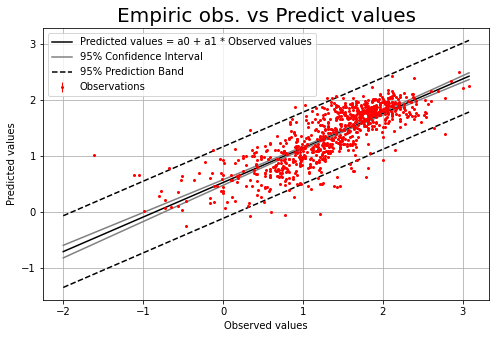

In [22]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-2, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [24]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: BA_sq_m_ha: mean - 0.269, median - 0.272, CI - [0.254-0.285]

SHAP-values for: DBH_cm: mean - 0.085, median - 0.085, CI - [0.065-0.105]

SHAP-values for: H_m: mean - 0.144, median - 0.145, CI - [0.122-0.164]

SHAP-values for: Origin_ID: mean - 0.063, median - 0.063, CI - [0.054-0.072]

SHAP-values for: Species_ID: mean - 0.232, median - 0.232, CI - [0.224-0.243]



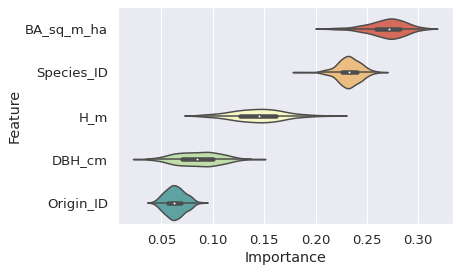

In [25]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['BA_sq_m_ha', 'Species_ID', 'H_m', 'DBH_cm', 'Origin_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [26]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [27]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 58.665, median: 54.0,
 pred. interval (P(0.025)-P(0.975)): 12.975-137.1, 
 conf. interval (p-value=0.95): 26.257-89.941 
***
Aggregate bias statistic: 
 mean: 0.002, median: 0.001,
 pred. interval (P(0.025)-P(0.975)): -0.057-0.069, 
 conf. interval (p-value=0.95): -0.03-0.033 
***
Aggregate RMSE statistic: 
 mean: 0.414, median: 0.412, pred. interval (P(0.025)-P(0.975)): 0.355-0.48, 
 conf. interval (p-value=0.95): 0.386-0.444 
***
Aggregate MSE statistic: 
 mean: 0.173, median: 0.169, pred. interval (P(0.025)-P(0.975)): 0.126-0.23, 
 conf. interval (p-value=0.95): 0.149-0.197 
***
Aggregate R^2 statistic: 
 mean: 0.614, median: 0.619, pred. interval (P(0.025)-P(0.975)): 0.501-0.697, 
 conf. interval (p-value=0.95): 0.572-0.658 
***
Aggregate bias(%) statistic: 
 mean: 0.166, median: 0.001, pred. interval (P(0.025)-P(0.975)): -4.196-5.182, 
 conf. interval (p-value=0.95): -2.148-2.4

# ***Creating final XGBoost model using all obs. for its training***

In [28]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [29]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [30]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:0.86536
[1]	validation_0-rmse:0.73088
[2]	validation_0-rmse:0.62140
[3]	validation_0-rmse:0.54470
[4]	validation_0-rmse:0.49127
[5]	validation_0-rmse:0.45696
[6]	validation_0-rmse:0.42882
[7]	validation_0-rmse:0.41355
[8]	validation_0-rmse:0.39490
[9]	validation_0-rmse:0.38401
[10]	validation_0-rmse:0.37339
[11]	validation_0-rmse:0.36800


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:0.36120
[13]	validation_0-rmse:0.35601
[14]	validation_0-rmse:0.34739
[15]	validation_0-rmse:0.34374
[16]	validation_0-rmse:0.34124
[17]	validation_0-rmse:0.33899
[18]	validation_0-rmse:0.33534
[19]	validation_0-rmse:0.33078
[20]	validation_0-rmse:0.32696
[21]	validation_0-rmse:0.32410
[22]	validation_0-rmse:0.32242
[23]	validation_0-rmse:0.31665
[24]	validation_0-rmse:0.31511
[25]	validation_0-rmse:0.31335
[26]	validation_0-rmse:0.31193
[27]	validation_0-rmse:0.30847
[28]	validation_0-rmse:0.30764
[29]	validation_0-rmse:0.30644
[30]	validation_0-rmse:0.30283
[31]	validation_0-rmse:0.29986
[32]	validation_0-rmse:0.29724
[33]	validation_0-rmse:0.29547
[34]	validation_0-rmse:0.29270
[35]	validation_0-rmse:0.29110
[36]	validation_0-rmse:0.28813
[37]	validation_0-rmse:0.28675
[38]	validation_0-rmse:0.28469
[39]	validation_0-rmse:0.28307
[40]	validation_0-rmse:0.27905
[41]	validation_0-rmse:0.27831
[42]	validation_0-rmse:0.27578
[43]	validation_0-rmse:0.27322
[44]	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [31]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 195


In [32]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

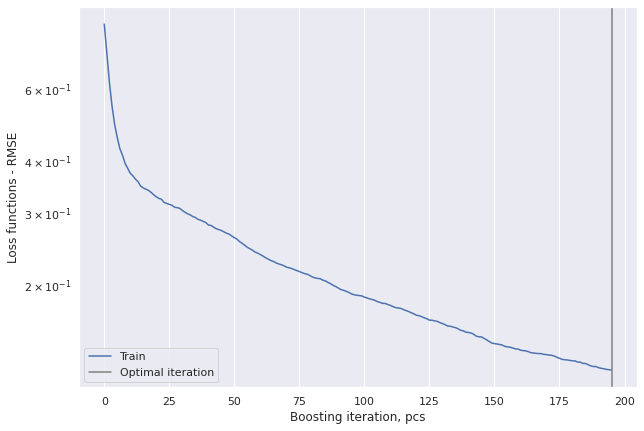

In [33]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [34]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.11
RMSE: 0.1
Relative RMSE(%):  9.030
MSE: 0.0
R square: 96.6%


In [35]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.968
Uncertainty
a0: 0.103+/-0.009
a1: 0.924+/-0.006


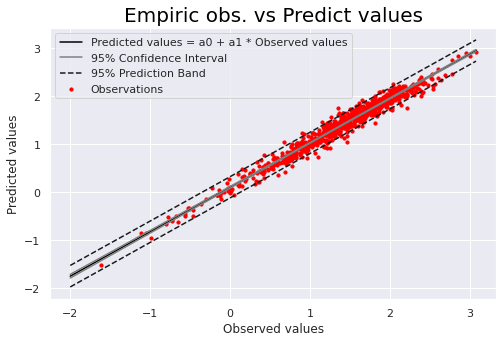

In [36]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-2, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

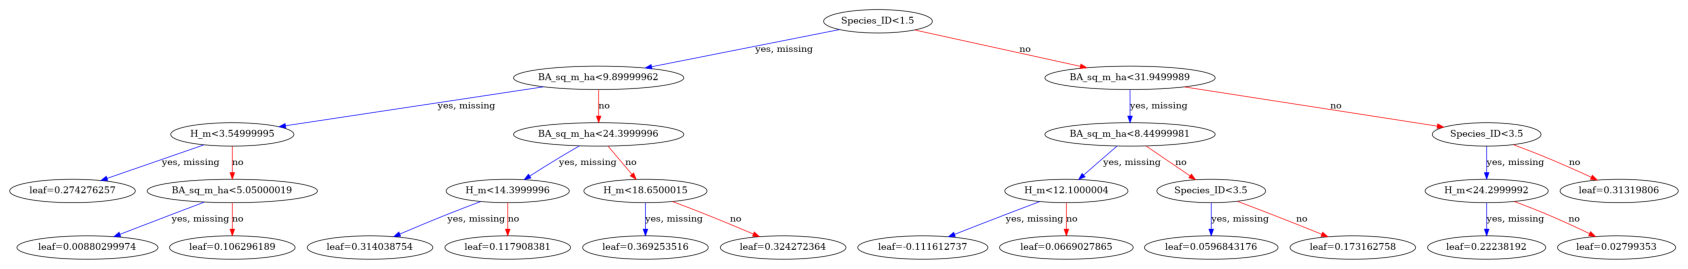

In [43]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

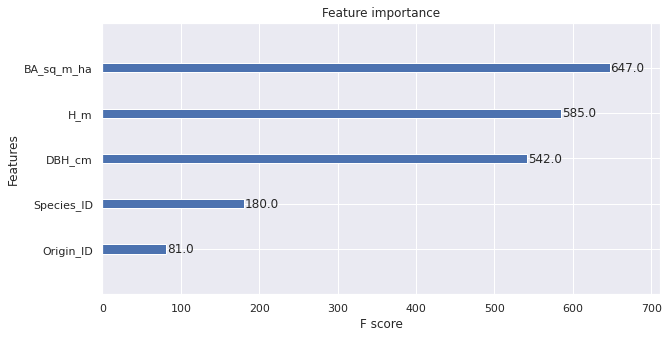

In [49]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

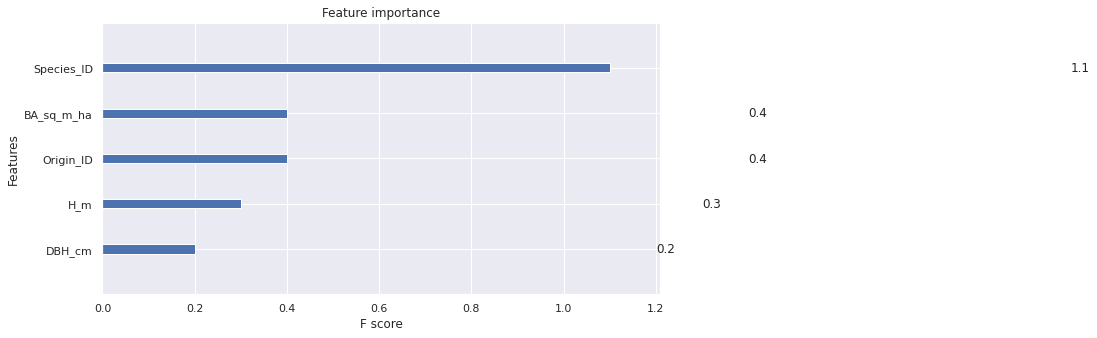

In [50]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

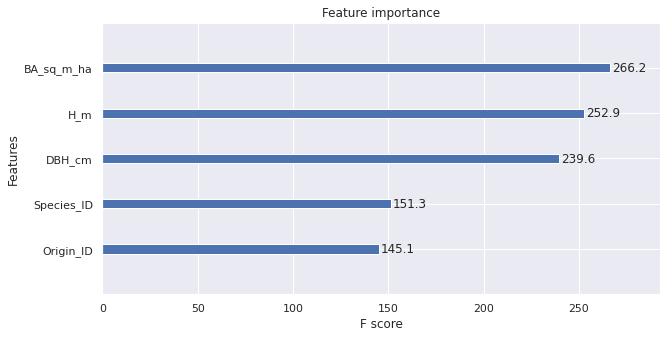

In [51]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [52]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


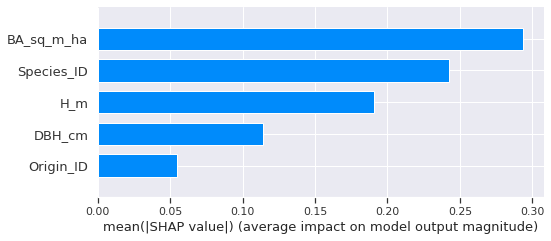

In [54]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

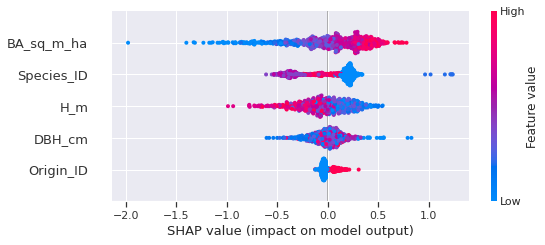

In [55]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

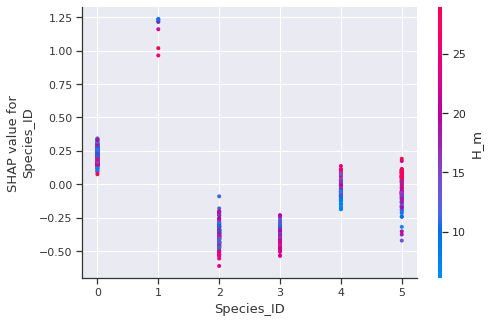

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


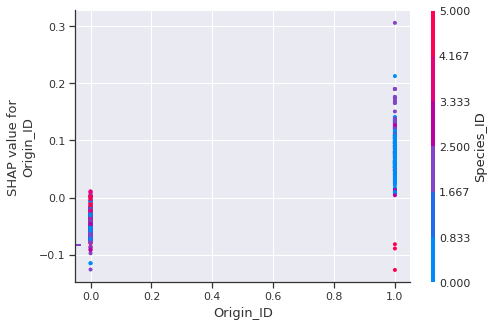

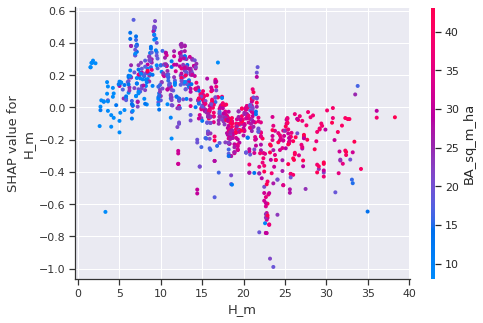

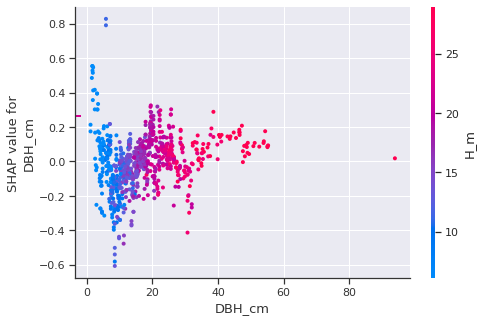

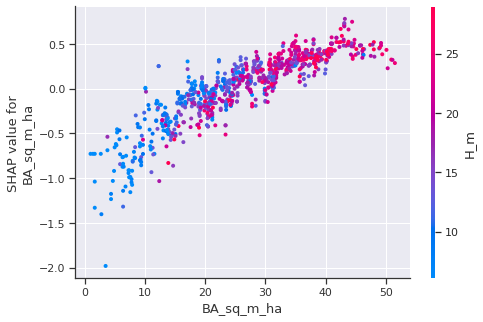

In [56]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [57]:
# Save to JSON
f_xgb_model.save_model("../01_output_data/XGBoost_models/05_LN_M_foliage_other_authors_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../01_output_data/XGBoost_models/05_LN_M_foliage_other_authors_XGB_model.txt")